# <center>Script base - relatório unificado

## Importações

In [3]:
# Importando as bibliotecas utilizadas
import os # trabalhar com arquivos e diretórios
import pandas as pd  # daframes
import numpy as np  # operações com dataframes
import copy  # copiar um dataframe mudando a alocação na memória
import json  # gerar/importar arquivos com informações entre os scripts
from datetime import datetime, timedelta
import copy

import matplotlib.pyplot as plt

In [4]:
# Absolute path para o diretório atual
dir_atual = os.getcwd()
# Absolute path para o diretório irmão onde os arquivos serão lidos
dir_cleaned_data = os.path.abspath(os.path.join(dir_atual, 'dat_clean'))
dir_raw_data = os.path.abspath(os.path.join(dir_atual, 'dat_raw'))
print(dir_atual)
print(dir_cleaned_data)
print(dir_raw_data)

C:\Users\julio\Documents\GitHub\relatorio_unificado
C:\Users\julio\Documents\GitHub\relatorio_unificado\dat_clean
C:\Users\julio\Documents\GitHub\relatorio_unificado\dat_raw


In [5]:
# Teste - deve retornar informações sobre uma das tabelas csv do repositório
for file in os.listdir(dir_cleaned_data):
    print(file)

ad_comuniqueses.csv
ad_despachos.csv
ad_principal.csv
portal_comuniqueses.csv
portal_despachos.csv
sissel_comuniqueses.csv
sissel_despachos.csv
slce_comuniqueses.csv
slce_despachos.csv
slce_principal.csv


## Leitura dos dados

### Aprova Digital

In [8]:
# Tabela de processos
ad_main = pd.read_csv(f'{dir_cleaned_data}/ad_principal.csv', encoding='latin-1', sep=';')
ad_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34397 entries, 0 to 34396
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   n_processo             34397 non-null  object 
 1   data_autuacao          34388 non-null  object 
 2   assunto                34397 non-null  object 
 3   coord_atual            34397 non-null  object 
 4   status                 34397 non-null  object 
 5   unidades_residenciais  0 non-null      float64
 6   data_extracao          34397 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.8+ MB


In [9]:
# Tabela de despachos
ad_despachos = pd.read_csv(f'{dir_cleaned_data}/ad_despachos.csv', encoding='latin-1', sep=';')
ad_despachos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24425 entries, 0 to 24424
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   n_processo      24425 non-null  object
 1   assunto         24425 non-null  object
 2   despacho        24425 non-null  object
 3   data_despacho   24425 non-null  object
 4   coord_despacho  18314 non-null  object
 5   quem_despachou  24425 non-null  object
 6   data_extracao   24425 non-null  object
 7   coord           18314 non-null  object
 8   divisao         18314 non-null  object
dtypes: object(9)
memory usage: 1.7+ MB


In [10]:
# Tabela de comuniqueses
ad_comuniqueses = pd.read_csv(f'{dir_cleaned_data}/ad_comuniqueses.csv', encoding='latin-1', sep=';')
ad_comuniqueses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32161 entries, 0 to 32160
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   n_processo         32161 non-null  object
 1   data_comuniquese   32161 non-null  object
 2   coord_comuniquese  30884 non-null  object
 3   quem_comunicou     32161 non-null  object
 4   coord              29429 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


In [11]:
# Removido - criação de coordenadorias e divisoes para despachos e comuniqueses

In [12]:
dt = datetime.today()
zfiller = lambda x: str(x).zfill(2)

dt_str = f'{zfiller(dt.day)}/{zfiller(dt.month)}/{dt.year} {zfiller(dt.hour)}:{zfiller(dt.minute)}:{zfiller(dt.second)}'
dt_str

'03/06/2024 15:38:39'

In [13]:
# Acertando os meses de CAEPP - inserindo dados falsos para acertar os meses - DESPACHOS
fake_def = pd.DataFrame({'n_processo': None , 'assunto': None, 'despacho': 'Processo Deferido', 'data_despacho': '07/12/2018 20:18:43', 'coor_despacho': None, 
                 'quem_despachou': None, 'data_extracao': None, 'coord': 'CAEPP', 'divisao': 'CAEPP'}, index=[1])
fake_indef = pd.DataFrame({'n_processo': None , 'assunto': None, 'despacho': 'Processo Indeferido', 'data_despacho': '07/12/2018 20:19:43', 'coor_despacho': None, 
                 'quem_despachou': None, 'data_extracao': None, 'coord': 'CAEPP', 'divisao': 'CAEPP'}, index=[2])
fake_indef2 = pd.DataFrame({'n_processo': None , 'assunto': None, 'despacho': 'Processo Indeferido', 'data_despacho': dt_str, 'coor_despacho': None, 
                 'quem_despachou': None, 'data_extracao': None, 'coord': 'CAEPP', 'divisao': 'CAEPP'}, index=[2])

ad_despachos = pd.concat([ad_despachos, fake_def, fake_indef, fake_indef2])

ad_despachos.reset_index(drop=True, inplace=True)
ad_despachos.tail()

,n_processo,assunto,despacho,data_despacho,coord_despacho,quem_despachou,data_extracao,coord,divisao,coor_despacho
24423,1020.2024/0011851-4,Certificado de Conclusão,Processo Deferido,29/05/2024 14:35:43,SMUL/CAEPP,Roseli Ataide,2024.06.03,CAEPP,CAEPP,NaN
24424,1020.2024/0012069-1,Alvará de Autorização de Implantação e/ou Util...,Processo Deferido,03/06/2024 08:28:58,NaN,Desconhecido/Evento Automático,2024.06.03,NaN,NaN,NaN
24425,None,None,Processo Deferido,07/12/2018 20:18:43,NaN,None,None,CAEPP,CAEPP,None
24426,None,None,Processo Indeferido,07/12/2018 20:19:43,NaN,None,None,CAEPP,CAEPP,None
24427,None,None,Processo Indeferido,03/06/2024 15:38:39,NaN,None,None,CAEPP,CAEPP,None


In [14]:
# Acertando os meses de CAEPP - inserindo dados falsos para acertar os meses - COMUNIQUESES
fake_comun = pd.DataFrame({'n_processo': None, 'data_comuniquese': '01/12/2018 15:50:35', 'coor_comuniquese': None, 
                 'quem_comunicou': None, 'coord': 'CAEPP'}, index=[1])

ad_comuniqueses = pd.concat([ad_comuniqueses, fake_comun])

ad_comuniqueses.reset_index(drop=True, inplace=True)
ad_comuniqueses.tail()

,n_processo,data_comuniquese,coord_comuniquese,quem_comunicou,coord,coor_comuniquese
32157,1020.2024/0011637-6,29/05/2024 11:50:23,SMUL/RESID/DRGP,Michel Guerra,RESID,NaN
32158,1020.2024/0011732-1,27/05/2024 10:57:27,SMUL/COMIN,Milena Satie Shikasho,COMIN,NaN
32159,1020.2024/0011735-6,27/05/2024 11:05:58,SMUL/COMIN,Milena Satie Shikasho,COMIN,NaN
32160,1020.2024/0011737-2,27/05/2024 10:50:10,SMUL/COMIN,Milena Satie Shikasho,COMIN,NaN
32161,None,01/12/2018 15:50:35,NaN,None,CAEPP,None


In [15]:
# removido - padronizando despachos

In [16]:
# Processamento extra
# Transformando colunas para datetime
ad_main['data_autuacao'] = pd.to_datetime(ad_main['data_autuacao'], dayfirst=True)
ad_despachos['data_despacho'] = pd.to_datetime(ad_despachos['data_despacho'], dayfirst=True)
ad_comuniqueses['data_comuniquese'] = pd.to_datetime(ad_comuniqueses['data_comuniquese'], dayfirst=True)

ad_main.info()
print()
ad_despachos.info()
print()
ad_comuniqueses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34397 entries, 0 to 34396
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   n_processo             34397 non-null  object        
 1   data_autuacao          34388 non-null  datetime64[ns]
 2   assunto                34397 non-null  object        
 3   coord_atual            34397 non-null  object        
 4   status                 34397 non-null  object        
 5   unidades_residenciais  0 non-null      float64       
 6   data_extracao          34397 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 1.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24428 entries, 0 to 24427
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   n_processo      24425 non-null  object        
 1   assunto         244

### SLCe

In [18]:
# Tabela de processos
slce_main = pd.read_csv(f'{dir_cleaned_data}/slce_principal.csv', encoding='latin-1', sep=';')
slce_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41166 entries, 0 to 41165
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   n_processo     41166 non-null  object
 1   data_autuacao  41166 non-null  object
 2   assunto        41166 non-null  object
 3   coord_atual    41166 non-null  object
 4   status         41166 non-null  object
 5   n_protocolo    41166 non-null  object
 6   data_extracao  41166 non-null  object
dtypes: object(7)
memory usage: 2.2+ MB


In [19]:
# Tabela de despachos
slce_despachos = pd.read_csv(f'{dir_cleaned_data}/slce_despachos.csv', encoding='latin-1', sep=';')
slce_despachos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34625 entries, 0 to 34624
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   n_processo      34625 non-null  object
 1   assunto         34625 non-null  object
 2   deferido        34625 non-null  object
 3   data_despacho   34625 non-null  object
 4   coord_despacho  34625 non-null  object
 5   situacao        34625 non-null  object
 6   n_protocolo     34625 non-null  object
 7   data_extracao   34625 non-null  object
dtypes: object(8)
memory usage: 2.1+ MB


In [20]:
# Tabela de comuniqueses
slce_comuniqueses = pd.read_csv(f'{dir_cleaned_data}/slce_comuniqueses.csv', encoding='latin-1', sep=';')
slce_comuniqueses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31456 entries, 0 to 31455
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   n_processo         31456 non-null  object
 1   data_comuniquese   31456 non-null  object
 2   coord_comuniquese  31456 non-null  object
 3   n_protocolo        31456 non-null  object
 4   data_extracao      31456 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


In [21]:
# Processamento extra
# Transformando colunas para datetime
slce_main['data_autuacao'] = pd.to_datetime(slce_main['data_autuacao'], dayfirst=True)
slce_despachos['data_despacho'] = pd.to_datetime(slce_despachos['data_despacho'], dayfirst=True)
slce_comuniqueses['data_comuniquese'] = pd.to_datetime(slce_comuniqueses['data_comuniquese'], dayfirst=True)

slce_main.info()
print()
slce_despachos.info()
print()
slce_comuniqueses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41166 entries, 0 to 41165
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   n_processo     41166 non-null  object        
 1   data_autuacao  41166 non-null  datetime64[ns]
 2   assunto        41166 non-null  object        
 3   coord_atual    41166 non-null  object        
 4   status         41166 non-null  object        
 5   n_protocolo    41166 non-null  object        
 6   data_extracao  41166 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 2.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34625 entries, 0 to 34624
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   n_processo      34625 non-null  object        
 1   assunto         34625 non-null  object        
 2   deferido        34625 non-null  object        
 3   

In [22]:
# Adcionando coluna de coordenadoria - ADICIONAR NA LIMPEZA DE DADOS
slce_main['coord'] = slce_main['coord_atual'].apply(lambda x: x.split('-')[0])
slce_despachos['coord'] = slce_despachos['coord_despacho'].apply(lambda x: x.split('-')[0])
slce_comuniqueses['coord'] = slce_comuniqueses['coord_comuniquese'].apply(lambda x: x.split('-')[0])

slce_main['coord'].value_counts()

coord
CAEPP                  24407
COMIN                  15176
RESID                    799
PARHIS                   290
SERVIN                   231
Processo Eletrônico      181
GAB                       62
CONTRU                    20
Name: count, dtype: int64

### SISSEL

In [24]:
# Tabela de despachos
sissel_despachos = pd.read_csv(f'{dir_cleaned_data}/sissel_despachos.csv', sep=';')
sissel_despachos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79129 entries, 0 to 79128
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   assunto         79129 non-null  object
 1   situacao        79129 non-null  object
 2   data_despacho   79129 non-null  object
 3   coord_despacho  79129 non-null  object
 4   n_processo      79129 non-null  object
 5   data_extracao   79129 non-null  object
dtypes: object(6)
memory usage: 3.6+ MB


In [25]:
# Tabela comunique-ses
sissel_comuniqueses = pd.read_csv(f'{dir_cleaned_data}/sissel_comuniqueses.csv', sep=';')
sissel_comuniqueses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187686 entries, 0 to 187685
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   data_comuniquese   187686 non-null  object
 1   coord_comuniquese  187686 non-null  object
 2   n_processo         187686 non-null  object
 3   data_extracao      187686 non-null  object
dtypes: object(4)
memory usage: 5.7+ MB


In [26]:
# Processamento extra - ADICIONAR NO ARQUIVO DE LIMPEZA
# Criando colunas para valores de coordenadoria e divisão
sissel_despachos['coord'] = sissel_despachos['coord_despacho'].apply(lambda x: str(x).split('/')[1] if '/' in str(x) else None)
sissel_despachos['divisao'] = sissel_despachos['coord_despacho'].apply(lambda x: str(x).split('/')[-1] if '/' in str(x) else None)
sissel_comuniqueses['coord'] = sissel_comuniqueses['coord_comuniquese'].apply(lambda x: str(x).split('/')[1] if '/' in str(x) else None)
sissel_comuniqueses['divisao'] = sissel_comuniqueses['coord_comuniquese'].apply(lambda x: str(x).split('/')[-1] if '/' in str(x) else None)

In [27]:
dt = datetime.today()
zfiller = lambda x: str(x).zfill(2)

dt_str = f'{dt.year}-{zfiller(dt.month)}-{zfiller(dt.day)}'
dt_str

'2024-06-03'

In [28]:
# Acertando os meses de CAEPP - inserindo dados falsos para acertar os meses - DESPACHOS
fake_def = pd.DataFrame({'assunto': None, 'situacao': 'COM PROPOSTA DE DEFERIMENTO', 'data_despacho': '2000-11-30', 'coord_despacho': None, 'n_processo': None,
                        'data_extracao': None, 'coord': 'CAEPP', 'divisao': 'CAEPP'}, index=[1])
fake_indef = pd.DataFrame({'assunto': None, 'situacao': 'COM PROPOSTA DE INDEFERIMENTO', 'data_despacho': '2000-11-30', 'coord_despacho': None, 'n_processo': None,
                        'data_extracao': None, 'coord': 'CAEPP', 'divisao': 'CAEPP'}, index=[1])
fake_indef2 = pd.DataFrame({'assunto': None, 'situacao': 'COM PROPOSTA DE INDEFERIMENTO', 'data_despacho': dt_str, 'coord_despacho': None, 'n_processo': None,
                        'data_extracao': None, 'coord': 'CAEPP', 'divisao': 'CAEPP'}, index=[1])

sissel_despachos = pd.concat([sissel_despachos, fake_def, fake_indef, fake_indef2])

sissel_despachos.reset_index(drop=True, inplace=True)
sissel_despachos.tail()

,assunto,situacao,data_despacho,coord_despacho,n_processo,data_extracao,coord,divisao
79127,RECONSIDERACAO DE DESPACHO DE ALVARA DE AUTORI...,COM PROPOSTA DE DEFERIMENTO,2024-05-29,SMUL/GAB,2024-0004175-4,2024.06.03,GAB,GAB
79128,Reconsideração do Certificado de Manutenção,DESPACHO CANCELADO,2024-05-29,SMUL/CONTRU,2023-0003547-7,2024.06.03,CONTRU,CONTRU
79129,None,COM PROPOSTA DE DEFERIMENTO,2000-11-30,None,None,None,CAEPP,CAEPP
79130,None,COM PROPOSTA DE INDEFERIMENTO,2000-11-30,None,None,None,CAEPP,CAEPP
79131,None,COM PROPOSTA DE INDEFERIMENTO,2024-06-03,None,None,None,CAEPP,CAEPP


In [29]:
# Acertando os meses de CAEPP - inserindo dados falsos para acertar os meses - Comuniqueses
fake_comun = pd.DataFrame({'data_comuniquese': '04/12/2000 00:00:00', 'coord_comuniquese': None, 'n_processo': 'filler',
                        'data_extracao': None, 'coord': 'CAEPP', 'divisao': 'CAEPP'}, index=[1])
fake_comun2 = pd.DataFrame({'data_comuniquese': '05/02/2024 00:00:00', 'coord_comuniquese': None, 'n_processo': 'filler',
                        'data_extracao': None, 'coord': 'CAEPP', 'divisao': 'CAEPP'}, index=[1])


sissel_comuniqueses = pd.concat([sissel_comuniqueses, fake_comun, fake_comun2])

sissel_comuniqueses.reset_index(drop=True, inplace=True)
sissel_comuniqueses.tail()

,data_comuniquese,coord_comuniquese,n_processo,data_extracao,coord,divisao
187683,03/06/2024 00:00:00,SMUL/CONTRU/DACESS,2019-0002167-3,2024.06.03,CONTRU,DACESS
187684,03/06/2024 00:00:00,SMUL/SERVIN/DSIGP,2023-0010022-8,2024.06.03,SERVIN,DSIGP
187685,03/06/2024 00:00:00,SMUL/CAEPP,2023-0010842-3,2024.06.03,CAEPP,CAEPP
187686,04/12/2000 00:00:00,None,filler,None,CAEPP,CAEPP
187687,05/02/2024 00:00:00,None,filler,None,CAEPP,CAEPP


In [30]:
# Processamento extra - datetime
sissel_despachos['data_despacho'] = pd.to_datetime(sissel_despachos['data_despacho'])
sissel_comuniqueses['data_comuniquese'] = pd.to_datetime(sissel_comuniqueses['data_comuniquese'], dayfirst=True)

sissel_despachos.info()
print()
sissel_comuniqueses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79132 entries, 0 to 79131
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   assunto         79129 non-null  object        
 1   situacao        79132 non-null  object        
 2   data_despacho   79132 non-null  datetime64[ns]
 3   coord_despacho  79129 non-null  object        
 4   n_processo      79129 non-null  object        
 5   data_extracao   79129 non-null  object        
 6   coord           79132 non-null  object        
 7   divisao         79132 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 4.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187688 entries, 0 to 187687
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   data_comuniquese   187688 non-null  datetime64[ns]
 1   coord_comuniquese  187686 non

### Portal do Licenciamento

In [32]:
# Tabela de despachos
portal_despachos = pd.read_csv(f'{dir_cleaned_data}/portal_despachos.csv', sep=';', encoding='latin-1')
portal_despachos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9738 entries, 0 to 9737
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   n_protocolo     9738 non-null   object
 1   n_processo      9738 non-null   object
 2   despacho        9738 non-null   object
 3   data_despacho   9738 non-null   object
 4   coord_despacho  9738 non-null   object
 5   data_extracao   9738 non-null   object
dtypes: object(6)
memory usage: 456.6+ KB


In [33]:
# Tabela de comunique-ses
portal_comuniqueses = pd.read_csv(f'{dir_cleaned_data}/portal_comuniqueses.csv', sep=';', encoding='latin-1')
portal_comuniqueses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17610 entries, 0 to 17609
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   n_protocolo        17610 non-null  object
 1   n_processo         17610 non-null  object
 2   data_comuniquese   17610 non-null  object
 3   coord_comuniquese  17610 non-null  object
 4   data_extracao      17610 non-null  object
dtypes: object(5)
memory usage: 688.0+ KB


In [34]:
# Tabela autuados
for i in os.listdir(dir_raw_data):
    if i.startswith('portal_card-quantidade'):
        aut_file = i

portal_autuados = pd.read_excel(f'{dir_raw_data}/{aut_file}')
portal_autuados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ProcessoAnoAutuacao         107 non-null    int64
 1   ProcessoMesAutuacao         107 non-null    int64
 2   ProcessoQuinzenaAutuacao    107 non-null    int64
 3   CodigoRequerimentoOperacao  107 non-null    int64
dtypes: int64(4)
memory usage: 3.5 KB


In [35]:
# Processamento extra - ADICIONAR NO ARQUIVO DE LIMPEZA
# Ajustando nomes de colunas
portal_autuados.columns = ['ano', 'mes', 'quinzena', 'quantidade']

In [36]:
# Processamento extra - datetime
portal_despachos['data_despacho'] = pd.to_datetime(portal_despachos['data_despacho'], dayfirst=True)
portal_comuniqueses['data_comuniquese'] = pd.to_datetime(portal_comuniqueses['data_comuniquese'], dayfirst=True)

portal_despachos.info()
print()
portal_comuniqueses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9738 entries, 0 to 9737
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   n_protocolo     9738 non-null   object        
 1   n_processo      9738 non-null   object        
 2   despacho        9738 non-null   object        
 3   data_despacho   9738 non-null   datetime64[ns]
 4   coord_despacho  9738 non-null   object        
 5   data_extracao   9738 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 456.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17610 entries, 0 to 17609
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   n_protocolo        17610 non-null  object        
 1   n_processo         17610 non-null  object        
 2   data_comuniquese   17610 non-null  datetime64[ns]
 3   coord_comuniquese  17610 non

## Análise por sistema + data de análise

### Datas e Agrupadores

In [39]:
# Extração de data de referência: A data de referência é sempre o ultimo mês completo. Como os processos são extraídos
# sempre no mês seguinte ao mês de referência, são usados os dados do dia subtraindo 1 mês (30 dias)
# e para o mês anterior volta-se 2 meses (60 dias)

data_atual = datetime.now()
data_input = None #'01-12-2023' # Mês e que o relatório deve ser gerado ou None

if not data_input:
    data_referencia = data_atual - timedelta(days=30)
    data_anterior = data_atual - timedelta(days=60)
else:
    data_referencia = datetime.strptime(data_input, '%d-%m-%Y')
    data_anterior = data_referencia - timedelta(days=30)
    

month_starter = lambda date: f'{date.year}-{date.month}-01'

In [40]:
# Declarando datas de referência 
data_referencia = month_starter(data_referencia)
data_anterior = month_starter(data_anterior)
data_corrente = month_starter(data_atual)

data_referencia, data_anterior, data_corrente

('2024-5-01', '2024-4-01', '2024-6-01')

In [41]:
### Defiindo agrupadores por data
# Agrupador para a coluna 'data_autucao'
grouper_aut = pd.Grouper(key='data_autuacao', freq='MS', label='left')

# Agrupador para a coluna 'data_despacho'
grouper_desp = pd.Grouper(key='data_despacho', freq='MS', label='left')

# Agrupador para a coluna 'data_comuniquese'
grouper_comun = pd.Grouper(key='data_comuniquese', freq='MS', label='left')

### Aprova Digital

In [43]:
def get_ad_despachos(coord=None):
    # Data cointainer
    data_container = {}
    
    # Filtrando despachos para coordenadoria
    if coord:
        coord = ad_despachos.query("(coord == @coord)")
        coord_grouped = coord.groupby(grouper_desp)
    else:
        coord = ad_despachos[:]
        coord_grouped = coord.groupby(grouper_desp)


    try:
        data_container['despachos_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    except KeyError:
        data_container['despachos_mes_referencia'] = 0
        
    try:
        data_container['despachos_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())
    except KeyError:
        data_container['despachos_mes_anterior'] = 0

    # Filtrando deferidos
    deferidos = coord.query("despacho == 'Processo Deferido'")
    deferidos_grouped = deferidos.groupby(grouper_desp)

    try:
        data_container['deferidos_mes_referencia'] = int(deferidos_grouped.get_group(data_referencia)['n_processo'].count())
    except KeyError:
        data_container['deferidos_mes_referencia'] = 0
    
    try:
        data_container['deferidos_mes_anterior'] = int(deferidos_grouped.get_group(data_anterior)['n_processo'].count())
    except KeyError:
        data_container['deferidos_mes_anterior'] = 0

    # Filtrando indeferidos
    indeferidos = coord.query("despacho == 'Processo Indeferido'")
    indeferidos_grouped = indeferidos.groupby(grouper_desp)

    try:
        data_container['indeferidos_mes_referencia'] = int(indeferidos_grouped.get_group(data_referencia)['n_processo'].count())
    except KeyError:
        data_container['indeferidos_mes_referencia'] = 0

    try:
        data_container['indeferidos_mes_anterior'] = int(indeferidos_grouped.get_group(data_anterior)['n_processo'].count())
    except KeyError:
        data_container['indeferidos_mes_anterior'] = 0

    # Filtrando indeferidos e encerrados
    encerrados = coord.query("despacho == 'Processo Indeferido e Encerrado'")
    encerrados_grouped = encerrados.groupby(grouper_desp)

    try:
        data_container['encerrados_mes_referencia'] = int(encerrados_grouped.get_group(data_referencia)['n_processo'].count())
    except:
        data_container['encerrados_mes_referencia'] = 0
        
    try:
        data_container['encerrados_mes_anterior'] = int(encerrados_grouped.get_group(data_anterior)['n_processo'].count())
    except KeyError:
        data_container['encerrados_mes_anterior'] = 0
        
        

    return data_container

get_ad_despachos()

{'despachos_mes_referencia': 1026,
 'despachos_mes_anterior': 956,
 'deferidos_mes_referencia': 734,
 'deferidos_mes_anterior': 676,
 'indeferidos_mes_referencia': 233,
 'indeferidos_mes_anterior': 249,
 'encerrados_mes_referencia': 59,
 'encerrados_mes_anterior': 31}

In [44]:
def get_ad_divisoes(coord=None): # ADICIONAR replace_map no ad_cleaner
    # Data cointainer
    data_container = {}

    # Filtrando despachos para coordenadoria
    if coord:
        coord = ad_despachos.query("(coord == @coord) & ~(quem_despachou == 'Desconhecido/Evento Automático')")
    else:
        coord = ad_despachos[:]

    replace_map = {'DRPM': 'DRVE', 'DRU': 'DRH', 'DHIS': 'DHGP'}
    coord = coord.replace(to_replace=replace_map)
    coord_grouped = coord.groupby(grouper_desp)
    
    mes_referencia = coord_grouped.get_group(data_referencia)
    
    return mes_referencia['divisao'].value_counts()
    
get_ad_divisoes()

divisao
CAEPP     330
DHGP      114
DRGP       70
DHMP       63
DHPP       59
DACESS     33
CONTRU     29
DINS       25
DCIGP      23
DRVE       20
DSUS       18
PARHIS     16
DRH        14
DCIMP      13
DSIGP      13
DPS        12
RESID      10
COMIN       8
DLR         6
CTLU        3
SERVIN      1
Name: count, dtype: int64

In [45]:
def get_ad_divisao_list(coord=None):
    # Recebe um objeto Series contendo algumas divisões e retorna o nome de cada uma
    
    series = get_ad_divisoes(coord)
    div_list = [i.split('/')[-1] for i in series.index]

    return div_list

get_ad_divisao_list()

['CAEPP',
 'DHGP',
 'DRGP',
 'DHMP',
 'DHPP',
 'DACESS',
 'CONTRU',
 'DINS',
 'DCIGP',
 'DRVE',
 'DSUS',
 'PARHIS',
 'DRH',
 'DCIMP',
 'DSIGP',
 'DPS',
 'RESID',
 'COMIN',
 'DLR',
 'CTLU',
 'SERVIN']

In [46]:
def get_ad_comuniqueses(coord=None):
    # Data cointainer
    data_container = {}

    # Filtrando comunique-ses para coordenadoria
    if coord:
        coord = ad_comuniqueses.query("coord == @coord")
        coord_grouped = coord.groupby(grouper_comun)
    else:
        coord = ad_comuniqueses[:]
        coord_grouped = coord.groupby(grouper_comun)

    
    try:
        data_container['comuniq_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    except KeyError:
        data_container['comuniq_mes_referencia'] = 0
        
    try:
        data_container['comuniq_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())
    except KeyError:
        data_container['comuniq_mes_anterior'] = 0
    

    return data_container

get_ad_comuniqueses()

{'comuniq_mes_referencia': 1092, 'comuniq_mes_anterior': 1233}

In [47]:
def get_ad_autuados(coord=None):
    # Data cointainer
    data_container = {}

    # Filtrando comunique-ses para coordenadoria
    if coord:
        coord = ad_main.query("(data_autuacao >= @data_anterior) & (data_autuacao < @data_corrente) & (coord_atual == @coord)")
        coord_grouped = coord.groupby(grouper_aut)
    else:
        coord = ad_main[:]
        coord_grouped = coord.groupby(grouper_aut)
    
    data_container['aut_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['aut_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())

    return data_container

get_ad_autuados()

{'aut_mes_referencia': 963, 'aut_mes_anterior': 1066}

In [48]:
def get_ad_last_12_despachos(coord=None):
    # Data cointainer
    data_container = {}

    # Filtrando despachos para coordenadoria
    if coord:
        coord = ad_despachos.query("(coord == @coord) & ~(quem_despachou == 'Desconhecido/Evento Automático')")
        coord_grouped = coord.groupby(grouper_desp)
    else:
        coord = ad_despachos[:]
        coord_grouped = coord.groupby(grouper_desp)

    
    # Ultimos 12 meses de despachos
    data_container['despachos'] = coord_grouped['despacho'].count().loc[:data_referencia][-12:]

    # Fiitrando e extraindo deferidos
    deferidos = coord.query("despacho == 'Processo Deferido'").groupby(grouper_desp)
    data_container['deferidos'] = deferidos['despacho'].count().loc[:data_referencia][-12:]

    # Fiitrando e extraindo indeferidos
    indeferidos = coord.query("(despacho == 'Processo Indeferido') or (despacho == 'Processo Indeferido e Encerrado')").groupby(grouper_desp)
    data_container['indeferidos'] = indeferidos['despacho'].count().loc[:data_referencia][-12:]


    return data_container

get_ad_last_12_despachos()

{'despachos': data_despacho
 2023-06-01     909
 2023-07-01     908
 2023-08-01     732
 2023-09-01     747
 2023-10-01     773
 2023-11-01     661
 2023-12-01     751
 2024-01-01     694
 2024-02-01     759
 2024-03-01     836
 2024-04-01     956
 2024-05-01    1026
 Freq: MS, Name: despacho, dtype: int64,
 'deferidos': data_despacho
 2023-06-01    614
 2023-07-01    619
 2023-08-01    473
 2023-09-01    526
 2023-10-01    542
 2023-11-01    489
 2023-12-01    565
 2024-01-01    436
 2024-02-01    532
 2024-03-01    598
 2024-04-01    676
 2024-05-01    734
 Freq: MS, Name: despacho, dtype: int64,
 'indeferidos': data_despacho
 2023-06-01    295
 2023-07-01    289
 2023-08-01    259
 2023-09-01    221
 2023-10-01    231
 2023-11-01    172
 2023-12-01    186
 2024-01-01    258
 2024-02-01    227
 2024-03-01    238
 2024-04-01    280
 2024-05-01    292
 Freq: MS, Name: despacho, dtype: int64}

In [49]:
def get_ad_last_12_comuniq(coord=None):

    # Filtrando despachos para coordenadoria
    if coord:
        coord = ad_comuniqueses.query("(coord == @coord)")
        coord_grouped = coord.groupby(grouper_comun)
    else:
        coord = ad_comuniqueses[:]
        coord_grouped = coord.groupby(grouper_comun)
    
    # Ultimos 12 meses de despachos
    comuniq_12 = coord_grouped['n_processo'].count().loc[:data_referencia][-12:]
   
    return comuniq_12

get_ad_last_12_comuniq()

data_comuniquese
2023-06-01    1312
2023-07-01    1268
2023-08-01    1134
2023-09-01     956
2023-10-01     998
2023-11-01     864
2023-12-01     698
2024-01-01     886
2024-02-01     921
2024-03-01    1047
2024-04-01    1233
2024-05-01    1092
Freq: MS, Name: n_processo, dtype: int64

In [50]:
def get_ad_last_12_autuados(coord=None):

    # Filtrando despachos para coordenadoria
    if coord:
        coord = ad_main.query("(coord_atual == @coord)")
        coord_grouped = coord.groupby(grouper_aut)
    else:
        coord= ad_main[:]
        coord_grouped = coord.groupby(grouper_aut)
    
    # Ultimos 12 meses de despachos
    aut_12 = coord_grouped['n_processo'].count().loc[:data_referencia][-12:]
   
    return aut_12

get_ad_last_12_autuados()

data_autuacao
2023-06-01    1067
2023-07-01     842
2023-08-01     966
2023-09-01     815
2023-10-01     828
2023-11-01     808
2023-12-01    1193
2024-01-01     701
2024-02-01     739
2024-03-01     827
2024-04-01    1066
2024-05-01     963
Name: n_processo, dtype: int64

In [51]:
def get_ad_assuntos(coord=None):

    # Filtrando despachos deferidos para coordenadoria
    if coord:
        coord_desp = ad_despachos.query("(coord == @coord) & (despacho == 'Processo Deferido')")
    else:
        coord_desp = ad_despachos.query("(despacho == 'Processo Deferido')")
    
    # Filtro para o período
    coord_desp_mes = coord_desp.query("(data_despacho >= @data_referencia) & (data_despacho < @data_corrente)")
    
    # Fazendo um left merge com a planilha principal para adcionar a coluna assunto à tabela de despachos
    assuntos = coord_desp_mes.merge(ad_main[['n_processo', 'assunto']].drop_duplicates(subset=['n_processo']), on='n_processo', how='left')
    assuntos['assunto'] = assuntos['assunto_x'].apply(lambda x: x[:65])
    #return assuntos.head()
    return assuntos['assunto'].value_counts()


get_ad_assuntos()

assunto
Certificado de Conclusão                                             136
Alvará de Aprovação e Execução de Edificação Nova (Exceto HIS/ HM     97
Alvará de implantação de Estação Rádio-Base                           89
Apostilamento                                                         74
Alvará para Desmembramento/ Remembramento/ Reparcelamento             46
Alvará de Aprovação e Execução de Edificação Nova (HIS/ HMP)          44
Alvará de Aprovação e Execução de Reforma (Exceto HIS e HMP)          37
Alvará de Autorização de Implantação e/ou Utilização de Estande d     34
Alvará de Execução de Edificação Nova (Exceto HIS/ HMP)               27
Alvará de Autorização de Avanço do Tapume Sobre Parte do Passeio      26
Alvará de Execução de Edificação Nova (HIS/ HMP)                      20
Projeto Modificativo de Alvará de Aprovação e Execução de Edifica     16
Alvará de Aprovação de Edificação Nova (HIS/ HMP)                     16
Certificado de Segurança                   

In [52]:
def get_ad_acumulado(coord=None):

    data_container = {}

    # Filtrando despachos para coordenadoria
    if coord:
        coord_desp = ad_despachos.query("(coord == @coord) & ~(quem_despachou == 'Desconhecido/Evento Automático') & (data_despacho < @data_corrente)")
    else:
        coord_desp = ad_despachos.query("~(quem_despachou == 'Desconhecido/Evento Automático') & (data_despacho < @data_corrente)")

    
    # Despachos
    data_container['Despachos'] = coord_desp.shape[0]
    data_container['Deferidos'] = coord_desp.query("(despacho == 'Processo Deferido')").shape[0]
    data_container['Indeferidos'] = coord_desp.query("(despacho == 'Processo Indeferido')").shape[0]
    data_container['Indef e Encerrados'] = coord_desp.query("(despacho == 'Processo Indeferido e Encerrado')").shape[0]

    # Divisões
    #for i in get_ad_divisao_list(coord):
        #data_container[i] = coord_desp.query('divisao == @i').shape[0]

    # Comunique-ses
    if coord:
        data_container['Comunique-ses'] = ad_comuniqueses.query("(coord == @coord) & (data_comuniquese < @data_corrente)").shape[0]
    else:
        data_container['Comunique-ses'] = ad_comuniqueses.query("(data_comuniquese < @data_corrente)").shape[0]

    # Autuados
    if coord:
        data_container['Autuados'] = ad_main.query("(coord_atual == @coord) & (data_autuacao < @data_corrente)").shape[0]
    else:
        data_container['Autuados'] = ad_main.query("(data_autuacao < @data_corrente)").shape[0]
        
    # Estoque
    if coord:
        coord_main = ad_main.query("(coord_atual == @coord) & ((status == 'em análise') | (status == 'indeferido') | (status == 'desconhecido'))")
    else:
        coord_main = ad_main.query("((status == 'em análise') | (status == 'indeferido') | (status == 'desconhecido'))")
    data_container['Estoque'] = coord_main.shape[0]

    return data_container


get_ad_acumulado('RESID')

{'Despachos': 4962,
 'Deferidos': 3832,
 'Indeferidos': 1037,
 'Indef e Encerrados': 93,
 'Comunique-ses': 7534,
 'Autuados': 5155,
 'Estoque': 1189}

In [53]:
"""def get_ad_unidades(coordenadoria=None):
    
    if coordenadoria:
        coord = ad_despachos.query("(coord == @coordenadoria) & (despacho == 'Processo Deferido') ")
        coord = coord.drop_duplicates(subset='n_processo')
        coord_grouped = coord.groupby(grouper_desp)
    else:
        coord = ad_despachos.query("(desapcho == 'Processo Deferido')")
        coord = coord.drop_duplicates(subset='n_processo')
        coord_grouped = coord.groupby(grouper_desp)

    
    return int(coord_grouped.get_group(data_referencia)['unidades_residenciais'].sum())

get_ad_unidades('RESID')"""

'def get_ad_unidades(coordenadoria=None):\n    \n    if coordenadoria:\n        coord = ad_despachos.query("(coord == @coordenadoria) & (despacho == \'Processo Deferido\') ")\n        coord = coord.drop_duplicates(subset=\'n_processo\')\n        coord_grouped = coord.groupby(grouper_desp)\n    else:\n        coord = ad_despachos.query("(desapcho == \'Processo Deferido\')")\n        coord = coord.drop_duplicates(subset=\'n_processo\')\n        coord_grouped = coord.groupby(grouper_desp)\n\n    \n    return int(coord_grouped.get_group(data_referencia)[\'unidades_residenciais\'].sum())\n\nget_ad_unidades(\'RESID\')'

### SLCe

In [55]:
def get_slce_despachos(coord=None):
    # Data cointainer
    data_container = {}

    # Filtrando despachos para coordenadoria
    if coord:
        coord = slce_despachos.query("(coord == @coord)")
        coord_grouped = coord.groupby(grouper_desp)
    else:
        coord = slce_despachos[:]
        coord_grouped = coord.groupby(grouper_desp)
    
    data_container['despachos_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['despachos_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())

    # Filtrando deferidos
    deferidos = coord.query("deferido == 'Sim'")  # coord foi trocado pelo tabela original - slce_despachos
    deferidos_grouped = deferidos.groupby(grouper_desp)

    data_container['deferidos_mes_referencia'] = int(deferidos_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['deferidos_mes_anterior'] = int(deferidos_grouped.get_group(data_anterior)['n_processo'].count())


    # Filtrando indeferidos
    indeferidos = coord.query("deferido == 'Não'")  # coord foi trocado pelo tabela original - slce_despachos
    indeferidos_grouped = indeferidos.groupby(grouper_desp)

    data_container['indeferidos_mes_referencia'] = int(indeferidos_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['indeferidos_mes_anterior'] = int(indeferidos_grouped.get_group(data_anterior)['n_processo'].count())


    # Filtrando indeferidos e encerrados
    encerrados = coord.query("(deferido == 'Não') & (situacao == 'Indeferido - Encerrado')")  # coord foi trocado pelo tabela original - slce_despachos
    encerrados_grouped = encerrados.groupby(grouper_desp)

    try:
        data_container['encerrados_mes_referencia'] = int(encerrados_grouped.get_group(data_referencia)['n_processo'].count())
        data_container['encerrados_mes_anterior'] = int(encerrados_grouped.get_group(data_anterior)['n_processo'].count())
    
    except KeyError:
        data_container['encerrados_mes_referencia'] = 0
        data_container['encerrados_mes_anterior'] = 0


    return data_container

get_slce_despachos()

{'despachos_mes_referencia': 750,
 'despachos_mes_anterior': 985,
 'deferidos_mes_referencia': 616,
 'deferidos_mes_anterior': 816,
 'indeferidos_mes_referencia': 134,
 'indeferidos_mes_anterior': 169,
 'encerrados_mes_referencia': 0,
 'encerrados_mes_anterior': 0}

In [56]:
def get_slce_comuniqueses(coord=None):
    # Data cointainer
    data_container = {}

    # Filtrando comunique-ses para coordenadoria
    if coord:
        coord = slce_comuniqueses.query("(coord == @coord)")
        coord_grouped = coord.groupby(grouper_comun)
    else:
        coord = slce_comuniqueses[:]
        coord_grouped = coord.groupby(grouper_comun)
    
    data_container['comuniq_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['comuniq_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())


    return data_container

get_slce_comuniqueses()

{'comuniq_mes_referencia': 386, 'comuniq_mes_anterior': 403}

In [57]:
def get_slce_autuados(coord=None):
    # Data cointainer
    data_container = {}

    # Filtrando comunique-ses para coordenadoria
    if coord:
        coord = slce_main.query("(data_autuacao >= @data_anterior) & (data_autuacao < @data_corrente) & (coord_atual == @coord)")
        coord_grouped = coord.groupby(grouper_aut)
    else:
        coord = slce_main.query("(data_autuacao >= @data_anterior) & (data_autuacao < @data_corrente)")
        coord_grouped = coord.groupby(grouper_aut)
    
    data_container['aut_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['aut_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())


    return data_container

get_slce_autuados()

{'aut_mes_referencia': 632, 'aut_mes_anterior': 673}

In [58]:
def get_slce_last_12_despachos(coord=None):
    # Data cointainer
    data_container = {}

    # Filtrando despachos para coordenadoria
    if coord:
        coord = slce_despachos.query("(coord == @coord)")
        coord_grouped = coord.groupby(grouper_desp)
    else:
        coord = slce_despachos[:]
        coord_grouped = coord.groupby(grouper_desp)
    
    # Ultimos 12 meses de despachos
    data_container['despachos'] = coord_grouped['deferido'].count().loc[:data_referencia][-12:]

    # Fiitrando e extraindo deferidos
    deferidos = coord.query("deferido == 'Sim'").groupby(grouper_desp)
    data_container['deferidos'] = deferidos['deferido'].count().loc[:data_referencia][-12:]

    # Fiitrando e extraindo indeferidos
    indeferidos = coord.query("deferido == 'Não'").groupby(grouper_desp)
    data_container['indeferidos'] = indeferidos['deferido'].count().loc[:data_referencia][-12:]


    return data_container

get_slce_last_12_despachos()

{'despachos': data_despacho
 2023-06-01    615
 2023-07-01    668
 2023-08-01    463
 2023-09-01    412
 2023-10-01    457
 2023-11-01    449
 2023-12-01    414
 2024-01-01    364
 2024-02-01    506
 2024-03-01    765
 2024-04-01    985
 2024-05-01    750
 Freq: MS, Name: deferido, dtype: int64,
 'deferidos': data_despacho
 2023-06-01    442
 2023-07-01    512
 2023-08-01    334
 2023-09-01    363
 2023-10-01    419
 2023-11-01    423
 2023-12-01    348
 2024-01-01    300
 2024-02-01    414
 2024-03-01    583
 2024-04-01    816
 2024-05-01    616
 Freq: MS, Name: deferido, dtype: int64,
 'indeferidos': data_despacho
 2023-06-01    173
 2023-07-01    156
 2023-08-01    129
 2023-09-01     49
 2023-10-01     38
 2023-11-01     26
 2023-12-01     66
 2024-01-01     64
 2024-02-01     92
 2024-03-01    182
 2024-04-01    169
 2024-05-01    134
 Freq: MS, Name: deferido, dtype: int64}

In [59]:
def get_slce_last_12_comuniq(coord=None):

    # Filtrando despachos para coordenadoria
    if coord:
        coord = slce_comuniqueses.query("(coord == @coord)")
        coord_grouped = coord.groupby(grouper_comun)
    else:
        coord = slce_comuniqueses[:]
        coord_grouped = coord.groupby(grouper_comun)
    
    # Ultimos 12 meses de despachos
    comuniq_12 = coord_grouped['n_processo'].count().loc[:data_referencia][-12:]

    return comuniq_12

get_slce_last_12_comuniq()

data_comuniquese
2023-06-01    418
2023-07-01    353
2023-08-01    163
2023-09-01    112
2023-10-01    222
2023-11-01    281
2023-12-01    222
2024-01-01    368
2024-02-01    374
2024-03-01    397
2024-04-01    403
2024-05-01    386
Freq: MS, Name: n_processo, dtype: int64

In [60]:
def get_slce_last_12_autuados(coord=None):

    # Filtrando despachos para coordenadoria
    if coord:
        coord = slce_main.query("(coord == @coord)")
        coord_grouped = coord.groupby(grouper_aut)
    else:
        coord = slce_main[:]
        coord_grouped = coord.groupby(grouper_aut)
    
    # Ultimos 12 meses de despachos
    aut_12 = coord_grouped['n_processo'].count().loc[:data_referencia][-12:]
   
    return aut_12

get_slce_last_12_autuados()

data_autuacao
2023-06-01    650
2023-07-01    604
2023-08-01    626
2023-09-01    557
2023-10-01    567
2023-11-01    587
2023-12-01    474
2024-01-01    420
2024-02-01    520
2024-03-01    596
2024-04-01    673
2024-05-01    632
Freq: MS, Name: n_processo, dtype: int64

In [61]:
def get_slce_assuntos(coord=None):

    # Filtrando despachos deferidos para coordenadoria
    if coord:
        coord_desp = slce_despachos.query("(coord == @coord) & (deferido == 'Sim')")
    else:
        coord_desp = slce_despachos.query("(deferido == 'Sim')")
    # Filtro para o período
    coord_desp_mes = coord_desp.query("(data_despacho >= @data_referencia) & (data_despacho < @data_corrente)")

    # Fazendo um left merge com a planilha principal para adcionar a coluna assunto à tabela de despachos
    assuntos = coord_desp_mes.merge(slce_main[['n_processo', 'assunto']].drop_duplicates(subset=['n_processo']), on='n_processo', how='left')
    assuntos['assunto'] = assuntos['assunto_x'].apply(lambda x: x[:50])
    return assuntos['assunto'].value_counts()


get_slce_assuntos()

assunto
Alvará de Execução de Demolição                       219
Alvará de Autorização para avanço de Tapume sobre     156
Alvará de Aprovação e Execução para Residência Uni    105
Alvará de Autorização de Implantação e/ou Utilizaç     38
Certificado de Conclusão                               38
Certificado de Conclusão de Demolição                  36
Alvará de Aprovação de Edificação Nova                  7
Alvará de Execução de Edificação Nova                   7
Alvará de Desmembramento de Lote                        6
Alvará de Aprovação de Reforma                          2
Alvará de Reparcelamento de Lote                        1
Alvará de Execução de Reforma                           1
Name: count, dtype: int64

In [62]:
# Para valores históricos, devemos misturar GTEL com CAEPP? POr equanto será usado apenas GTEL
def get_slce_acumulado(coord=None):

    data_container = {}

    # Filtrando despachos para coordenadoria
    if coord: 
        coord_desp = slce_despachos.query("(coord == @coord) & (data_despacho < @data_corrente)")
    else:
        coord_desp = slce_despachos.query("(data_despacho < @data_corrente)")
    
    # Despachos
    data_container['Despachos'] = coord_desp.shape[0]
    data_container['Deferidos'] = coord_desp.query("(deferido == 'Sim')").shape[0]
    data_container['Indeferidos'] = coord_desp.query("(deferido == 'Não')").shape[0]
    data_container['Indef. Encerrados'] = coord_desp.query("(deferido == 'Não') & (situacao == 'Indeferido - Encerrado')").shape[0]

    # Divisões
    for i in coord_desp['coord'].value_counts().index:
        data_container[i] = coord_desp.query('coord == @i').shape[0]

    # Comunique-ses
    if coord:
        data_container['Comunique-ses'] = slce_comuniqueses.query("(coord == @coord) & (data_comuniquese < @data_corrente)").shape[0]
    else:
        data_container['Comunique-ses'] = slce_comuniqueses.query("(data_comuniquese < @data_corrente)").shape[0]

    # Autuados
    if coord:
        data_container['Autuados'] = slce_main.query("(coord == @coord) & (data_autuacao < @data_corrente)").shape[0]
    else:
        data_container['Autuados'] = slce_main.query("(data_autuacao < @data_corrente)").shape[0]

    
    # Estoque
    status_ativos = ['Processo Físico', 'Indeferido', 'Em Análise', 'Processando Despacho', 'Solicitação Enviada', 'Em Comunique-se', 'Processando Comunique-se', 'Aguardando Pagamento', 'Aguardando Aceite']
    if coord:
        coord_main = slce_main.query("(coord == @coord) & (status.isin(@status_ativos))")
    else:
        coord_main = slce_main.query("(status.isin(@status_ativos))")

    data_container['Estoque'] = coord_main.shape[0]
    
    if coord:
        del data_container[coord]
    else:
        del data_container['CAEPP']
        del data_container['COMIN']
        del data_container['RESID']
        del data_container['Processo Eletrônico']
        del data_container['PARHIS']
        del data_container['SERVIN']
        del data_container['GAB']
        del data_container['CONTRU']

    return data_container


get_slce_acumulado()

{'Despachos': 34625,
 'Deferidos': 21025,
 'Indeferidos': 13600,
 'Indef. Encerrados': 4701,
 'Comunique-ses': 31441,
 'Autuados': 41166,
 'Estoque': 15485}

### SISSEL

In [64]:
def get_sissel_despachos(coord=None):
    # Data cointainer
    data_container = {}
    
    # Filtrando despachos para coordenadoria
    if coord:
        coord = sissel_despachos.query("(coord == @coord) and ((situacao == 'COM PROPOSTA DE DEFERIMENTO') or (situacao == 'COM PROPOSTA DE INDEFERIMENTO'))")
        coord_grouped = coord.groupby(grouper_desp)
    else:
        coord = sissel_despachos.query("((situacao == 'COM PROPOSTA DE DEFERIMENTO') or (situacao == 'COM PROPOSTA DE INDEFERIMENTO'))")
        coord_grouped = coord.groupby(grouper_desp)


    try:
        data_container['despachos_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    except KeyError:
        data_container['despachos_mes_referencia'] = 0
    try:
        data_container['despachos_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())
    except KeyError:
        data_container['despachos_mes_anterior'] = 0

    # Filtrando deferidos
    deferidos = coord.query("situacao == 'COM PROPOSTA DE DEFERIMENTO'")
    deferidos_grouped = deferidos.groupby(grouper_desp)

    try:
        data_container['deferidos_mes_referencia'] = int(deferidos_grouped.get_group(data_referencia)['n_processo'].count())
    except KeyError:
        data_container['deferidos_mes_referencia'] = 0
    try:
        data_container['deferidos_mes_anterior'] = int(deferidos_grouped.get_group(data_anterior)['n_processo'].count())
    except KeyError:
        data_container['deferidos_mes_anterior'] = 0

    # Filtrando indeferidos
    indeferidos = coord.query("situacao == 'COM PROPOSTA DE INDEFERIMENTO'")
    indeferidos_grouped = indeferidos.groupby(grouper_desp)

    try:
        data_container['indeferidos_mes_referencia'] = int(indeferidos_grouped.get_group(data_referencia)['n_processo'].count())
    except KeyError:
        data_container['indeferidos_mes_referencia'] = 0
    try:
        data_container['indeferidos_mes_anterior'] = int(indeferidos_grouped.get_group(data_anterior)['n_processo'].count())
    except KeyError:
        data_container['indeferidos_mes_anterior'] = 0

    return data_container

get_sissel_despachos()

{'despachos_mes_referencia': 391,
 'despachos_mes_anterior': 334,
 'deferidos_mes_referencia': 241,
 'deferidos_mes_anterior': 195,
 'indeferidos_mes_referencia': 150,
 'indeferidos_mes_anterior': 139}

In [65]:
def get_sissel_divisoes(coord=None):
    # Data cointainer
    data_container = {}

    # Filtrando despachos para coordenadoria
    if coord:
        coord = sissel_despachos.query("(coord == @coord)")
        coord_grouped = coord.groupby(grouper_desp)
    else:
        coord = sissel_despachos[:]
        coord_grouped = coord.groupby(grouper_desp)

    mes_referencia = coord_grouped.get_group(data_referencia)
    
    return mes_referencia['divisao'].value_counts()
    
get_sissel_divisoes()

divisao
DLR       119
DSUS       90
CONTRU     36
DINS       17
COMIN      14
DACESS     13
CAEPP      11
DRVE       11
DRGP        9
DHGP        9
DHMP        9
DHPP        8
GTEC        7
DCIGP       7
DPS         6
PARHIS      6
DSIMP       5
SERVIN      5
DSIGP       4
RESID       3
DCIMP       2
GAB         1
Name: count, dtype: int64

In [66]:
def get_sissel_divisao_list(coord=None):
    # Recebe um objeto Series contendo algumas divisões e retorna o nome de cada uma
    
    series = get_sissel_divisoes(coord)
    div_list = [i.split('/')[-1] for i in series.index]

    return div_list

print(get_sissel_divisao_list())

['DLR', 'DSUS', 'CONTRU', 'DINS', 'COMIN', 'DACESS', 'CAEPP', 'DRVE', 'DRGP', 'DHGP', 'DHMP', 'DHPP', 'GTEC', 'DCIGP', 'DPS', 'PARHIS', 'DSIMP', 'SERVIN', 'DSIGP', 'RESID', 'DCIMP', 'GAB']


In [67]:
def get_sissel_comuniqueses(coord=None):
    # Data cointainer
    data_container = {}

    # Filtrando comunique-ses para coordenadoria
    if coord:
        coord = sissel_comuniqueses.query("coord == @coord")
        coord_grouped = coord.groupby(grouper_comun)
    else:
        coord = sissel_comuniqueses[:]
        coord_grouped = coord.groupby(grouper_comun)
    
    try:
        data_container['comuniq_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    except KeyError:
        data_container['comuniq_mes_referencia'] = 0
    try:
        data_container['comuniq_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())
    except KeyError:
        data_container['comuniq_mes_anterior'] = 0

    return data_container

get_sissel_comuniqueses()

{'comuniq_mes_referencia': 422, 'comuniq_mes_anterior': 419}

In [68]:
# Dados incompletos impedem a implementação
"""
def get_ad_autuados(coord):
    # Data cointainer
    data_container = {}

    # Filtrando comunique-ses para coordenadoria
    coord = ad_main.query("(data_autuacao >= @data_anterior) & (data_autuacao < @data_corrente) & (coord_autuacao == @coord)")
    coord_grouped = coord.groupby(grouper_aut)
    
    data_container['aut_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['aut_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())

    return data_container

get_ad_autuados('CAEPP')
"""


'\ndef get_ad_autuados(coord):\n    # Data cointainer\n    data_container = {}\n\n    # Filtrando comunique-ses para coordenadoria\n    coord = ad_main.query("(data_autuacao >= @data_anterior) & (data_autuacao < @data_corrente) & (coord_autuacao == @coord)")\n    coord_grouped = coord.groupby(grouper_aut)\n    \n    data_container[\'aut_mes_referencia\'] = int(coord_grouped.get_group(data_referencia)[\'n_processo\'].count())\n    data_container[\'aut_mes_anterior\'] = int(coord_grouped.get_group(data_anterior)[\'n_processo\'].count())\n\n    return data_container\n\nget_ad_autuados(\'CAEPP\')\n'

In [69]:
def get_sissel_last_12_despachos(coord=None):
    # Data cointainer
    data_container = {}

    # Filtrando despachos para coordenadoria
    if coord:
        coord = sissel_despachos.query("(coord == @coord) and ((situacao == 'COM PROPOSTA DE DEFERIMENTO') or (situacao == 'COM PROPOSTA DE INDEFERIMENTO'))")
        coord_grouped = coord.groupby(grouper_desp)
    else:
        coord = sissel_despachos.query("((situacao == 'COM PROPOSTA DE DEFERIMENTO') or (situacao == 'COM PROPOSTA DE INDEFERIMENTO'))")
        coord_grouped = coord.groupby(grouper_desp)
    
    # Ultimos 12 meses de despachos
    data_container['despachos'] = coord_grouped['situacao'].count().loc[:data_referencia][-12:]

    # Fiitrando e extraindo deferidos
    deferidos = coord.query("situacao == 'COM PROPOSTA DE DEFERIMENTO'").groupby(grouper_desp)
    data_container['deferidos'] = deferidos['situacao'].count().loc[:data_referencia][-12:]

    # Fiitrando e extraindo indeferidos
    indeferidos = coord.query("situacao == 'COM PROPOSTA DE INDEFERIMENTO'").groupby(grouper_desp)
    data_container['indeferidos'] = indeferidos['situacao'].count().loc[:data_referencia][-12:]


    return data_container

get_sissel_last_12_despachos()

{'despachos': data_despacho
 2023-06-01    454
 2023-07-01    382
 2023-08-01    367
 2023-09-01    384
 2023-10-01    438
 2023-11-01    367
 2023-12-01    294
 2024-01-01    324
 2024-02-01    332
 2024-03-01    406
 2024-04-01    334
 2024-05-01    391
 Freq: MS, Name: situacao, dtype: int64,
 'deferidos': data_despacho
 2023-06-01    264
 2023-07-01    240
 2023-08-01    234
 2023-09-01    226
 2023-10-01    275
 2023-11-01    207
 2023-12-01    194
 2024-01-01    163
 2024-02-01    182
 2024-03-01    205
 2024-04-01    195
 2024-05-01    241
 Freq: MS, Name: situacao, dtype: int64,
 'indeferidos': data_despacho
 2023-06-01    190
 2023-07-01    142
 2023-08-01    133
 2023-09-01    158
 2023-10-01    163
 2023-11-01    160
 2023-12-01    100
 2024-01-01    161
 2024-02-01    150
 2024-03-01    201
 2024-04-01    139
 2024-05-01    150
 Freq: MS, Name: situacao, dtype: int64}

In [70]:
def get_sissel_last_12_comuniq(coord=None):

    # Filtrando despachos para coordenadoria
    if coord:
        coord = sissel_comuniqueses.query("(coord == @coord)")
        coord_grouped = coord.groupby(grouper_comun)
    else:
        coord = sissel_comuniqueses[:]
        coord_grouped = coord.groupby(grouper_comun)
    
    # Ultimos 12 meses de despachos
    comuniq_12 = coord_grouped['n_processo'].count().loc[:data_referencia][-12:]
    
    #if len(comuniq_12) == 1:
    #    fake_comun = pd.DataFrame({'data_comuniquese': data_atual, 'coord_comuniquese': None, 'n_processo': 'filler',
    #                    'data_extracao': None, 'coord': 'CAEPP', 'divisao': 'CAEPP'}, index=[1])
    #    
    #    
    #    coord2 = pd.concat([coord, fake_comun])
    #    coord2.reset_index(drop=True, inplace=True)
    #    
    #    coord_grouped = coord2.groupby(grouper_comun)
    #    
    #    # Ultimos 12 meses de despachos
    #    comuniq_12 = coord_grouped['n_processo'].count().loc[:data_referencia][-12:]
        
    return comuniq_12

get_sissel_last_12_comuniq()

data_comuniquese
2023-06-01    430
2023-07-01    384
2023-08-01    520
2023-09-01    534
2023-10-01    441
2023-11-01    364
2023-12-01    726
2024-01-01    393
2024-02-01    409
2024-03-01    379
2024-04-01    419
2024-05-01    422
Freq: MS, Name: n_processo, dtype: int64

In [71]:
# Dados incompletos impedem a implementação
"""
def get_ad_last_12_autuados(coord):

    # Filtrando despachos para coordenadoria
    coord = ad_main.query("(coord_autuacao == @coord)")
    coord_grouped = coord.groupby(grouper_aut)
    
    # Ultimos 12 meses de despachos
    aut_12 = coord_grouped['n_processo'].count().loc[:data_referencia][-12:]
   
    return aut_12

get_ad_last_12_autuados('CAEPP')
"""

'\ndef get_ad_last_12_autuados(coord):\n\n    # Filtrando despachos para coordenadoria\n    coord = ad_main.query("(coord_autuacao == @coord)")\n    coord_grouped = coord.groupby(grouper_aut)\n    \n    # Ultimos 12 meses de despachos\n    aut_12 = coord_grouped[\'n_processo\'].count().loc[:data_referencia][-12:]\n   \n    return aut_12\n\nget_ad_last_12_autuados(\'CAEPP\')\n'

In [72]:
def get_sissel_assuntos(coord=None):

    # Filtrando despachos deferidos para coordenadoria
    if coord:
        coord_desp = sissel_despachos.query("(coord == @coord) & (situacao == 'COM PROPOSTA DE DEFERIMENTO')")
    else:
        coord_desp = sissel_despachos.query("(situacao == 'COM PROPOSTA DE DEFERIMENTO')")

    
    # Filtro para o período
    assuntos = coord_desp.query("(data_despacho >= @data_referencia) & (data_despacho < @data_corrente)")[:]
    assuntos['assunto_x'] = assuntos['assunto'].apply(lambda x: x[:50])

    return assuntos['assunto_x'].value_counts()

get_sissel_assuntos()

assunto_x
ALVARA DE AUTORIZACAO                                 63
Processo de Inscrição do Cadastro de Manutenção -     38
Certificado de Manutenção                             28
REVALIDACAO DO ALVARA DE FUNCIONAMENTO DO LOCAL DE    27
APOSTILAMENTO DE ALVARA DE APROVACAO E EXECUCAO DE    10
APOSTILAMENTO DE ALVARA DE APROVACAO DE EDIFICACAO     9
RECONSIDERACAO DE DESPACHO DE ALVARA DE APROVACAO      7
RECONSIDERACAO DE DESPACHO DE CERTIFICADO DE ACESS     6
ALVARA DE EXECUCAO DE EDIFICACAO NOVA                  5
APOSTILAMENTO DE ALVARA DE EXECUCAO DE EDIFICACAO      4
CERTIFICADO DE ESTANQUEIDADE                           3
PROJETO MODIFICATIVO DE ALVARA DE APROVACAO E EXEC     3
CERTIFICADO DE REGULARIZACAO                           3
RECONSIDERACAO DESPACHO DE ALVARA DE APROVACAO E E     3
Reconsideração do Certificado de Manutenção            2
APOSTILAMENTO DO CERTIFICADO DE CONCLUSAO              2
AUTO DE LICENCA DE FUNCIONAMENTO                       2
RECONSIDERACAO DE DES

In [73]:
def get_sissel_acumulado(coord=None):

    data_container = {}

    # Filtrando despachos para coordenadoria
    if coord:
        coord_desp = sissel_despachos.query("(coord == @coord) & (data_despacho < @data_corrente)")
    else:
        coord_desp = sissel_despachos.query("(data_despacho < @data_corrente)")

    
    # Despachos
    data_container['Despachos'] = coord_desp.shape[0]
    data_container['Deferidos'] = coord_desp.query("(situacao == 'COM PROPOSTA DE DEFERIMENTO')").shape[0]
    data_container['Indeferidos'] = coord_desp.query("(situacao == 'COM PROPOSTA DE INDEFERIMENTO')").shape[0]
    
    data_container['Indef. Encerrados'] = '-'

    # Divisões
    #for i in get_sissel_divisao_list(coord):
        #data_container[i] = coord_desp.query('divisao == @i').shape[0]

    # Comunique-ses
    if coord:
        data_container['Comunique-ses'] = sissel_comuniqueses.query("(coord == @coord) & (data_comuniquese < @data_corrente)").shape[0]
    else:
        data_container['Comunique-ses'] = sissel_comuniqueses.query("(data_comuniquese < @data_corrente)").shape[0]


    # Autuados
    #data_container['Autuados'] = sissel_main.query("(coord_atual == @coord) & (data_autuacao < @data_corrente)").shape[0]
    data_container['autuados'] = '-'
    # Estoque
    #coord_main = sissel_main.query("(coord_atual == @coord) & ((status == 'em análise') | (status == 'indeferido') | (status == 'desconhecido'))")
    #data_container['Estoque'] = coord_main.shape[0]
    data_container['estoque'] = '-'

    return data_container


get_sissel_acumulado()

{'Despachos': 79131,
 'Deferidos': 41531,
 'Indeferidos': 37337,
 'Indef. Encerrados': '-',
 'Comunique-ses': 187677,
 'autuados': '-',
 'estoque': '-'}

### Portal do Licencimento

In [75]:
def get_portal_despachos(coord):
    # Data cointainer
    data_container = {}
    
    # Filtrando despachos para coordenadoria
    coord = portal_despachos.query("(coord_despacho == @coord)")
    coord_grouped = coord.groupby(grouper_desp)

    data_container['despachos_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['despachos_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())

    # Filtrando deferidos
    deferidos = coord.query("despacho == 'Despacho de Deferimento Comum'")
    deferidos_grouped = deferidos.groupby(grouper_desp)

    data_container['deferidos_mes_referencia'] = int(deferidos_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['deferidos_mes_anterior'] = int(deferidos_grouped.get_group(data_anterior)['n_processo'].count())#

    # Filtrando indeferidos
    indeferidos = coord.query("despacho == 'Despacho de Indeferimento Comum'")
    indeferidos_grouped = indeferidos.groupby(grouper_desp)

    data_container['indeferidos_mes_referencia'] = int(indeferidos_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['indeferidos_mes_anterior'] = int(indeferidos_grouped.get_group(data_anterior)['n_processo'].count())


    return data_container

get_portal_despachos('GTEC')

{'despachos_mes_referencia': 346,
 'despachos_mes_anterior': 314,
 'deferidos_mes_referencia': 223,
 'deferidos_mes_anterior': 221,
 'indeferidos_mes_referencia': 123,
 'indeferidos_mes_anterior': 93}

In [76]:
def get_portal_comuniqueses(coord):
    # Data cointainer
    data_container = {}

    # Filtrando comunique-ses para coordenadoria
    coord = portal_comuniqueses.query("coord_comuniquese == @coord")
    coord_grouped = coord.groupby(grouper_comun)
    
    data_container['comuniq_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['comuniq_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())

    return data_container

get_portal_comuniqueses('GTEC')

{'comuniq_mes_referencia': 757, 'comuniq_mes_anterior': 658}

In [77]:
data_referencia, data_anterior

('2024-5-01', '2024-4-01')

In [78]:
# Lidando com a tabela de autuações - ATUALIZAR ISSO
ano_referencia = int(data_referencia[:data_referencia.find('-')])
ano_anterior = int(data_anterior[:data_anterior.find('-')])
ano_corrente = int(data_corrente[:data_corrente.find('-')])

mes_referencia = int(data_referencia[data_referencia.find('-') + 1: -3])
mes_anterior = int(data_anterior[data_anterior.find('-') + 1: -3])
mes_corrente = int(data_corrente[data_corrente.find('-') + 1: -3])

In [79]:
def get_portal_autuados():
    # Data cointainer
    data_container = {}
    
    data_container['aut_mes_referencia'] = int(portal_autuados.query("(ano == @ano_referencia) & (mes == @mes_referencia)").quantidade.sum())
    data_container['aut_mes_anterior'] = int(portal_autuados.query("(ano == @ano_anterior) & (mes == @mes_anterior)").quantidade.sum())

    return data_container

get_portal_autuados()

{'aut_mes_referencia': 1233, 'aut_mes_anterior': 1400}

In [80]:
def get_portal_last_12_despachos(coord):
    # Data cointainer
    data_container = {}

    # Filtrando despachos para coordenadoria
    coord = portal_despachos.query("(coord_despacho == @coord)")
    coord_grouped = coord.groupby(grouper_desp)
    
    # Ultimos 12 meses de despachos
    data_container['despachos'] = coord_grouped['despacho'].count().loc[:data_referencia][-12:]

    # Fiitrando e extraindo deferidos
    deferidos = coord.query("despacho == 'Despacho de Deferimento Comum'").groupby(grouper_desp)
    data_container['deferidos'] = deferidos['despacho'].count().loc[:data_referencia][-12:]

    # Fiitrando e extraindo indeferidos
    indeferidos = coord.query("despacho == 'Despacho de Indeferimento Comum'").groupby(grouper_desp)
    data_container['indeferidos'] = indeferidos['despacho'].count().loc[:data_referencia][-12:]


    return data_container

get_portal_last_12_despachos('GTEC')

{'despachos': data_despacho
 2023-06-01    270
 2023-07-01    300
 2023-08-01    313
 2023-09-01    216
 2023-10-01    476
 2023-11-01    400
 2023-12-01    273
 2024-01-01    157
 2024-02-01    249
 2024-03-01    306
 2024-04-01    314
 2024-05-01    346
 Freq: MS, Name: despacho, dtype: int64,
 'deferidos': data_despacho
 2023-06-01    208
 2023-07-01    199
 2023-08-01    240
 2023-09-01    178
 2023-10-01    290
 2023-11-01    273
 2023-12-01    207
 2024-01-01    110
 2024-02-01    181
 2024-03-01    239
 2024-04-01    221
 2024-05-01    223
 Freq: MS, Name: despacho, dtype: int64,
 'indeferidos': data_despacho
 2023-06-01     62
 2023-07-01    101
 2023-08-01     73
 2023-09-01     38
 2023-10-01    186
 2023-11-01    127
 2023-12-01     66
 2024-01-01     47
 2024-02-01     68
 2024-03-01     67
 2024-04-01     93
 2024-05-01    123
 Freq: MS, Name: despacho, dtype: int64}

In [81]:
def get_portal_last_12_comuniq(coord):

    # Filtrando despachos para coordenadoria
    coord = portal_comuniqueses.query("(coord_comuniquese == @coord)")
    coord_grouped = coord.groupby(grouper_comun)
    
    # Ultimos 12 meses de despachos
    comuniq_12 = coord_grouped['n_processo'].count().loc[:data_referencia][-12:]

    return comuniq_12

get_portal_last_12_comuniq('GTEC')

data_comuniquese
2023-06-01    536
2023-07-01    650
2023-08-01    529
2023-09-01    377
2023-10-01    488
2023-11-01    364
2023-12-01    347
2024-01-01    511
2024-02-01    562
2024-03-01    673
2024-04-01    658
2024-05-01    757
Freq: MS, Name: n_processo, dtype: int64

In [82]:
# Dados incompletos impedem a implementação
def get_portal_last_12_autuados():
    
    # Ultimos 12 meses de despachos
    aut_12 = portal_autuados.query("~((ano == @ano_corrente) & (mes ==@mes_corrente))")[-24:]
    
    aut_12 = aut_12.groupby(['ano', 'mes'])['quantidade'].sum().reset_index()
    return aut_12['quantidade']

get_portal_last_12_autuados()

0     1365
1     1299
2     1519
3     1286
4     1485
5     1786
6     4149
7     2285
8     1046
9     1203
10    1400
11    1233
Name: quantidade, dtype: int64

In [83]:
def get_portal_acumulado(coord):

    data_container = {}

    # Filtrando despachos para coordenadoria
    coord_desp = portal_despachos.query("(coord_despacho == @coord) & (data_despacho < @data_corrente)")
    
    # Despachos
    data_container['Despachos'] = int(coord_desp.shape[0])
    data_container['Deferidos'] = int(coord_desp.query("(despacho == 'Despacho de Deferimento Comum')").shape[0])
    data_container['Indeferidos'] = int(coord_desp.query("(despacho == 'Despacho de Indeferimento Comum')").shape[0])
    data_container['Encerrados'] = '-'

    # Comunique-ses
    data_container['Comunique-ses'] = int(portal_comuniqueses.query("(coord_comuniquese == @coord) & (data_comuniquese < @data_corrente)").shape[0])

    # Autuados
    data_container['Autuados'] = int(portal_autuados.query("~((ano == @ano_corrente) & (mes ==@mes_corrente))").quantidade.sum())
    
    # Estoque
    data_container['Estoque'] = '-' # data_container['Autuados'] - data_container['Despachos']

    return data_container


get_portal_acumulado('GTEC')

{'Despachos': 9738,
 'Deferidos': 6438,
 'Indeferidos': 3300,
 'Encerrados': '-',
 'Comunique-ses': 17609,
 'Autuados': 63674,
 'Estoque': '-'}

## Escrevendo dados no relatório

### Declarações iniciais

In [86]:
dict_mes_abrev = {
    1: 'jan',
    2: 'fev',
    3: 'mar',
    4: 'abr',
    5: 'mai',
    6: 'jun',
    7: 'jul',
    8: 'ago',
    9: 'set',
    10: 'out',
    11: 'nov',
    12: 'dez'
}

dict_meses = {
    '1': 'Janeiro',
    '2': 'Fevereiro',
    '3': 'Março',
    '4': 'Abril',
    '5': 'Maio',
    '6': 'Junho',
    '7': 'Julho',
    '8': 'Agosto',
    '9': 'Setembro',
    '10': 'Outubro',
    '11': 'Novembro',
    '12': 'Dezembro'
}

# Ferramentas para formatar data de referência
mes = lambda x: dict_meses[x[5:x.find('-', 5)]]
ano = lambda y: y[:4]

In [87]:
# Mês referência
mes_ref = mes(data_referencia)
ano_ref = ano(data_referencia)

# Mês anterior
mes_ant = mes(data_anterior)
ano_ant = ano(data_anterior)

# Tranformando o index de 12_despachos para nomes de meses
lista_meses = [dict_mes_abrev[i.month] for i in get_ad_last_12_despachos('RESID')['despachos'].index]

In [88]:
# Apagando arquivos anterioes
print(os.getcwd())
files = os.listdir(r'rel_parametrizacao')
for i in files:
    os.remove(f'rel_parametrizacao\\{i}')

C:\Users\julio\Documents\GitHub\relatorio_unificado


In [89]:
# Apagando imagens anterioes
path = 'pdf_img'
files = os.listdir(path)
files
for file in files:
    os.remove(path + f'\\{file}')

In [90]:
# Determinando o tamanho dos campos de assunto
def get_tamanho_assunto(assunto_series):
    # tamanho assunto
    assunto = (2 * len(assunto_series)) + 4 
    # tamanho subtitulo
    sub = 2
    return assunto + sub

### SMUL

In [92]:
# Funções Aprova Digital
f_ad_despachos = get_ad_despachos()
#f_ad_divisoes = get_ad_divisoes()
#f_ad_div_list = get_ad_divisao_list()
f_ad_comun = get_ad_comuniqueses()
f_ad_autuados = get_ad_autuados()
f_ad_12_despachos = get_ad_last_12_despachos()
f_ad_12_comun = get_ad_last_12_comuniq()
f_ad_12_autuados = get_ad_last_12_autuados()
f_ad_assuntos = get_ad_assuntos()
f_ad_acumulado = get_ad_acumulado()

# Funções Sissel
f_sissel_despachos = get_sissel_despachos()
#f_sissel_divisoes = get_sissel_divisoes()
#f_sissel_div_list = get_sissel_divisao_list()
f_sissel_comun = get_sissel_comuniqueses()
sissel_autuados = 0
f_sissel_12_despachos = get_sissel_last_12_despachos()
f_sissel_12_comun = get_sissel_last_12_comuniq()
sissel_12_autuados = 0
f_sissel_assuntos = get_sissel_assuntos()
f_sissel_acumulado = get_sissel_acumulado()

# Funções SLCe
f_slce_despachos = get_slce_despachos('CAEPP')
f_slce_comun = get_slce_comuniqueses()
f_slce_autuados = get_slce_autuados()
f_slce_12_despachos = get_slce_last_12_despachos()
f_slce_12_comun = get_slce_last_12_comuniq()
f_slce_12_autuados = get_slce_last_12_autuados()
f_slce_assuntos = get_slce_assuntos()
f_slce_acumulado = get_slce_acumulado()

# Funções portal
f_portal_despachos = get_portal_despachos('GTEC')
f_portal_comun = get_portal_comuniqueses('GTEC')
f_portal_autuados = get_portal_autuados()
f_portal_12_despachos = get_portal_last_12_despachos('GTEC')
f_portal_12_comun = get_portal_last_12_comuniq('GTEC')
f_portal_12_autuados = get_portal_last_12_autuados()
f_portal_acumulado = get_portal_acumulado('GTEC')


fd_resid = get_ad_despachos('RESID')['despachos_mes_referencia'] + get_sissel_despachos('RESID')['despachos_mes_referencia']
fd_parhis = get_ad_despachos('PARHIS')['despachos_mes_referencia'] + get_sissel_despachos('PARHIS')['despachos_mes_referencia']
fd_servin = get_ad_despachos('SERVIN')['despachos_mes_referencia'] + get_sissel_despachos('SERVIN')['despachos_mes_referencia']
fd_comin = get_ad_despachos('COMIN')['despachos_mes_referencia'] + get_sissel_despachos('COMIN')['despachos_mes_referencia']
fd_contru = get_ad_despachos('CONTRU')['despachos_mes_referencia'] + get_sissel_despachos('CONTRU')['despachos_mes_referencia']
fd_gtec = get_portal_despachos('GTEC')['despachos_mes_referencia']
fd_caepp = get_ad_despachos('CAEPP')['despachos_mes_referencia'] + get_sissel_despachos('CAEPP')['despachos_mes_referencia'] + get_slce_despachos('CAEPP')['despachos_mes_referencia']
fd_smul = get_ad_despachos('SMUL')['despachos_mes_referencia'] + get_sissel_despachos('SMUL')['despachos_mes_referencia']

fc_resid = get_ad_comuniqueses('RESID')['comuniq_mes_referencia'] + get_sissel_comuniqueses('RESID')['comuniq_mes_referencia']
fc_parhis = get_ad_comuniqueses('PARHIS')['comuniq_mes_referencia'] + get_sissel_comuniqueses('PARHIS')['comuniq_mes_referencia']
fc_servin = get_ad_comuniqueses('SERVIN')['comuniq_mes_referencia'] + get_sissel_comuniqueses('SERVIN')['comuniq_mes_referencia']
fc_comin = get_ad_comuniqueses('COMIN')['comuniq_mes_referencia'] + get_sissel_comuniqueses('COMIN')['comuniq_mes_referencia']
fc_contru = get_ad_comuniqueses('CONTRU')['comuniq_mes_referencia'] + get_sissel_comuniqueses('CONTRU')['comuniq_mes_referencia']
fc_gtec = get_portal_comuniqueses('GTEC')['comuniq_mes_referencia']
fc_caepp = get_ad_comuniqueses('CAEPP')['comuniq_mes_referencia'] + get_sissel_comuniqueses('CAEPP')['comuniq_mes_referencia'] + get_slce_comuniqueses('CAEPP')['comuniq_mes_referencia']
fc_smul = get_ad_comuniqueses('SMUL')['comuniq_mes_referencia'] + get_sissel_comuniqueses('SMUL')['comuniq_mes_referencia']


# Coordenadorias
coord = 'SMUL'



In [93]:
smul_param = {
    'metadata': {
        'coord': coord,
        'created_at': str(datetime.now()).replace(':', '-'),
    },
    'block_placement': {
        'bloco_main_titulo': {
            'block_name': 'bloco_titulo',
            'tamanho_base': 10,
            'titulo': 'RELATÓRIO DE DESPACHOS PUBLICADOS',
            'coord': coord,
            'mes': mes_ref,
            'ano': ano_ref,
            'sistemas': 'Aprova Digital, Sissel, SLCe e Portal do Licenciamento'
        },
        'bloco_main_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 23,
            'pallete': 'blue_pallete',
            'titulo': 'Visão para todos os sistemas',
            'subtitulo': f'Resumo SMUL {mes_ref}',
            'unidades_resid': False,
            'data': {
                # Soma despachos totais ad para o mês + total despachos sissel
                'total_despachos': int(f_ad_despachos['despachos_mes_referencia']) + int(f_sissel_despachos['despachos_mes_referencia']) + 
                int(f_slce_despachos['despachos_mes_referencia']) + int(f_portal_despachos['despachos_mes_referencia']), 
                # Soma deferidos para todos
                'deferidos': int(f_ad_despachos['deferidos_mes_referencia']) + int(f_sissel_despachos['deferidos_mes_referencia']) + 
                int(f_slce_despachos['deferidos_mes_referencia']) + int(f_portal_despachos['deferidos_mes_referencia']),
                # Soma indeferidos para todos
                'indeferidos': int(f_ad_despachos['indeferidos_mes_referencia']) + int(f_sissel_despachos['indeferidos_mes_referencia']) + 
                int(f_slce_despachos['indeferidos_mes_referencia']) + int(f_portal_despachos['indeferidos_mes_referencia']),
                # Soma encerrados para o mês apenas AD e SLCe
                'indef_encerrados': int(f_ad_despachos['encerrados_mes_referencia'])  + int(f_slce_despachos['encerrados_mes_referencia']),
                # Comunicados para todos
                'comunicados': f_ad_comun['comuniq_mes_referencia'] + f_sissel_comun['comuniq_mes_referencia'] + 
                f_slce_comun['comuniq_mes_referencia'] + f_portal_comun['comuniq_mes_referencia'],
                # Autuados apenas para o AD SLCE eportal
                'autuados': f_ad_autuados['aut_mes_referencia'] + f_slce_autuados['aut_mes_referencia'] + f_portal_autuados['aut_mes_referencia']
            }
        },
        'bloco_main_desp_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 45,
            'pallete': 'blue_pallete',
            'titulo': 'Despachos emitidos nos últimos 12 meses em SMUL',
            'img': 'pdf_img/smul_main_comparativo_desp.png',
            'data_index': lista_meses,
            'tabela_tam': 5,
            'data': {
                'SisSEL': list(f_sissel_12_despachos['despachos']),
                'Aprova Digital': list(f_ad_12_despachos['despachos']),
                'SLCe': list(f_slce_12_despachos['despachos']),
                'Portal': list(f_portal_12_despachos['despachos']),
                'Total': [x + y + z + a for x, y, z ,a in zip(list(f_sissel_12_despachos['despachos']), list(f_ad_12_despachos['despachos']), 
                                                              list(f_slce_12_despachos['despachos']), list(f_portal_12_despachos['despachos']))],
            },
        },
        'bloco_main_desp_coord': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 45,
            'pallete': 'blue_pallete',
            'titulo': 'Despachos por coordenadoria - SMUL',
            'img': 'pdf_img/smul_main_desp_coord.png',
            'padding': 4.5,
            'img_width': 320,
            'img_height': 400,
            'line_size': 2.9,
            'img_y': 2.55,
            'img_x': 28,
            'data': dict(sorted({
                'RESID': fd_resid,
                'PARHIS': fd_parhis,
                'SERVIN': fd_servin,
                'COMIN': fd_comin,
                'CONTRU': fd_contru,
                'GTEC': fd_gtec,
                'CAEPP': fd_caepp,
                'GAB': fd_smul 
            }.items(),key=lambda x: x[1], reverse=True)),
        },
        'bloco_main_desp_sistemas': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 20,
            'pallete': 'blue_pallete',
            'titulo': f'Despachos por sistema em {mes_ref}',
            'img': None, #'pdf_img/smul_main_fontes.png',
            'padding': 3,  # Distancia entre as informçãoes - 6 para 2 linhas, 5 para 3 linhas, 3 para 4 linhas
            'width': 350,
            'height': 150,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': {
                'SLCe': int(f_slce_despachos['despachos_mes_referencia']),
                'Portal': int(f_portal_despachos['despachos_mes_referencia']),
                'Aprova Digital': int(f_ad_despachos['despachos_mes_referencia']),
                'SisSEL': int(f_sissel_despachos['despachos_mes_referencia'])
            },
        },
        'bloco_main_comun_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 25,
            'pallete': 'blue_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': None, #'pdf_img/smul_main_comparativo_comun.png',
            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_comun),
                'Aprova Digital': list(f_ad_12_comun),
                'SLCe': list(f_slce_12_comun),
                'Portal': list(f_portal_12_comun),
                'Total': {key: value for key, value in zip(lista_meses, [x + y + z + a for x, y, z, a in zip(list(f_sissel_12_comun), list(f_ad_12_comun), list(f_slce_12_comun), list(f_portal_12_comun))])},
            }
        },
        'bloco_main_comun_coord': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 31,
            'pallete': 'blue_pallete',
            'titulo': 'Comunique-ses por coordenadoria',
            'img': None, #'pdf_img/smul_div_fontes.png',
            'padding': 3,
            'img_width': 320,
            'img_height': 300,
            'line_size': 2,
            'img_y': 2,
            'img_x': 30,
            'data': {
                'RESID': fc_resid,
                'PARHIS': fc_parhis,
                'SERVIN': fc_servin,
                'COMIN': fc_comin,
                'CONTRU': fc_contru,
                'GTEC': fc_gtec,
                'CAEPP': fc_caepp,
                'SMUL': fc_smul 
            },
        },
        'bloco_main_comun_sistemas': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 20,
            'pallete': 'blue_pallete',
            'titulo': f'Comunique-ses por sistema em {ano_ref}',
            'img': None, #'pdf_img/smul_main_comun.png',
            'padding': 3,
            'img_width': 350,
            'img_height': 350,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': {
                'Aprova Digital': int(f_ad_12_comun.sum()),
                'Portal': int(f_portal_12_comun.sum()),
                'SisSEL': int(f_sissel_12_comun.sum()),
                'SLCe': int(f_slce_12_comun.sum()),
            },
        },
        'bloco_main_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 20,
            'pallete': 'blue_pallete',
            'titulo': 'Autuações de processos em 2023',
            'img': None, #'pdf_img/smul_main_autuados.png',
            'data': {
                'Aprova Digital': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
                'SLCe': {dict_mes_abrev[key.month]: value for key, value in f_slce_12_autuados.to_dict().items()},
                'Portal': {dict_mes_abrev[key + 1]: value for key, value in f_portal_12_autuados.to_dict().items()},
            }
        },
        'bloco_final': {'tamanho_base': 1, 'block_name': 'bloco_final'},
    },
    'assuntos': {
        'aprova_digital': {
            'data': f_ad_assuntos.to_dict()
        },
        'sissel': {
            'data': f_sissel_assuntos.to_dict()
        },
    },
}

In [94]:
path_json_smul = f"rel_parametrizacao\\{coord}-{datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}.json"

with open(path_json_smul, 'w') as json_file:
    json.dump(smul_param, json_file)
path_json_smul

'rel_parametrizacao\\SMUL-2024-06-03T15-38-44.json'

### RESID

In [96]:
# Funções Aprova Digital
f_ad_despachos = get_ad_despachos('RESID')
f_ad_divisoes = get_ad_divisoes('RESID')
f_ad_div_list = get_ad_divisao_list('RESID')
f_ad_comun = get_ad_comuniqueses('RESID')
f_ad_autuados = get_ad_autuados('RESID')
f_ad_12_despachos = get_ad_last_12_despachos('RESID')
f_ad_12_comun = get_ad_last_12_comuniq('RESID')
f_ad_12_autuados = get_ad_last_12_autuados('RESID')
f_ad_assuntos = get_ad_assuntos('RESID')
f_ad_acumulado = get_ad_acumulado('RESID')
# f_ad_unidades = get_ad_unidades('RESID')

# Funções Sissel
f_sissel_despachos = get_sissel_despachos('RESID')
f_sissel_divisoes = get_sissel_divisoes('RESID')
f_sissel_div_list = get_sissel_divisao_list('RESID')
f_sissel_comun = get_sissel_comuniqueses('RESID')
sissel_autuados = 0
f_sissel_12_despachos = get_sissel_last_12_despachos('RESID')
f_sissel_12_comun = get_sissel_last_12_comuniq('RESID')
sissel_12_autuados = 0
f_sissel_assuntos = get_sissel_assuntos('RESID')
f_sissel_acumulado = get_sissel_acumulado('RESID')

ad_comp_mes = copy.deepcopy(f_ad_despachos)
ad_comp_mes.update(f_ad_comun)
# Trecho que adiciona os encerrados aos indeferidos na comparação mensal
ad_comp_mes['indeferidos_mes_referencia'] += ad_comp_mes['encerrados_mes_referencia']
ad_comp_mes['indeferidos_mes_anterior'] += ad_comp_mes['encerrados_mes_anterior']
# Excluindo on encerrados que não são mostrados no texto
ad_comp_mes.pop('encerrados_mes_referencia')
ad_comp_mes.pop('encerrados_mes_anterior')
ad_comp_mes

sissel_comp_mes = copy.deepcopy(f_sissel_despachos)
sissel_comp_mes.update(f_sissel_comun)
sissel_comp_mes


coord = 'RESID'
main_titulo_sistemas = 'Aprova Digital e Sissel'

# Tranformando o index de 12_despachos para nomes de meses
#print(f_ad_12_despachos['despachos'].index)
#tuple(zip([i for key, i in sissel_comp_mes.items() if 'ref' in key], [i for key, i in sissel_comp_mes.items() if 'ant' in key]))

ad_tamanho_assunto = get_tamanho_assunto(f_ad_assuntos)
sissel_tamanho_assunto = get_tamanho_assunto(f_sissel_assuntos)


In [97]:
resid_param = {
    'metadata': {
        'coord': coord,
        'created_at': str(datetime.now()).replace(':', '-'),
    },
    'block_placement': {
        'bloco_main_titulo': {
            'block_name': 'bloco_titulo',
            'tamanho_base': 8,
            'titulo': 'RELATÓRIO DE DESPACHOS PUBLICADOS',
            'coord': coord,
            'mes': mes_ref,
            'ano': ano_ref,
            'sistemas': main_titulo_sistemas
        },
        'bloco_main_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 21,
            'pallete': 'blue_pallete',
            'titulo': 'Visão para todos os sistemas',
            'subtitulo': f'Resumo {mes_ref} de {ano_ref}',
            'unidades_resid': True,
            'data': {
                # Soma despachos totais ad para o mês + total despachos sissel
                'total_despachos': f_ad_despachos['despachos_mes_referencia'] + f_sissel_despachos['despachos_mes_referencia'],
                # Soma deferidos para o mês do AD e sissel
                'deferidos': f_ad_despachos['deferidos_mes_referencia'] + f_sissel_despachos['deferidos_mes_referencia'],
                # Soma indeferidos para o mês do AD e sissel
                'indeferidos': f_ad_despachos['indeferidos_mes_referencia'] + f_sissel_despachos['indeferidos_mes_referencia'],
                # Soma encerrados para o mês apenas AD
                'indef_encerrados': f_ad_despachos['encerrados_mes_referencia'],
                # Comunicados para o mês AS e sissem
                'comunicados': f_ad_comun['comuniq_mes_referencia'] + f_sissel_comun['comuniq_mes_referencia'],
                # Autuados apenas para o AD
                'autuados': f_ad_autuados['aut_mes_referencia'],
                # Unidades Residenciais - apenas para o AD
              #  'unidades_residenciais': f_ad_unidades
            }
        },
        'bloco_main_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 21,
            'pallete': 'blue_pallete',
            'titulo': 'Despachos Deferidos e indeferidos x fontes',
            'img': 'pdf_img/resid_main_fontes.png',
            'padding': 6,  # Distancia entre as informçãoes - 6 para 2 linhas, 3 para 4 linhas
            'img_width': 350,
            'img_height': 150,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': {
                'Aprova Digital': f_ad_despachos['despachos_mes_referencia'],
                'SisSEL': f_sissel_despachos['despachos_mes_referencia']
            },
            'grapf_pallete': ['#073763', '#9fc5e8', '#3d85c6']  # Blue pallete
        },
        'bloco_main_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/resid_main_comparativo.png',
            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_despachos['despachos']),
                'Aprova Digital': list(f_ad_12_despachos['despachos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['despachos']), list(f_ad_12_despachos['despachos']))],
            },
            'grapf_pallete': ['#9fc5e8', '#073763']
        },
        'bloco_main_comparativo_comun': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 39,
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/resid_main_comparativo_comun.png',

            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_comun),
                'Aprova Digital': list(f_ad_12_comun),
                'Total': [x + y for x, y in zip(list(f_sissel_12_comun), list(f_ad_12_comun))],
            }
        },
        'bloco_main_comuniqueses': {
            'block_name': 'bloco_comuniqueses',
            'tamanho_base': 21,
            'pallete': 'blue_pallete',
            'titulo': 'Comunique-ses emitidos em ',
            'mes': mes_ref,
            'img': 'pdf_img/resid_main_comun.png',
            'data': {
                'Aprova Digital': f_ad_comun['comuniq_mes_referencia'],
                'SisSEL': f_sissel_comun['comuniq_mes_referencia']
            },
        },
        'bloco_main_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 20,
            'pallete': 'blue_pallete',
            'titulo': 'Autuações de processos - 12 meses',
            'img': 'pdf_img/resid_main_autuados.png',
            'data': {
                'Aprova Digital': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
            }
        },

        'page_turner': {'tamanho_base': 1},
        
        # Aprova Digital
        'bloco_ad_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 23,
            'pallete': 'green_pallete',
            'titulo': 'Aprova Digital',
            'subtitulo': f'{coord} - {mes_ref} de {ano_ref}',
            'unidades_resid': True,
            'data': {
                'total_despachos': f_ad_despachos['despachos_mes_referencia'],
                'deferidos': f_ad_despachos['deferidos_mes_referencia'],
                'indeferidos': f_ad_despachos['indeferidos_mes_referencia'],
                'indef_encerrados': f_ad_despachos['encerrados_mes_referencia'],
                'comunicados': f_ad_comun['comuniq_mes_referencia'],
                'autuados': f_ad_autuados['aut_mes_referencia'],
                # 'unidades_residenciais': f_ad_unidades
            },
        },
        'bloco_ad_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 21,
            'pallete': 'green_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'pdf_img/resid_ad_fontes.png',
            'padding': 3,  # Distancia entre as informçãoes - 6 para 2 linhas, 3 para 4 linhas
            'img_width': 350,
            'img_height': 150,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': f_ad_divisoes.to_dict(),
        },
        'bloco_ad_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'green_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/resid_ad_comparativo.png',
            'data': {
                'Deferidos': list(f_ad_12_despachos['deferidos']),
                'Indeferidos': list(f_ad_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_ad_12_despachos['deferidos']), list(f_ad_12_despachos['indeferidos']))]
            }
        },
        'bloco_ad_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': ad_tamanho_assunto,
            'pallete': 'green_pallete',
            'titulo': f'Deferimentos por assunto em {mes_ref}',
            'data': f_ad_assuntos.to_dict()
        },
        'bloco_ad_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'green_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/resid_ad_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_comun.to_dict().items()},
        },
        'bloco_ad_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'green_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': 'pdf_img/resid_ad_autuados.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
        },
        'bloco_ad_comparativo_acumulado': {
            'block_name': 'bloco_comparativo_acumulado',
            'tamanho_base': 25,
            'pallete': 'green_pallete',
            'comparativo_mes': {
                'data': tuple(zip([i for key, i in ad_comp_mes.items() if 'ant' in key], [i for key, i in ad_comp_mes.items() if 'ref' in key])),
                'titulo': 'Comparativo mês anterior e acumulado',
                'mes_ref': mes_ref,
                'mes_ant': mes_ant,
            },
            'acumulado': {
                'subtitulo': 'Acumulado Aprova Digital',
                'data': f_ad_acumulado
            },
        },

        'page_turner2': {'tamanho_base': 1},
        # SISSEL
        'bloco_sissel_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 23,
            'pallete': 'pink_pallete',
            'titulo': 'SisSEL',
            'subtitulo': f'{coord} - {mes_ref} de {ano_ref}',
            'unidades_resid': False,
            'data': {
                'total_despachos': f_sissel_despachos['despachos_mes_referencia'],
                'deferidos': f_sissel_despachos['deferidos_mes_referencia'],
                'indeferidos': f_sissel_despachos['indeferidos_mes_referencia'],
                'indef_encerrados': '-',
                'comunicados': f_sissel_comun['comuniq_mes_referencia'],
                'autuados': '-'
            },
        },
        'bloco_sissel_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 21,
            'pallete': 'pink_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'pdf_img/resid_sissel_fontes.png',
            'padding': 4.5,
            'img_width': 350,
            'img_height': 150,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': f_sissel_divisoes.to_dict(),
        },
        'bloco_sissel_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'pink_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/resid_sissel_comparativo.png',
            'data': {
                'Deferidos': list(f_sissel_12_despachos['deferidos']),
                'Indeferidos': list(f_sissel_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['deferidos']), list(f_sissel_12_despachos['indeferidos']))]
            }
        },
        'bloco_sissel_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': sissel_tamanho_assunto,
            'pallete': 'pink_pallete',
            'titulo': f'Deferimentos por assunto em {mes_ref}',
            'data': f_sissel_assuntos.to_dict(),
        },
        'bloco_sissel_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'pink_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/resid_sissel_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_sissel_12_comun.to_dict().items()},
            
        },
        'bloco_sissel_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'pink_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': ''
        },
        'bloco_sissel_comparativo_acumulado': {
            'block_name': 'bloco_comparativo_acumulado',
            'tamanho_base': 25,
            'pallete': 'pink_pallete',
            'comparativo_mes': {
                'data': tuple(zip([i for key, i in sissel_comp_mes.items() if 'ant' in key], [i for key, i in sissel_comp_mes.items() if 'ref' in key])),
                'titulo': 'Comparativo mês anterior e acumulado',
                'mes_ref': mes_ref,
                'mes_ant': mes_ant,
            },
            'acumulado': {
                'subtitulo': 'Acumulado SisSEL',
                'data': f_sissel_acumulado
            },
        },
        'bloco_final': {'tamanho_base': 1},
    },
    'assuntos': {
        'aprova_digital': {
            'data': f_ad_assuntos.to_dict()
        },
        'sissel': {
            'data': f_sissel_assuntos.to_dict()
        },
    },
}


    

In [98]:

path_json_resid = f"rel_parametrizacao\\{coord}-{datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}.json"

with open(path_json_resid, 'w') as json_file:
    json.dump(resid_param, json_file)
path_json_resid

'rel_parametrizacao\\RESID-2024-06-03T15-38-44.json'

### SERVIN

In [100]:
# Funções Aprova Digital
f_ad_despachos = get_ad_despachos('SERVIN')
f_ad_divisoes = get_ad_divisoes('SERVIN')
f_ad_div_list = get_ad_divisao_list('SERVIN')
f_ad_comun = get_ad_comuniqueses('SERVIN')
f_ad_autuados = get_ad_autuados('SERVIN')
f_ad_12_despachos = get_ad_last_12_despachos('SERVIN')
f_ad_12_comun = get_ad_last_12_comuniq('SERVIN')
f_ad_12_autuados = get_ad_last_12_autuados('SERVIN')
f_ad_assuntos = get_ad_assuntos('SERVIN')
f_ad_acumulado = get_ad_acumulado('SERVIN')

# Funções Sissel
f_sissel_despachos = get_sissel_despachos('SERVIN')
f_sissel_divisoes = get_sissel_divisoes('SERVIN')
f_sissel_div_list = get_sissel_divisao_list('SERVIN')
f_sissel_comun = get_sissel_comuniqueses('SERVIN')
sissel_autuados = 0
f_sissel_12_despachos = get_sissel_last_12_despachos('SERVIN')
f_sissel_12_comun = get_sissel_last_12_comuniq('SERVIN')
sissel_12_autuados = 0
f_sissel_assuntos = get_sissel_assuntos('SERVIN')
f_sissel_acumulado = get_sissel_acumulado('SERVIN')

ad_comp_mes = copy.deepcopy(f_ad_despachos)
ad_comp_mes.update(f_ad_comun)
# Trecho que adiciona os encerrados aos indeferidos na comparação mensal
ad_comp_mes['indeferidos_mes_referencia'] += ad_comp_mes['encerrados_mes_referencia']
ad_comp_mes['indeferidos_mes_anterior'] += ad_comp_mes['encerrados_mes_anterior']
# Excluindo on encerrados que não são mostrados no texto
ad_comp_mes.pop('encerrados_mes_referencia')
ad_comp_mes.pop('encerrados_mes_anterior')
ad_comp_mes

sissel_comp_mes = copy.deepcopy(f_sissel_despachos)
sissel_comp_mes.update(f_sissel_comun)
sissel_comp_mes


coord = 'SERVIN'
main_titulo_sistemas = 'Aprova Digital e Sissel'

# Tranformando o index de 12_despachos para nomes de meses
lista_meses = [dict_mes_abrev[i.month] for i in f_ad_12_despachos['despachos'].index]
#print(f_ad_12_despachos['despachos'].index)
#tuple(zip([i for key, i in sissel_comp_mes.items() if 'ref' in key], [i for key, i in sissel_comp_mes.items() if 'ant' in key]))
ad_tamanho_assunto = get_tamanho_assunto(f_ad_assuntos)
sissel_tamanho_assunto = get_tamanho_assunto(f_sissel_assuntos)


In [101]:
servin_param = {
    'metadata': {
        'coord': coord,
        'created_at': str(datetime.now()).replace(':', '-'),
    },
    'block_placement': {
        'bloco_main_titulo': {
            'block_name': 'bloco_titulo',
            'tamanho_base': 8,
            'titulo': 'RELATÓRIO DE DESPACHOS PUBLICADOS',
            'coord': coord,
            'mes': mes_ref,
            'ano': ano_ref,
            'sistemas': main_titulo_sistemas
        },
        'bloco_main_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 21,
            'pallete': 'blue_pallete',
            'titulo': 'Visão para todos os sistemas',
            'subtitulo': f'Resumo {mes_ref} de {ano_ref}',
            'unidades_resid': False,
            'data': {
                # Soma despachos totais ad para o mês + total despachos sissel
                'total_despachos': f_ad_despachos['despachos_mes_referencia'] + f_sissel_despachos['despachos_mes_referencia'],
                # Soma deferidos para o mês do AD e sissel
                'deferidos': f_ad_despachos['deferidos_mes_referencia'] + f_sissel_despachos['deferidos_mes_referencia'],
                # Soma indeferidos para o mês do AD e sissel
                'indeferidos': f_ad_despachos['indeferidos_mes_referencia'] + f_sissel_despachos['indeferidos_mes_referencia'],
                # Soma encerrados para o mês apenas AD
                'indef_encerrados': f_ad_despachos['encerrados_mes_referencia'],
                # Comunicados para o mês AS e sissem
                'comunicados': f_ad_comun['comuniq_mes_referencia'] + f_sissel_comun['comuniq_mes_referencia'],
                # Autuados apenas para o AD
                'autuados': f_ad_autuados['aut_mes_referencia']
            }
        },
        'bloco_main_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 21,
            'pallete': 'blue_pallete',
            'titulo': 'Despachos Deferidos e indeferidos x fontes',
            'img': 'pdf_img/servin_main_fontes.png',
            'padding': 6,  # Distancia entre as informçãoes - 6 para 2 linhas, 3 para 4 linhas
            'img_width': 350,
            'img_height': 150,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': {
                'Aprova Digital': f_ad_despachos['despachos_mes_referencia'],
                'SisSEL': f_sissel_despachos['despachos_mes_referencia']
            },
            'grapf_pallete': ['#073763', '#9fc5e8', '#3d85c6']  # Blue pallete
        },
        'bloco_main_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/servin_main_comparativo.png',
            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_despachos['despachos']),
                'Aprova Digital': list(f_ad_12_despachos['despachos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['despachos']), list(f_ad_12_despachos['despachos']))],
            },
            'grapf_pallete': ['#9fc5e8', '#073763']
        },
        'bloco_main_comparativo_comun': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 39,
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/servin_main_comparativo_comun.png',

            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_comun),
                'Aprova Digital': list(f_ad_12_comun),
                'Total': [x + y for x, y in zip(list(f_sissel_12_comun), list(f_ad_12_comun))],
            }
        },
        'bloco_main_comuniqueses': {
            'block_name': 'bloco_comuniqueses',
            'tamanho_base': 21,
            'pallete': 'blue_pallete',
            'titulo': 'Comunique-ses emitidos em ',
            'mes': mes_ref,
            'img': 'pdf_img/servin_main_comun.png',
            'data': {
                'Aprova Digital': f_ad_comun['comuniq_mes_referencia'],
                'SisSEL': f_sissel_comun['comuniq_mes_referencia']
            },
        },
        'bloco_main_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 20,
            'pallete': 'blue_pallete',
            'titulo': 'Autuações de processos - 12 meses',
            'img': 'pdf_img/servin_main_autuados.png',
            'data': {
                'Aprova Digital': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
            }
        },

        'page_turner': {'tamanho_base': 1},
        
        # Aprova Digital
        'bloco_ad_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 23,
            'pallete': 'green_pallete',
            'titulo': 'Aprova Digital',
            'subtitulo': f'{coord} - {mes_ref} de {ano_ref}',
            'unidades_resid': False,
            'data': {
                'total_despachos': f_ad_despachos['despachos_mes_referencia'],
                'deferidos': f_ad_despachos['deferidos_mes_referencia'],
                'indeferidos': f_ad_despachos['indeferidos_mes_referencia'],
                'indef_encerrados': f_ad_despachos['encerrados_mes_referencia'],
                'comunicados': f_ad_comun['comuniq_mes_referencia'],
                'autuados': f_ad_autuados['aut_mes_referencia']
            },
        },
        'bloco_ad_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 21,
            'pallete': 'green_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'pdf_img/servin_ad_fontes.png',
            'padding': 3,  # Distancia entre as informçãoes - 6 para 2 linhas, 3 para 4 linhas
            'img_width': 350,
            'img_height': 150,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': f_ad_divisoes.to_dict(),
        },
        'bloco_ad_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'green_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/servin_ad_comparativo.png',
            'data': {
                'Deferidos': list(f_ad_12_despachos['deferidos']),
                'Indeferidos': list(f_ad_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_ad_12_despachos['deferidos']), list(f_ad_12_despachos['indeferidos']))]
            }
        },
        'bloco_ad_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': ad_tamanho_assunto,
            'pallete': 'green_pallete',
            'titulo': f'Deferimentos por assunto em {mes_ref}',
            'data': f_ad_assuntos.to_dict()
        },
        'bloco_ad_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'green_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/servin_ad_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_comun.to_dict().items()},
        },
        'bloco_ad_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'green_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': 'pdf_img/servin_ad_autuados.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
        },
        'bloco_ad_comparativo_acumulado': {
            'block_name': 'bloco_comparativo_acumulado',
            'tamanho_base': 25,
            'pallete': 'green_pallete',
            'comparativo_mes': {
                'data': tuple(zip([i for key, i in ad_comp_mes.items() if 'ant' in key], [i for key, i in ad_comp_mes.items() if 'ref' in key])),
                'titulo': 'Comparativo mês anterior e acumulado',
                'mes_ref': mes_ref,
                'mes_ant': mes_ant,
            },
            'acumulado': {
                'subtitulo': 'Acumulado Aprova Digital',
                'data': f_ad_acumulado
            },
        },

        'page_turner2': {'tamanho_base': 1},
        # SISSEL
        'bloco_sissel_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 23,
            'pallete': 'pink_pallete',
            'titulo': 'SisSEL',
            'subtitulo': f'{coord} - {mes_ref} de {ano_ref}',
            'unidades_resid': False,
            'data': {
                'total_despachos': f_sissel_despachos['despachos_mes_referencia'],
                'deferidos': f_sissel_despachos['deferidos_mes_referencia'],
                'indeferidos': f_sissel_despachos['indeferidos_mes_referencia'],
                'indef_encerrados': '-',
                'comunicados': f_sissel_comun['comuniq_mes_referencia'],
                'autuados': '-'
            },
        },
        'bloco_sissel_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 21,
            'pallete': 'pink_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'pdf_img/servin_sissel_fontes.png',
            'padding': 3,
            'img_width': 350,
            'img_height': 150,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': f_sissel_divisoes.to_dict(),
        },
        'bloco_sissel_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'pink_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/servin_sissel_comparativo.png',
            'data': {
                'Deferidos': list(f_sissel_12_despachos['deferidos']),
                'Indeferidos': list(f_sissel_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['deferidos']), list(f_sissel_12_despachos['indeferidos']))]
            }
        },
        'bloco_sissel_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': sissel_tamanho_assunto,
            'pallete': 'pink_pallete',
            'titulo': f'Deferimentos por assunto em {mes_ref}',
            'data': f_sissel_assuntos.to_dict(),
        },
        'bloco_sissel_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'pink_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/servin_sissel_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_sissel_12_comun.to_dict().items()},
            
        },
        'bloco_sissel_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'pink_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': ''
        },
        'bloco_sissel_comparativo_acumulado': {
            'block_name': 'bloco_comparativo_acumulado',
            'tamanho_base': 25,
            'pallete': 'pink_pallete',
            'comparativo_mes': {
                'data': tuple(zip([i for key, i in sissel_comp_mes.items() if 'ant' in key], [i for key, i in sissel_comp_mes.items() if 'ref' in key])),
                'titulo': 'Comparativo mês anterior e acumulado',
                'mes_ref': mes_ref,
                'mes_ant': mes_ant,
            },
            'acumulado': {
                'subtitulo': 'Acumulado SisSEL',
                'data': f_sissel_acumulado
            },
        },
        'bloco_final': {'tamanho_base': 1},
    },
    'assuntos': {
        'aprova_digital': {
            'data': f_ad_assuntos.to_dict()
        },
        'sissel': {
            'data': f_sissel_assuntos.to_dict()
        },
    },
}

In [102]:
path_json_servin = f"rel_parametrizacao\\{coord}-{datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}.json"

with open(path_json_servin, 'w') as json_file:
    json.dump(servin_param, json_file)

### COMIN

In [104]:
# Funções Aprova Digital
f_ad_despachos = get_ad_despachos('COMIN')
f_ad_divisoes = get_ad_divisoes('COMIN')
f_ad_div_list = get_ad_divisao_list('COMIN')
f_ad_comun = get_ad_comuniqueses('COMIN')
f_ad_autuados = get_ad_autuados('COMIN')
f_ad_12_despachos = get_ad_last_12_despachos('COMIN')
f_ad_12_comun = get_ad_last_12_comuniq('COMIN')
f_ad_12_autuados = get_ad_last_12_autuados('COMIN')
f_ad_assuntos = get_ad_assuntos('COMIN')
f_ad_acumulado = get_ad_acumulado('COMIN')

# Funções Sissel
f_sissel_despachos = get_sissel_despachos('COMIN')
f_sissel_divisoes = get_sissel_divisoes('COMIN')
f_sissel_div_list = get_sissel_divisao_list('COMIN')
f_sissel_comun = get_sissel_comuniqueses('COMIN')
sissel_autuados = 0
f_sissel_12_despachos = get_sissel_last_12_despachos('COMIN')
f_sissel_12_comun = get_sissel_last_12_comuniq('COMIN')
sissel_12_autuados = 0
f_sissel_assuntos = get_sissel_assuntos('COMIN')
f_sissel_acumulado = get_sissel_acumulado('COMIN')

ad_comp_mes = copy.deepcopy(f_ad_despachos)
ad_comp_mes.update(f_ad_comun)
# Trecho que adiciona os encerrados aos indeferidos na comparação mensal
ad_comp_mes['indeferidos_mes_referencia'] += ad_comp_mes['encerrados_mes_referencia']
ad_comp_mes['indeferidos_mes_anterior'] += ad_comp_mes['encerrados_mes_anterior']
# Excluindo on encerrados que não são mostrados no texto
ad_comp_mes.pop('encerrados_mes_referencia')
ad_comp_mes.pop('encerrados_mes_anterior')
ad_comp_mes

sissel_comp_mes = copy.deepcopy(f_sissel_despachos)
sissel_comp_mes.update(f_sissel_comun)
sissel_comp_mes


coord = 'COMIN'
main_titulo_sistemas = 'Aprova Digital e Sissel'

# Tranformando o index de 12_despachos para nomes de meses
#print(f_ad_12_despachos['despachos'].index)
#tuple(zip([i for key, i in sissel_comp_mes.items() if 'ref' in key], [i for key, i in sissel_comp_mes.items() if 'ant' in key]))
print(f_sissel_despachos['despachos_mes_referencia'])
ad_tamanho_assunto = get_tamanho_assunto(f_ad_assuntos)
sissel_tamanho_assunto = get_tamanho_assunto(f_sissel_assuntos)

23


In [105]:
comin_param = {
    'metadata': {
        'coord': coord,
        'created_at': str(datetime.now()).replace(':', '-'),
    },
    'block_placement': {
        'bloco_main_titulo': {
            'block_name': 'bloco_titulo',
            'tamanho_base': 8,
            'titulo': 'RELATÓRIO DE DESPACHOS PUBLICADOS',
            'coord': coord,
            'mes': mes_ref,
            'ano': ano_ref,
            'sistemas': main_titulo_sistemas
        },
        'bloco_main_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 21,
            'pallete': 'blue_pallete',
            'titulo': 'Visão para todos os sistemas',
            'subtitulo': f'Resumo {mes_ref} de {ano_ref}',
            'unidades_resid': False,
            'data': {
                # Soma despachos totais ad para o mês + total despachos sissel
                'total_despachos': f_ad_despachos['despachos_mes_referencia'] + f_sissel_despachos['despachos_mes_referencia'],
                # Soma deferidos para o mês do AD e sissel
                'deferidos': f_ad_despachos['deferidos_mes_referencia'] + f_sissel_despachos['deferidos_mes_referencia'],
                # Soma indeferidos para o mês do AD e sissel
                'indeferidos': f_ad_despachos['indeferidos_mes_referencia'] + f_sissel_despachos['indeferidos_mes_referencia'],
                # Soma encerrados para o mês apenas AD
                'indef_encerrados': f_ad_despachos['encerrados_mes_referencia'],
                # Comunicados para o mês AS e sissem
                'comunicados': f_ad_comun['comuniq_mes_referencia'] + f_sissel_comun['comuniq_mes_referencia'],
                # Autuados apenas para o AD
                'autuados': f_ad_autuados['aut_mes_referencia']
            }
        },
        'bloco_main_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 21,
            'pallete': 'blue_pallete',
            'titulo': 'Despachos Deferidos e indeferidos x fontes',
            'img': 'pdf_img/comin_main_fontes.png',
            'padding': 6,  # Distancia entre as informçãoes - 6 para 2 linhas, 3 para 4 linhas
            'img_width': 350,
            'img_height': 150,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': {
                'Aprova Digital': f_ad_despachos['despachos_mes_referencia'],
                'SisSEL': f_sissel_despachos['despachos_mes_referencia']
            },
            'grapf_pallete': ['#073763', '#9fc5e8', '#3d85c6']  # Blue pallete
        },
        'bloco_main_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/comin_main_comparativo.png',
            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_despachos['despachos']),
                'Aprova Digital': list(f_ad_12_despachos['despachos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['despachos']), list(f_ad_12_despachos['despachos']))],
            },
            'grapf_pallete': ['#9fc5e8', '#073763']
        },
        'bloco_main_comparativo_comun': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 39,
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/comin_main_comparativo_comun.png',

            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_comun),
                'Aprova Digital': list(f_ad_12_comun),
                'Total': [x + y for x, y in zip(list(f_sissel_12_comun), list(f_ad_12_comun))],
            }
        },
        'bloco_main_comuniqueses': {
            'block_name': 'bloco_comuniqueses',
            'tamanho_base': 21,
            'pallete': 'blue_pallete',
            'titulo': 'Comunique-ses emitidos em ',
            'mes': mes_ref,
            'img': 'pdf_img/comin_main_comun.png',
            'data': {
                'Aprova Digital': f_ad_comun['comuniq_mes_referencia'],
                'SisSEL': f_sissel_comun['comuniq_mes_referencia']
            },
        },
        'bloco_main_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 20,
            'pallete': 'blue_pallete',
            'titulo': 'Autuações de processos - 12 meses',
            'img': 'pdf_img/comin_main_autuados.png',
            'data': {
                'Aprova Digital': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
            }
        },

        'page_turner': {'tamanho_base': 1},
        
        # Aprova Digital
        'bloco_ad_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 23,
            'pallete': 'green_pallete',
            'titulo': 'Aprova Digital',
            'subtitulo': f'{coord} - {mes_ref} de {ano_ref}',
            'unidades_resid': False,
            'data': {
                'total_despachos': f_ad_despachos['despachos_mes_referencia'],
                'deferidos': f_ad_despachos['deferidos_mes_referencia'],
                'indeferidos': f_ad_despachos['indeferidos_mes_referencia'],
                'indef_encerrados': f_ad_despachos['encerrados_mes_referencia'],
                'comunicados': f_ad_comun['comuniq_mes_referencia'],
                'autuados': f_ad_autuados['aut_mes_referencia']
            },
        },
        'bloco_ad_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 21,
            'pallete': 'green_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'pdf_img/comin_ad_fontes.png',
            'padding': 3,  # Distancia entre as informçãoes - 6 para 2 linhas, 3 para 4 linhas
            'img_width': 350,
            'img_height': 150,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': f_ad_divisoes.to_dict(),
        },
        'bloco_ad_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'green_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/comin_ad_comparativo.png',
            'data': {
                'Deferidos': list(f_ad_12_despachos['deferidos']),
                'Indeferidos': list(f_ad_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_ad_12_despachos['deferidos']), list(f_ad_12_despachos['indeferidos']))]
            }
        },
        'bloco_ad_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': ad_tamanho_assunto,
            'pallete': 'green_pallete',
            'titulo': f'Deferimentos por assunto em {mes_ref}',
            'data': f_ad_assuntos.to_dict()
        },
        'bloco_ad_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'green_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/comin_ad_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_comun.to_dict().items()},
        },
        'bloco_ad_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'green_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': 'pdf_img/comin_ad_autuados.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
        },
        'bloco_ad_comparativo_acumulado': {
            'block_name': 'bloco_comparativo_acumulado',
            'tamanho_base': 25,
            'pallete': 'green_pallete',
            'comparativo_mes': {
                'data': tuple(zip([i for key, i in ad_comp_mes.items() if 'ant' in key], [i for key, i in ad_comp_mes.items() if 'ref' in key])),
                'titulo': 'Comparativo mês anterior e acumulado',
                'mes_ref': mes_ref,
                'mes_ant': mes_ant,
            },
            'acumulado': {
                'subtitulo': 'Acumulado Aprova Digital',
                'data': f_ad_acumulado
            },
        },

        'page_turner2': {'tamanho_base': 1},
        # SISSEL
        'bloco_sissel_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 23,
            'pallete': 'pink_pallete',
            'titulo': 'SisSEL',
            'subtitulo': f'{coord} - {mes_ref} de {ano_ref}',
            'unidades_resid': False,
            'data': {
                'total_despachos': f_sissel_despachos['despachos_mes_referencia'],
                'deferidos': f_sissel_despachos['deferidos_mes_referencia'],
                'indeferidos': f_sissel_despachos['indeferidos_mes_referencia'],
                'indef_encerrados': '-',
                'comunicados': f_sissel_comun['comuniq_mes_referencia'],
                'autuados': '-'
            },
        },
        'bloco_sissel_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 21,
            'pallete': 'pink_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'pdf_img/comin_sissel_fontes.png',
            'padding': 3,
            'img_width': 350,
            'img_height': 150,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': f_sissel_divisoes.to_dict(),
        },
        'bloco_sissel_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'pink_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/comin_sissel_comparativo.png',
            'data': {
                'Deferidos': list(f_sissel_12_despachos['deferidos']),
                'Indeferidos': list(f_sissel_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['deferidos']), list(f_sissel_12_despachos['indeferidos']))]
            }
        },
        'bloco_sissel_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': sissel_tamanho_assunto,
            'pallete': 'pink_pallete',
            'titulo': f'Deferimentos por assunto em {mes_ref}',
            'data': f_sissel_assuntos.to_dict(),
        },
        'bloco_sissel_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'pink_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/comin_sissel_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_sissel_12_comun.to_dict().items()},
            
        },
        'bloco_sissel_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'pink_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': ''
        },
        'bloco_sissel_comparativo_acumulado': {
            'block_name': 'bloco_comparativo_acumulado',
            'tamanho_base': 25,
            'pallete': 'pink_pallete',
            'comparativo_mes': {
                'data': tuple(zip([i for key, i in sissel_comp_mes.items() if 'ant' in key], [i for key, i in sissel_comp_mes.items() if 'ref' in key])),
                'titulo': 'Comparativo mês anterior e acumulado',
                'mes_ref': mes_ref,
                'mes_ant': mes_ant,
            },
            'acumulado': {
                'subtitulo': 'Acumulado SisSEL',
                'data': f_sissel_acumulado
            },
        },
        'bloco_final': {'tamanho_base': 1},
    },
    'assuntos': {
        'aprova_digital': {
            'data': f_ad_assuntos.to_dict()
        },
        'sissel': {
            'data': f_sissel_assuntos.to_dict()
        },
    },
}

In [106]:
path_json_comin = f"rel_parametrizacao\\{coord}-{datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}.json"

with open(path_json_comin, 'w') as json_file:
    json.dump(comin_param, json_file)

path_json_comin    

'rel_parametrizacao\\COMIN-2024-06-03T15-38-45.json'

### PARHIS

In [108]:
# Funções Aprova Digital
f_ad_despachos = get_ad_despachos('PARHIS')
f_ad_divisoes = get_ad_divisoes('PARHIS')
f_ad_div_list = get_ad_divisao_list('PARHIS')
f_ad_comun = get_ad_comuniqueses('PARHIS')
f_ad_autuados = get_ad_autuados('PARHIS')
f_ad_12_despachos = get_ad_last_12_despachos('PARHIS')
f_ad_12_comun = get_ad_last_12_comuniq('PARHIS')
f_ad_12_autuados = get_ad_last_12_autuados('PARHIS')
f_ad_assuntos = get_ad_assuntos('PARHIS')
f_ad_acumulado = get_ad_acumulado('PARHIS')
# f_ad_unidades = get_ad_unidades('PARHIS')

# Funções Sissel
f_sissel_despachos = get_sissel_despachos('PARHIS')
f_sissel_divisoes = get_sissel_divisoes('PARHIS')
f_sissel_div_list = get_sissel_divisao_list('PARHIS')
f_sissel_comun = get_sissel_comuniqueses('PARHIS')
sissel_autuados = 0
f_sissel_12_despachos = get_sissel_last_12_despachos('PARHIS')
f_sissel_12_comun = get_sissel_last_12_comuniq('PARHIS')
sissel_12_autuados = 0
f_sissel_assuntos = get_sissel_assuntos('PARHIS')
f_sissel_acumulado = get_sissel_acumulado('PARHIS')

ad_comp_mes = copy.deepcopy(f_ad_despachos)
ad_comp_mes.update(f_ad_comun)
# Trecho que adiciona os encerrados aos indeferidos na comparação mensal
ad_comp_mes['indeferidos_mes_referencia'] += ad_comp_mes['encerrados_mes_referencia']
ad_comp_mes['indeferidos_mes_anterior'] += ad_comp_mes['encerrados_mes_anterior']
# Excluindo on encerrados que não são mostrados no texto
ad_comp_mes.pop('encerrados_mes_referencia')
ad_comp_mes.pop('encerrados_mes_anterior')
ad_comp_mes

sissel_comp_mes = copy.deepcopy(f_sissel_despachos)
sissel_comp_mes.update(f_sissel_comun)
sissel_comp_mes


coord = 'PARHIS'
main_titulo_sistemas = 'Aprova Digital e Sissel'

ad_tamanho_assunto = get_tamanho_assunto(f_ad_assuntos)
sissel_tamanho_assunto = get_tamanho_assunto(f_sissel_assuntos)



In [109]:
parhis_param = {
    'metadata': {
        'coord': coord,
        'created_at': str(datetime.now()).replace(':', '-'),
    },
    'block_placement': {
        'bloco_main_titulo': {
            'block_name': 'bloco_titulo',
            'tamanho_base': 8,
            'titulo': 'RELATÓRIO DE DESPACHOS PUBLICADOS',
            'coord': coord,
            'mes': mes_ref,
            'ano': ano_ref,
            'sistemas': main_titulo_sistemas
        },
        'bloco_main_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 21,
            'pallete': 'blue_pallete',
            'titulo': 'Visão para todos os sistemas',
            'subtitulo': f'Resumo {mes_ref} de {ano_ref}',
            'unidades_resid': True,
            'data': {
                # Soma despachos totais ad para o mês + total despachos sissel
                'total_despachos': f_ad_despachos['despachos_mes_referencia'] + f_sissel_despachos['despachos_mes_referencia'],
                # Soma deferidos para o mês do AD e sissel
                'deferidos': f_ad_despachos['deferidos_mes_referencia'] + f_sissel_despachos['deferidos_mes_referencia'],
                # Soma indeferidos para o mês do AD e sissel
                'indeferidos': f_ad_despachos['indeferidos_mes_referencia'] + f_sissel_despachos['indeferidos_mes_referencia'],
                # Soma encerrados para o mês apenas AD
                'indef_encerrados': f_ad_despachos['encerrados_mes_referencia'],
                # Comunicados para o mês AS e sissem
                'comunicados': f_ad_comun['comuniq_mes_referencia'] + f_sissel_comun['comuniq_mes_referencia'],
                # Autuados apenas para o AD
                'autuados': f_ad_autuados['aut_mes_referencia'],
                # Unidades resid - apenas ad
               # 'unidades_residenciais': f_ad_unidades
            }
        },
        'bloco_main_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 21,
            'pallete': 'blue_pallete',
            'titulo': 'Despachos Deferidos e indeferidos x fontes',
            'img': 'pdf_img/parhis_main_fontes.png',
            'padding': 6,  # Distancia entre as informçãoes - 6 para 2 linhas, 3 para 4 linhas
            'img_width': 350,
            'img_height': 150,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': {
                'Aprova Digital': f_ad_despachos['despachos_mes_referencia'],
                'SisSEL': f_sissel_despachos['despachos_mes_referencia']
            },
            'grapf_pallete': ['#073763', '#9fc5e8', '#3d85c6']  # Blue pallete
        },
        'bloco_main_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/parhis_main_comparativo.png',
            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_despachos['despachos']),
                'Aprova Digital': list(f_ad_12_despachos['despachos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['despachos']), list(f_ad_12_despachos['despachos']))],
            },
            'grapf_pallete': ['#9fc5e8', '#073763']
        },
        'bloco_main_comparativo_comun': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 39,
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/parhis_main_comparativo_comun.png',

            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_comun),
                'Aprova Digital': list(f_ad_12_comun),
                'Total': [x + y for x, y in zip(list(f_sissel_12_comun), list(f_ad_12_comun))],
            }
        },
        'bloco_main_comuniqueses': {
            'block_name': 'bloco_comuniqueses',
            'tamanho_base': 21,
            'pallete': 'blue_pallete',
            'titulo': 'Comunique-ses emitidos em ',
            'mes': mes_ref,
            'img': 'pdf_img/parhis_main_comun.png',
            'data': {
                'Aprova Digital': f_ad_comun['comuniq_mes_referencia'],
                'SisSEL': f_sissel_comun['comuniq_mes_referencia']
            },
        },
        'bloco_main_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 20,
            'pallete': 'blue_pallete',
            'titulo': 'Autuações de processos - 12 meses',
            'img': 'pdf_img/parhis_main_autuados.png',
            'data': {
                'Aprova Digital': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
            }
        },

        'page_turner': {'tamanho_base': 1},
        
        # Aprova Digital
        'bloco_ad_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 23,
            'pallete': 'green_pallete',
            'titulo': 'Aprova Digital',
            'subtitulo': f'{coord} - {mes_ref} de {ano_ref}',
            'unidades_resid': True,
            'data': {
                'total_despachos': f_ad_despachos['despachos_mes_referencia'],
                'deferidos': f_ad_despachos['deferidos_mes_referencia'],
                'indeferidos': f_ad_despachos['indeferidos_mes_referencia'],
                'indef_encerrados': f_ad_despachos['encerrados_mes_referencia'],
                'comunicados': f_ad_comun['comuniq_mes_referencia'],
                'autuados': f_ad_autuados['aut_mes_referencia'],
             #   'unidades_residenciais': f_ad_unidades
            },
        },
        'bloco_ad_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 21,
            'pallete': 'green_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'pdf_img/parhis_ad_fontes.png',
            'padding': 3,
            'img_width': 350,
            'img_height': 150,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': f_ad_divisoes.to_dict(),
        },
        'bloco_ad_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'green_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/parhis_ad_comparativo.png',
            'data': {
                'Deferidos': list(f_ad_12_despachos['deferidos']),
                'Indeferidos': list(f_ad_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_ad_12_despachos['deferidos']), list(f_ad_12_despachos['indeferidos']))]
            }
        },
        'bloco_ad_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': ad_tamanho_assunto,
            'pallete': 'green_pallete',
            'titulo': f'Deferimentos por assunto em {mes_ref}',
            'data': f_ad_assuntos.to_dict()
        },
        'bloco_ad_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'green_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/parhis_ad_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_comun.to_dict().items()},
        },
        'bloco_ad_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'green_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': 'pdf_img/parhis_ad_autuados.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
        },
        'bloco_ad_comparativo_acumulado': {
            'block_name': 'bloco_comparativo_acumulado',
            'tamanho_base': 25,
            'pallete': 'green_pallete',
            'comparativo_mes': {
                'data': tuple(zip([i for key, i in ad_comp_mes.items() if 'ant' in key], [i for key, i in ad_comp_mes.items() if 'ref' in key])),
                'titulo': 'Comparativo mês anterior e acumulado',
                'mes_ref': mes_ref,
                'mes_ant': mes_ant,
            },
            'acumulado': {
                'subtitulo': 'Acumulado Aprova Digital',
                'data': f_ad_acumulado
            },
        },

        'page_turner2': {'tamanho_base': 1},
        # SISSEL
        'bloco_sissel_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 23,
            'pallete': 'pink_pallete',
            'titulo': 'SisSEL',
            'subtitulo': f'{coord} - {mes_ref} de {ano_ref}',
            'unidades_resid': False,
            'data': {
                'total_despachos': f_sissel_despachos['despachos_mes_referencia'],
                'deferidos': f_sissel_despachos['deferidos_mes_referencia'],
                'indeferidos': f_sissel_despachos['indeferidos_mes_referencia'],
                'indef_encerrados': '-',
                'comunicados': f_sissel_comun['comuniq_mes_referencia'],
                'autuados': '-'
            },
        },
        'bloco_sissel_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 21,
            'pallete': 'pink_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'pdf_img/parhis_sissel_fontes.png',
            'padding': 3,
            'img_width': 350,
            'img_height': 150,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': f_sissel_divisoes.to_dict(),
        },
        'bloco_sissel_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'pink_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/parhis_sissel_comparativo.png',
            'data': {
                'Deferidos': list(f_sissel_12_despachos['deferidos']),
                'Indeferidos': list(f_sissel_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['deferidos']), list(f_sissel_12_despachos['indeferidos']))]
            }
        },
        'bloco_sissel_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': sissel_tamanho_assunto,
            'pallete': 'pink_pallete',
            'titulo': f'Deferimentos por assunto em {mes_ref}',
            'data': f_sissel_assuntos.to_dict(),
        },
        'bloco_sissel_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'pink_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/parhis_sissel_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_sissel_12_comun.to_dict().items()},
            
        },
        'bloco_sissel_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'pink_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': ''
        },
        'bloco_sissel_comparativo_acumulado': {
            'block_name': 'bloco_comparativo_acumulado',
            'tamanho_base': 25,
            'pallete': 'pink_pallete',
            'comparativo_mes': {
                'data': tuple(zip([i for key, i in sissel_comp_mes.items() if 'ant' in key], [i for key, i in sissel_comp_mes.items() if 'ref' in key])),
                'titulo': 'Comparativo mês anterior e acumulado',
                'mes_ref': mes_ref,
                'mes_ant': mes_ant,
            },
            'acumulado': {
                'subtitulo': 'Acumulado SisSEL',
                'data': f_sissel_acumulado
            },
        },
        'bloco_final': {'tamanho_base': 1},
    },
    'assuntos': {
        'aprova_digital': {
            'data': f_ad_assuntos.to_dict()
        },
        'sissel': {
            'data': f_sissel_assuntos.to_dict()
        },
    },
}

In [110]:
path_json_parhis = f"rel_parametrizacao\\{coord}-{datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}.json"

with open(path_json_parhis, 'w') as json_file:
    json.dump(parhis_param, json_file)

path_json_parhis    

'rel_parametrizacao\\PARHIS-2024-06-03T15-38-45.json'

### CONTRU

In [112]:
# Funções Aprova Digital
f_ad_despachos = get_ad_despachos('CONTRU')
f_ad_divisoes = get_ad_divisoes('CONTRU')
f_ad_div_list = get_ad_divisao_list('CONTRU')
f_ad_comun = get_ad_comuniqueses('CONTRU')
f_ad_autuados = get_ad_autuados('CONTRU')
f_ad_12_despachos = get_ad_last_12_despachos('CONTRU')
f_ad_12_comun = get_ad_last_12_comuniq('CONTRU')
f_ad_12_autuados = get_ad_last_12_autuados('CONTRU')
f_ad_assuntos = get_ad_assuntos('CONTRU')
f_ad_acumulado = get_ad_acumulado('CONTRU')

# Funções Sissel
f_sissel_despachos = get_sissel_despachos('CONTRU')
f_sissel_divisoes = get_sissel_divisoes('CONTRU')
f_sissel_div_list = get_sissel_divisao_list('CONTRU')
f_sissel_comun = get_sissel_comuniqueses('CONTRU')
sissel_autuados = 0
f_sissel_12_despachos = get_sissel_last_12_despachos('CONTRU')
f_sissel_12_comun = get_sissel_last_12_comuniq('CONTRU')
sissel_12_autuados = 0
f_sissel_assuntos = get_sissel_assuntos('CONTRU')
f_sissel_acumulado = get_sissel_acumulado('CONTRU')

ad_comp_mes = copy.deepcopy(f_ad_despachos)
ad_comp_mes.update(f_ad_comun)
# Trecho que adiciona os encerrados aos indeferidos na comparação mensal
ad_comp_mes['indeferidos_mes_referencia'] += ad_comp_mes['encerrados_mes_referencia']
ad_comp_mes['indeferidos_mes_anterior'] += ad_comp_mes['encerrados_mes_anterior']
# Excluindo on encerrados que não são mostrados no texto
ad_comp_mes.pop('encerrados_mes_referencia')
ad_comp_mes.pop('encerrados_mes_anterior')
ad_comp_mes

sissel_comp_mes = copy.deepcopy(f_sissel_despachos)
sissel_comp_mes.update(f_sissel_comun)
sissel_comp_mes


coord = 'CONTRU'
main_titulo_sistemas = 'Aprova Digital e Sissel'

# Tranformando o index de 12_despachos para nomes de meses
#print(f_ad_12_despachos['despachos'].index)
#tuple(zip([i for key, i in sissel_comp_mes.items() if 'ref' in key], [i for key, i in sissel_comp_mes.items() if 'ant' in key]))
ad_tamanho_assunto = get_tamanho_assunto(f_ad_assuntos)
sissel_tamanho_assunto = get_tamanho_assunto(f_sissel_assuntos)


In [113]:
contru_param = {
    'metadata': {
        'coord': coord,
        'created_at': str(datetime.now()).replace(':', '-'),
    },
    'block_placement': {
        'bloco_main_titulo': {
            'block_name': 'bloco_titulo',
            'tamanho_base': 8,
            'titulo': 'RELATÓRIO DE DESPACHOS PUBLICADOS',
            'coord': coord,
            'mes': mes_ref,
            'ano': ano_ref,
            'sistemas': main_titulo_sistemas
        },
        'bloco_main_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 21,
            'pallete': 'blue_pallete',
            'titulo': 'Visão para todos os sistemas',
            'subtitulo': f'Resumo {mes_ref} de {ano_ref}',
            'unidades_resid': False,
            'data': {
                # Soma despachos totais ad para o mês + total despachos sissel
                'total_despachos': f_ad_despachos['despachos_mes_referencia'] + f_sissel_despachos['despachos_mes_referencia'],
                # Soma deferidos para o mês do AD e sissel
                'deferidos': f_ad_despachos['deferidos_mes_referencia'] + f_sissel_despachos['deferidos_mes_referencia'],
                # Soma indeferidos para o mês do AD e sissel
                'indeferidos': f_ad_despachos['indeferidos_mes_referencia'] + f_sissel_despachos['indeferidos_mes_referencia'],
                # Soma encerrados para o mês apenas AD
                'indef_encerrados': f_ad_despachos['encerrados_mes_referencia'],
                # Comunicados para o mês AS e sissem
                'comunicados': f_ad_comun['comuniq_mes_referencia'] + f_sissel_comun['comuniq_mes_referencia'],
                # Autuados apenas para o AD
                'autuados': f_ad_autuados['aut_mes_referencia']
            }
        },
        'bloco_main_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 23,
            'pallete': 'blue_pallete',
            'titulo': 'Despachos Deferidos e indeferidos x fontes',
            'img': 'pdf_img/contru_main_fontes.png',
            'padding': 6,  # Distancia entre as informçãoes - 6 para 2 linhas, 3 para 4 linhas
            'img_width': 350,
            'img_height': 150,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': {
                'Aprova Digital': f_ad_despachos['despachos_mes_referencia'],
                'SisSEL': f_sissel_despachos['despachos_mes_referencia']
            },
            'grapf_pallete': ['#073763', '#9fc5e8', '#3d85c6']  # Blue pallete
        },
        'bloco_main_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/contru_main_comparativo.png',
            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_despachos['despachos']),
                'Aprova Digital': list(f_ad_12_despachos['despachos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['despachos']), list(f_ad_12_despachos['despachos']))],
            },
            'grapf_pallete': ['#9fc5e8', '#073763']
        },
        'bloco_main_comparativo_comun': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 39,
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/contru_main_comparativo_comun.png',

            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_comun),
                'Aprova Digital': list(f_ad_12_comun),
                'Total': [x + y for x, y in zip(list(f_sissel_12_comun), list(f_ad_12_comun))],
            }
        },
        'bloco_main_comuniqueses': {
            'block_name': 'bloco_comuniqueses',
            'tamanho_base': 21,
            'pallete': 'blue_pallete',
            'titulo': 'Comunique-ses emitidos em ',
            'mes': mes_ref,
            'img': 'pdf_img/contru_main_comun.png',
            'data': {
                'Aprova Digital': f_ad_comun['comuniq_mes_referencia'],
                'SisSEL': f_sissel_comun['comuniq_mes_referencia']
            },
        },
        'bloco_main_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 20,
            'pallete': 'blue_pallete',
            'titulo': 'Autuações de processos - 12 meses',
            'img': 'pdf_img/contru_main_autuados.png',
            'data': {
                'Aprova Digital': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
            }
        },

        'page_turner': {'tamanho_base': 1},
        
        # Aprova Digital
        'bloco_ad_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 23,
            'pallete': 'green_pallete',
            'titulo': 'Aprova Digital',
            'subtitulo': f'{coord} - {mes_ref} de {ano_ref}',
            'unidades_resid': False,
            'data': {
                'total_despachos': f_ad_despachos['despachos_mes_referencia'],
                'deferidos': f_ad_despachos['deferidos_mes_referencia'],
                'indeferidos': f_ad_despachos['indeferidos_mes_referencia'],
                'indef_encerrados': f_ad_despachos['encerrados_mes_referencia'],
                'comunicados': f_ad_comun['comuniq_mes_referencia'],
                'autuados': f_ad_autuados['aut_mes_referencia']
            },
        },
        'bloco_ad_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 21,
            'pallete': 'green_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'pdf_img/contru_ad_fontes.png',
            'padding': 3,
            'img_width': 350,
            'img_height': 150,
            'line_size': 1.25,
            'img_y': 1,
            'img_x': 1,
            'data': f_ad_divisoes.to_dict(),
        },
        'bloco_ad_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'green_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/contru_ad_comparativo.png',
            'data': {
                'Deferidos': list(f_ad_12_despachos['deferidos']),
                'Indeferidos': list(f_ad_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_ad_12_despachos['deferidos']), list(f_ad_12_despachos['indeferidos']))]
            }
        },
        'bloco_ad_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': ad_tamanho_assunto,
            'pallete': 'green_pallete',
            'titulo': f'Deferimentos por assunto em {mes_ref}',
            'data': f_ad_assuntos.to_dict()
        },
        'bloco_ad_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'green_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/contru_ad_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_comun.to_dict().items()},
        },
        'bloco_ad_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'green_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': 'pdf_img/contru_ad_autuados.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
        },
        'bloco_ad_comparativo_acumulado': {
            'block_name': 'bloco_comparativo_acumulado',
            'tamanho_base': 25,
            'pallete': 'green_pallete',
            'comparativo_mes': {
                'data': tuple(zip([i for key, i in ad_comp_mes.items() if 'ant' in key], [i for key, i in ad_comp_mes.items() if 'ref' in key])),
                'titulo': 'Comparativo mês anterior e acumulado',
                'mes_ref': mes_ref,
                'mes_ant': mes_ant,
            },
            'acumulado': {
                'subtitulo': 'Acumulado Aprova Digital',
                'data': f_ad_acumulado
            },
        },

        'page_turner2': {'tamanho_base': 1},
        # SISSEL
        'bloco_sissel_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 23,
            'pallete': 'pink_pallete',
            'titulo': 'SisSEL',
            'subtitulo': f'{coord} - {mes_ref} de {ano_ref}',
            'unidades_resid': False,
            'data': {
                'total_despachos': f_sissel_despachos['despachos_mes_referencia'],
                'deferidos': f_sissel_despachos['deferidos_mes_referencia'],
                'indeferidos': f_sissel_despachos['indeferidos_mes_referencia'],
                'indef_encerrados': '-',
                'comunicados': f_sissel_comun['comuniq_mes_referencia'],
                'autuados': '-'
            },
        },
        'bloco_sissel_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 21,
            'pallete': 'pink_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'pdf_img/contru_sissel_fontes.png',
            'padding': 3,
            'img_width': 350,
            'img_height': 150,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': f_sissel_divisoes.to_dict(),
        },
        'bloco_sissel_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'pink_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/contru_sissel_comparativo.png',
            'data': {
                'Deferidos': list(f_sissel_12_despachos['deferidos']),
                'Indeferidos': list(f_sissel_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['deferidos']), list(f_sissel_12_despachos['indeferidos']))]
            }
        },
        'bloco_sissel_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': sissel_tamanho_assunto,
            'pallete': 'pink_pallete',
            'titulo': f'Deferimentos por assunto em {mes_ref}',
            'data': f_sissel_assuntos.to_dict(),
        },
        'bloco_sissel_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'pink_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/contru_sissel_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_sissel_12_comun.to_dict().items()},
            
        },
        'bloco_sissel_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'pink_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': ''
        },
        'bloco_sissel_comparativo_acumulado': {
            'block_name': 'bloco_comparativo_acumulado',
            'tamanho_base': 25,
            'pallete': 'pink_pallete',
            'comparativo_mes': {
                'data': tuple(zip([i for key, i in sissel_comp_mes.items() if 'ant' in key], [i for key, i in sissel_comp_mes.items() if 'ref' in key])),
                'titulo': 'Comparativo mês anterior e acumulado',
                'mes_ref': mes_ref,
                'mes_ant': mes_ant,
            },
            'acumulado': {
                'subtitulo': 'Acumulado SisSEL',
                'data': f_sissel_acumulado
            },
        },
        'bloco_final': {'tamanho_base': 1},
    },
    'assuntos': {
        'aprova_digital': {
            'data': f_ad_assuntos.to_dict()
        },
        'sissel': {
            'data': f_sissel_assuntos.to_dict()
        },
    },
}

In [114]:
path_json_contru = f"rel_parametrizacao\\{coord}-{datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}.json"

with open(path_json_contru, 'w') as json_file:
    json.dump(contru_param, json_file)

path_json_contru    

'rel_parametrizacao\\CONTRU-2024-06-03T15-38-46.json'

### CAEPP

In [116]:
# Funções Aprova Digital
f_ad_despachos = get_ad_despachos('CAEPP')
f_ad_divisoes = get_ad_divisoes('CAEPP')
f_ad_div_list = get_ad_divisao_list('CAEPP')
f_ad_comun = get_ad_comuniqueses('CAEPP')
f_ad_autuados = get_ad_autuados('CAEPP')
f_ad_12_despachos = get_ad_last_12_despachos('CAEPP')
f_ad_12_comun = get_ad_last_12_comuniq('CAEPP')
f_ad_12_autuados = get_ad_last_12_autuados('CAEPP')
f_ad_assuntos = get_ad_assuntos('CAEPP')
f_ad_acumulado = get_ad_acumulado('CAEPP')

# Funções Sissel
f_sissel_despachos = get_sissel_despachos('CAEPP')
f_sissel_divisoes = get_sissel_divisoes('CAEPP')
f_sissel_div_list = get_sissel_divisao_list('CAEPP')
f_sissel_comun = get_sissel_comuniqueses('CAEPP')
sissel_autuados = 0
f_sissel_12_despachos = get_sissel_last_12_despachos('CAEPP')
f_sissel_12_comun = get_sissel_last_12_comuniq('CAEPP')
sissel_12_autuados = 0
f_sissel_assuntos = get_sissel_assuntos('CAEPP')
f_sissel_acumulado = get_sissel_acumulado('CAEPP')

# Funções SLCe
f_slce_despachos = get_slce_despachos()
f_slce_comun = get_slce_comuniqueses()
f_slce_autuados = get_slce_autuados()
f_slce_12_despachos = get_slce_last_12_despachos()
f_slce_12_comun = get_slce_last_12_comuniq()
f_slce_12_autuados = get_slce_last_12_autuados()
f_slce_assuntos = get_slce_assuntos()
f_slce_acumulado = get_slce_acumulado()

ad_comp_mes = copy.deepcopy(f_ad_despachos)
ad_comp_mes.update(f_ad_comun)
# Trecho que adiciona os encerrados aos indeferidos na comparação mensal
ad_comp_mes['indeferidos_mes_referencia'] += ad_comp_mes['encerrados_mes_referencia']
ad_comp_mes['indeferidos_mes_anterior'] += ad_comp_mes['encerrados_mes_anterior']
# Excluindo on encerrados que não são mostrados no texto
ad_comp_mes.pop('encerrados_mes_referencia')
ad_comp_mes.pop('encerrados_mes_anterior')
ad_comp_mes

sissel_comp_mes = copy.deepcopy(f_sissel_despachos)
sissel_comp_mes.update(f_sissel_comun)
sissel_comp_mes

slce_comp_mes = copy.deepcopy(f_slce_despachos)
slce_comp_mes.update(f_slce_comun)
slce_comp_mes.pop('encerrados_mes_referencia')
slce_comp_mes.pop('encerrados_mes_anterior')
slce_comp_mes


coord = 'CAEPP'
main_titulo_sistemas = 'Aprova Digital, Sissel e SLCe'

ad_tamanho_assunto = get_tamanho_assunto(f_ad_assuntos)
sissel_tamanho_assunto = get_tamanho_assunto(f_sissel_assuntos)
slce_tamanho_assunto = get_tamanho_assunto(f_slce_assuntos)

In [117]:
caepp_param = {
    'metadata': {
        'coord': coord,
        'created_at': str(datetime.now()).replace(':', '-'),
    },
    'block_placement': {
        'bloco_main_titulo': {
            'block_name': 'bloco_titulo',
            'tamanho_base': 8,
            'titulo': 'RELATÓRIO DE DESPACHOS PUBLICADOS',
            'coord': coord,
            'mes': mes_ref,
            'ano': ano_ref,
            'sistemas': main_titulo_sistemas
        },
        'bloco_main_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 21,
            'pallete': 'blue_pallete',
            'titulo': 'Visão para todos os sistemas',
            'subtitulo': f'Resumo {mes_ref} de {ano_ref}',
            'unidades_resid': False,
            'data': {
                # Soma despachos totais ad para o mês + total despachos sissel
                'total_despachos': f_ad_despachos['despachos_mes_referencia'] + f_sissel_despachos['despachos_mes_referencia'] + f_slce_despachos['despachos_mes_referencia'],
                # Soma deferidos para o mês do AD e sissel
                'deferidos': f_ad_despachos['deferidos_mes_referencia'] + f_sissel_despachos['deferidos_mes_referencia'] + f_slce_despachos['deferidos_mes_referencia'],
                # Soma indeferidos para o mês do AD e sissel
                'indeferidos': f_ad_despachos['indeferidos_mes_referencia'] + f_sissel_despachos['indeferidos_mes_referencia'] + f_slce_despachos['indeferidos_mes_referencia'],
                # Soma encerrados para o mês apenas AD
                'indef_encerrados': f_ad_despachos['encerrados_mes_referencia']  + f_slce_despachos['encerrados_mes_referencia'],
                # Comunicados para o mês AS e sissem
                'comunicados': f_ad_comun['comuniq_mes_referencia'] + f_sissel_comun['comuniq_mes_referencia'] + f_slce_comun['comuniq_mes_referencia'],
                # Autuados apenas para o AD
                'autuados': f_ad_autuados['aut_mes_referencia'] + f_slce_autuados['aut_mes_referencia']
            }
        },
        'bloco_main_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 21,
            'pallete': 'blue_pallete',
            'titulo': 'Despachos Deferidos e indeferidos x fontes',
            'img': 'pdf_img/caepp_main_fontes.png',
            'padding': 4,  # Distancia entre as informçãoes - 6 para 2 linhas, 3 para 4 linhas
            'img_width': 350,
            'img_height': 150,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': {
                'Aprova Digital': f_ad_despachos['despachos_mes_referencia'],
                'SisSEL': f_sissel_despachos['despachos_mes_referencia'],
                'SLCe': f_slce_despachos['despachos_mes_referencia']
            },
            'graph_pallete': ['#073763', '#9fc5e8', '#3d85c6']  # Blue pallete
        },
        'bloco_main_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/caepp_main_comparativo.png',
            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_despachos['despachos']),
                'Aprova Digital': list(f_ad_12_despachos['despachos']),
                'SLCe': list(f_slce_12_despachos['despachos']),
                'Total': [x + y + z for x, y, z in zip(list(f_sissel_12_despachos['despachos']), list(f_ad_12_despachos['despachos']), list(f_slce_12_despachos['despachos']))],
            },
            'graph_pallete': ['#9fc5e8', '#073763']
        },
        'bloco_main_comparativo_comun': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 39,
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/caepp_main_comparativo_comun.png',

            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_comun),
                'Aprova Digital': list(f_ad_12_comun),
                'SLCe': list(f_slce_12_comun),
                'Total': [x + y + z for x, y, z in zip(list(f_sissel_12_comun), list(f_ad_12_comun), list(f_slce_12_comun))],
            }
        },
        'bloco_main_comuniqueses': {
            'block_name': 'bloco_comuniqueses',
            'tamanho_base': 21,
            'pallete': 'blue_pallete',
            'titulo': 'Comunique-ses emitidos em ',
            'mes': mes_ref,
            'img': 'pdf_img/caepp_main_comun.png',
            'data': {
                'Aprova Digital': f_ad_comun['comuniq_mes_referencia'],
                'SisSEL': f_sissel_comun['comuniq_mes_referencia'],
                'SLCe': f_slce_comun['comuniq_mes_referencia']
            },
        },
        'bloco_main_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 20,
            'pallete': 'blue_pallete',
            'titulo': 'Autuações de processos - 12 meses',
            'img': 'pdf_img/caepp_main_autuados.png',
            'data': {
                'Aprova Digital': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
                'SLCe': {dict_mes_abrev[key.month]: value for key, value in f_slce_12_autuados.to_dict().items()}
            }
        },

        'page_turner': {'tamanho_base': 1},
        
        # Aprova Digital
        'bloco_ad_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 23,
            'pallete': 'green_pallete',
            'titulo': 'Aprova Digital',
            'subtitulo': f'{coord} - {mes_ref} de {ano_ref}',
            'unidades_resid': False,
            'data': {
                'total_despachos': f_ad_despachos['despachos_mes_referencia'],
                'deferidos': f_ad_despachos['deferidos_mes_referencia'],
                'indeferidos': f_ad_despachos['indeferidos_mes_referencia'],
                'indef_encerrados': f_ad_despachos['encerrados_mes_referencia'],
                'comunicados': f_ad_comun['comuniq_mes_referencia'],
                'autuados': f_ad_autuados['aut_mes_referencia']
            },
        },
        'bloco_ad_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 21,
            'pallete': 'green_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'pdf_img/caepp_ad_fontes.png',
            'padding': 3,
            'img_width': 350,
            'img_height': 150,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': f_ad_divisoes.to_dict(),
        },
        'bloco_ad_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'green_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/caepp_ad_comparativo.png',
            'data': {
                'Deferidos': list(f_ad_12_despachos['deferidos']),
                'Indeferidos': list(f_ad_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_ad_12_despachos['deferidos']), list(f_ad_12_despachos['indeferidos']))]
            }
        },
        'bloco_ad_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': ad_tamanho_assunto,
            'pallete': 'green_pallete',
            'titulo': f'Deferimentos por assunto em {mes_ref}',
            'data': f_ad_assuntos.to_dict()
        },
        'bloco_ad_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'green_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/caepp_ad_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_comun.to_dict().items()},
        },
        'bloco_ad_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'green_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': 'pdf_img/caepp_ad_autuados.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
        },
        'bloco_ad_comparativo_acumulado': {
            'block_name': 'bloco_comparativo_acumulado',
            'tamanho_base': 25,
            'pallete': 'green_pallete',
            'comparativo_mes': {
                'data': tuple(zip([i for key, i in ad_comp_mes.items() if 'ant' in key], [i for key, i in ad_comp_mes.items() if 'ref' in key])),
                'titulo': 'Comparativo mês anterior e acumulado',
                'mes_ref': mes_ref,
                'mes_ant': mes_ant,
            },
            'acumulado': {
                'subtitulo': 'Acumulado Aprova Digital',
                'data': f_ad_acumulado
            },
        },

        'page_turner2': {'tamanho_base': 1},
        # SISSEL
        'bloco_sissel_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 23,
            'pallete': 'pink_pallete',
            'titulo': 'SisSEL',
            'subtitulo': f'{coord} - {mes_ref} de {ano_ref}',
            'unidades_resid': False,
            'data': {
                'total_despachos': f_sissel_despachos['despachos_mes_referencia'],
                'deferidos': f_sissel_despachos['deferidos_mes_referencia'],
                'indeferidos': f_sissel_despachos['indeferidos_mes_referencia'],
                'indef_encerrados': '-',
                'comunicados': f_sissel_comun['comuniq_mes_referencia'],
                'autuados': '-'
            },
        },
        'bloco_sissel_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 21,
            'pallete': 'pink_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'pdf_img/caepp_sissel_fontes.png',
            'padding': 3,
            'img_width': 350,
            'img_height': 150,
            'line_size': 1,
            'img_y': 1,
            'img_x': 1,
            'data': f_sissel_divisoes.to_dict(),
        },
        'bloco_sissel_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'pink_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/caepp_sissel_comparativo.png',
            'data': {
                'Deferidos': list(f_sissel_12_despachos['deferidos']),
                'Indeferidos': list(f_sissel_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['deferidos']), list(f_sissel_12_despachos['indeferidos']))]
            }
        },
        'bloco_sissel_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': sissel_tamanho_assunto,
            'pallete': 'pink_pallete',
            'titulo': f'Deferimentos por assunto em {mes_ref}',
            'data': f_sissel_assuntos.to_dict(),
        },
        'bloco_sissel_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'pink_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/caepp_sissel_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_sissel_12_comun.to_dict().items()},
            
        },
        'bloco_sissel_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'pink_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': ''
        },
        'bloco_sissel_comparativo_acumulado': {
            'block_name': 'bloco_comparativo_acumulado',
            'tamanho_base': 25,
            'pallete': 'pink_pallete',
            'comparativo_mes': {
                'data': tuple(zip([i for key, i in sissel_comp_mes.items() if 'ant' in key], [i for key, i in sissel_comp_mes.items() if 'ref' in key])),
                'titulo': 'Comparativo mês anterior e acumulado',
                'mes_ref': mes_ref,
                'mes_ant': mes_ant,
            },
            'acumulado': {
                'subtitulo': 'Acumulado SisSEL',
                'data': f_sissel_acumulado
            },
        },
         'page_turner3': {'tamanho_base': 1},
        
        # SLCe
        'bloco_slce_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 23,
            'pallete': 'orange_pallete',
            'titulo': 'SLCe',
            'subtitulo': f'{coord} - {mes_ref} de {ano_ref}',
            'unidades_resid': False,
            'data': {
                'total_despachos': f_slce_despachos['despachos_mes_referencia'],
                'deferidos': f_slce_despachos['deferidos_mes_referencia'],
                'indeferidos': f_slce_despachos['indeferidos_mes_referencia'],
                'indef_encerrados': f_slce_despachos['encerrados_mes_referencia'],
                'comunicados': f_slce_comun['comuniq_mes_referencia'],
                'autuados': f_slce_autuados['aut_mes_referencia']
            },
        },
        'bloco_slce_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'orange_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/caepp_slce_comparativo.png',
            'data': {
                'Deferidos': list(f_slce_12_despachos['deferidos']),
                'Indeferidos': list(f_slce_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_slce_12_despachos['deferidos']), list(f_slce_12_despachos['indeferidos']))]
            }
        },
        'bloco_slce_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'orange_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/caepp_slce_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_slce_12_comun.to_dict().items()},
        },
        'bloco_slce_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 30,
            'pallete': 'orange_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': 'pdf_img/caepp_slce_autuados.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_slce_12_autuados.to_dict().items()},
        },
        'bloco_slce_comparativo_acumulado': {
            'block_name': 'bloco_comparativo_acumulado',
            'tamanho_base': 25,
            'pallete': 'orange_pallete',
            'comparativo_mes': {
                'data': tuple(zip([i for key, i in slce_comp_mes.items() if 'ant' in key], [i for key, i in slce_comp_mes.items() if 'ref' in key])),
                'titulo': 'Comparativo mês anterior e acumulado',
                'mes_ref': mes_ref,
                'mes_ant': mes_ant,
            },
            'acumulado': {
                'subtitulo': 'Acumulado SLCe',
                'data': f_slce_acumulado
            },
        },
        
        
        'bloco_final': {'tamanho_base': 1},
    },
    'assuntos': {
        'aprova_digital': {
            'data': f_ad_assuntos.to_dict()
        },
        'sissel': {
            'data': f_sissel_assuntos.to_dict()
        },
    },
}

In [118]:
path_json_caepp = f"rel_parametrizacao\\{coord}-{datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}.json"

with open(path_json_caepp, 'w') as json_file:
    json.dump(caepp_param, json_file)

### GTEC

In [120]:
# Funções Aprova Digital
f_portal_despachos = get_portal_despachos('GTEC')
f_portal_comun = get_portal_comuniqueses('GTEC')
f_portal_autuados = get_portal_autuados()
f_portal_12_despachos = get_portal_last_12_despachos('GTEC')
f_portal_12_comun = get_portal_last_12_comuniq('GTEC')
f_portal_12_autuados = get_portal_last_12_autuados()
f_portal_acumulado = get_portal_acumulado('GTEC')

portal_comp_mes = copy.deepcopy(f_portal_despachos)
portal_comp_mes.update(f_portal_comun)
portal_comp_mes


coord = 'GTEC'
main_titulo_sistemas = 'Portal do Licenciamento'

# Tranformando o index de 12_despachos para nomes de meses
#print(f_ad_12_despachos['despachos'].index)
#tuple(zip([i for key, i in sissel_comp_mes.items() if 'ref' in key], [i for key, i in sissel_comp_mes.items() if 'ant' in key]))

f_portal_12_autuados = f_portal_12_autuados[-12:]

f_portal_12_autuados.index = lista_meses
portal_comp_mes

{'despachos_mes_referencia': 346,
 'despachos_mes_anterior': 314,
 'deferidos_mes_referencia': 223,
 'deferidos_mes_anterior': 221,
 'indeferidos_mes_referencia': 123,
 'indeferidos_mes_anterior': 93,
 'comuniq_mes_referencia': 757,
 'comuniq_mes_anterior': 658}

In [121]:
gtec_param = {
    'metadata': {
        'coord': coord,
        'created_at': str(datetime.now()).replace(':', '-'),
    },
    'block_placement': {
        'bloco_main_titulo': {
            'block_name': 'bloco_titulo',
            'tamanho_base': 8,
            'titulo': 'RELATÓRIO DE DESPACHOS PUBLICADOS',
            'coord': coord,
            'mes': mes_ref,
            'ano': ano_ref,
            'sistemas': main_titulo_sistemas
        },
        
        # Portal do Licenciamento
        'bloco_portal_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 21,
            'pallete': 'green_pallete',
            'titulo': 'Portal do Licenciamento',
            'subtitulo': f'{coord} - {mes_ref} de {ano_ref}',
            'unidades_resid': False,
            'data': {
                'total_despachos': f_portal_despachos['despachos_mes_referencia'],
                'deferidos': f_portal_despachos['deferidos_mes_referencia'],
                'indeferidos': f_portal_despachos['indeferidos_mes_referencia'],
                'comunicados': f_portal_comun['comuniq_mes_referencia'],
                'autuados': f_portal_autuados['aut_mes_referencia'],
                'indef_encerrados': '-'
            },
        },
        'bloco_portal_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 40,
            'pallete': 'green_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'pdf_img/gtec_portal_comparativo.png',
            'data': {
                'Deferidos': list(f_portal_12_despachos['deferidos']),
                'Indeferidos': list(f_portal_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_portal_12_despachos['deferidos']), list(f_portal_12_despachos['indeferidos']))]
            }
        },
        'bloco_portal_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 20,
            'pallete': 'green_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'pdf_img/gtec_portal_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_portal_12_comun.to_dict().items()},
        },
        'bloco_portal_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 29,
            'pallete': 'green_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': 'pdf_img/gtec_portal_autuados.png',
            'data': f_portal_12_autuados.to_dict(),
        },
        'bloco_portal_comparativo_acumulado': {
            'block_name': 'bloco_comparativo_acumulado',
            'tamanho_base': 20,
            'pallete': 'green_pallete',
            'comparativo_mes': {
                'data': tuple(zip([i for key, i in portal_comp_mes.items() if 'ant' in key], [i for key, i in portal_comp_mes.items() if 'ref' in key])),
                'titulo': 'Comparativo mês anterior e acumulado',
                'mes_ref': mes_ref,
                'mes_ant': mes_ant,
            },
            'acumulado': {
                'subtitulo': 'Acumulado Portal',
                'data': f_portal_acumulado
            },
        },
        'bloco_final': {'tamanho_base': 1},
    },
    'assuntos': {
        'aprova_digital': {
            'data': f_ad_assuntos.to_dict()
        },
        'sissel': {
            'data': f_sissel_assuntos.to_dict()
        },
    },
}

In [122]:
path_json_gtec = f"rel_parametrizacao\\{coord}-{datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}.json"

with open(path_json_gtec, 'w') as json_file:
    json.dump(gtec_param, json_file)

path_json_gtec
gtec_param['block_placement']['bloco_portal_comparativo_acumulado']['acumulado']['data']    

{'Despachos': 9738,
 'Deferidos': 6438,
 'Indeferidos': 3300,
 'Encerrados': '-',
 'Comunique-ses': 17609,
 'Autuados': 63674,
 'Estoque': '-'}

## Por no gráfico

In [124]:
label_color = lambda x: ['white' if i == 'w' else 'black' for i in x]

### SMUL

####  Geral

##### Gráfico despachos emitidos 12 meses

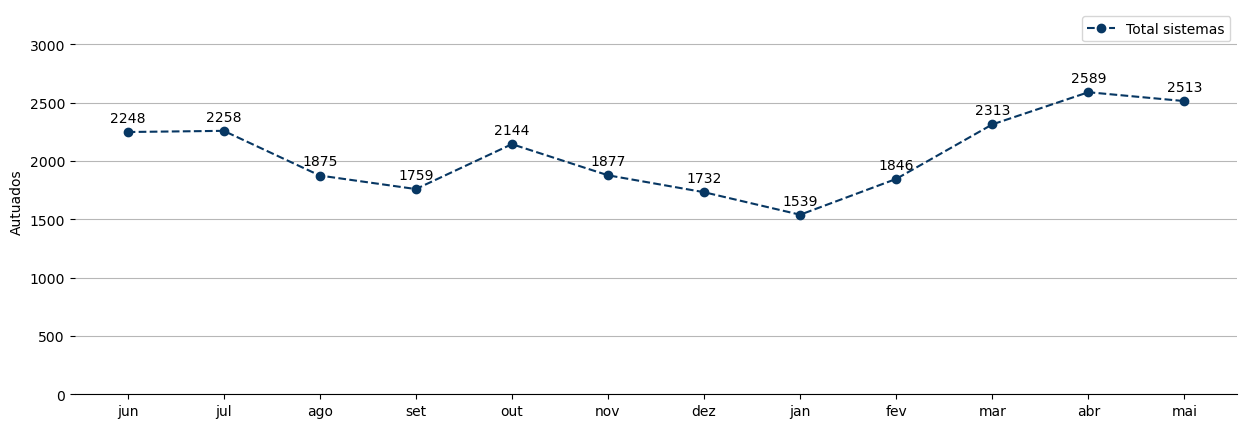

In [128]:
def graph_main_aut(coord, dados_aut):
    dados = dados_aut
    meses = lista_meses
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='--', color='#073763', label='Total sistemas')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 3000  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 500))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_main_comparativo_desp.png', dpi=300)

dados = smul_param['block_placement'].get('bloco_main_desp_comparativo').get('data').get('Total')

if dados:
    graph_main_aut('smul', dados)

##### Despachos por coordenadoria

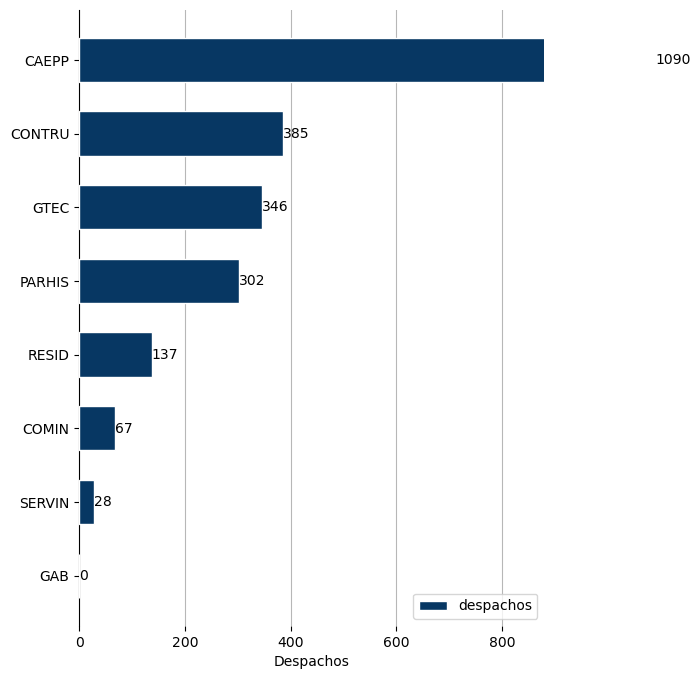

In [130]:
#dados = caepp_param['block_placement']['bloco_main_fontes']['data']
def graph_main_fontes_div(coord, dados):

    blue_palette = ['#073763', '#9fc5e8', '#3d85c6']
    
    categories = list(dados.keys())[::-1]
    lista_invertida = list(dados.values())[::-1]


    # Configurar a largura das barras
    bar_width = 0.6

    fig, ax = plt.subplots(figsize=(6, 8))

    # Criar o gráfico de barras horizontais
    bars = plt.barh(categories, lista_invertida, color=blue_palette[0], height=bar_width, edgecolor='white', label='despachos', zorder=3)

    # Escrever valores dentro das barras
    for bar in bars:
        xval = bar.get_width()
        plt.text(xval, bar.get_y() + bar.get_height()/2.0, int(xval), ha='left', va='center', fontsize=10)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='x', zorder=0)
    plt.xlabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_color('none')

    # Ajustar margem direita maior
    desired_right_limit = 800  # Defina o limite direito desejado
    ax.xaxis.set_ticks(range(0, 801, 200))  # Configurar marcadores no eixo X
    ax.set_xlim(right=desired_right_limit * 1.1)

    # Adicionar uma legenda
    plt.legend(loc='lower right')

    plt.savefig(f'pdf_img/{coord}_main_desp_coord.png', dpi=300)
    #lt.show()

dados = smul_param['block_placement'].get('bloco_main_desp_coord').get('data')

if dados:
    graph_main_fontes_div('smul', dados)

In [131]:
itens_ordenados = sorted(dados.items(), key=lambda x: x[1], reverse=True)
itens_ordenados

[('CAEPP', 1090),
 ('CONTRU', 385),
 ('GTEC', 346),
 ('PARHIS', 302),
 ('RESID', 137),
 ('COMIN', 67),
 ('SERVIN', 28),
 ('GAB', 0)]

##### Despachos por sistema

{'Aprova Digital': 114, 'SisSEL': 23}

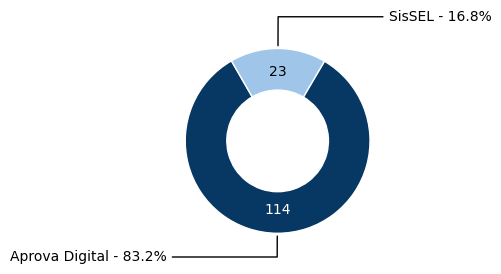

In [133]:
def graph_main_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_main_fontes.png', dpi=300)

dados = resid_param['block_placement'].get('bloco_main_fontes').get('data')
if dados:
    graph_main_fontes('smul', dados)

dados

##### Comuniqueses emitidos 12 meses

##### Comuniqueses por coordenadoria

##### Comuniqueses por sistema

##### Autuações

### RESID

#### Geral

##### Grafico main fontes

{'Aprova Digital': 114, 'SisSEL': 23}

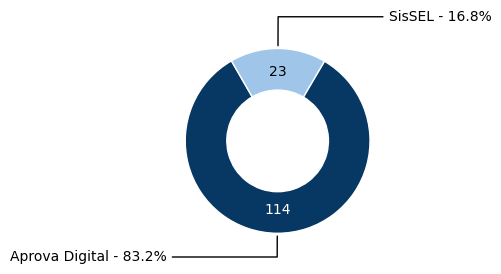

In [141]:
def graph_main_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_main_fontes.png', dpi=300)

dados = resid_param['block_placement'].get('bloco_main_fontes').get('data')
if dados:
    graph_main_fontes('resid', dados)

dados

##### Grafico main comparativo

{'SisSEL': [34, 44, 40, 37, 28, 24, 38, 26, 25, 12, 29, 23],
 'Aprova Digital': [249, 280, 99, 95, 111, 45, 85, 95, 68, 61, 87, 114],
 'Total': [283, 324, 139, 132, 139, 69, 123, 121, 93, 73, 116, 137]}

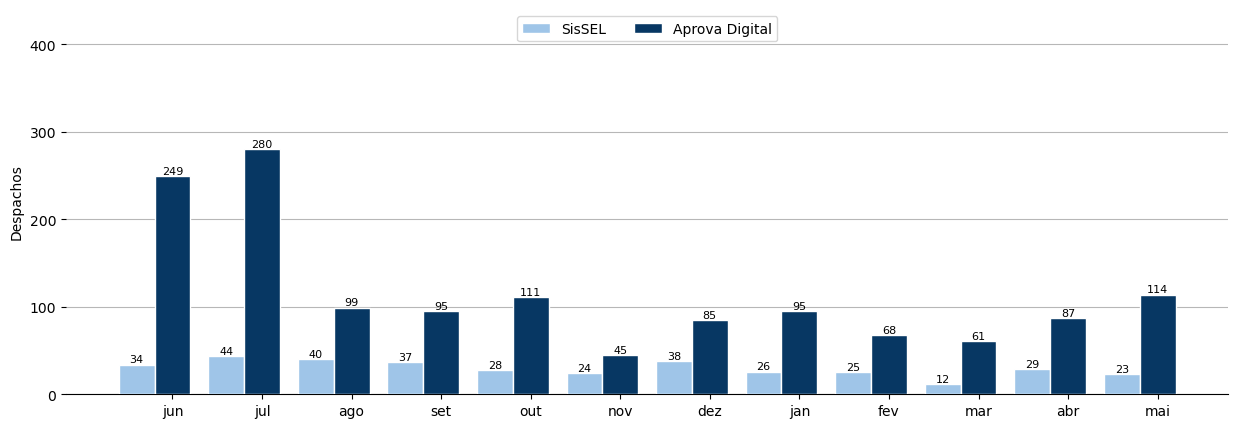

In [143]:
def graph_main_comparativo(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]

    plt.savefig(f'pdf_img/{coord}_main_comparativo.png', dpi=300)

dados = resid_param['block_placement'].get('bloco_main_comparativo').get('data')
if dados:
    main_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo('resid', main_comparativo)

dados

##### Grafico main comparativo comuniqueses

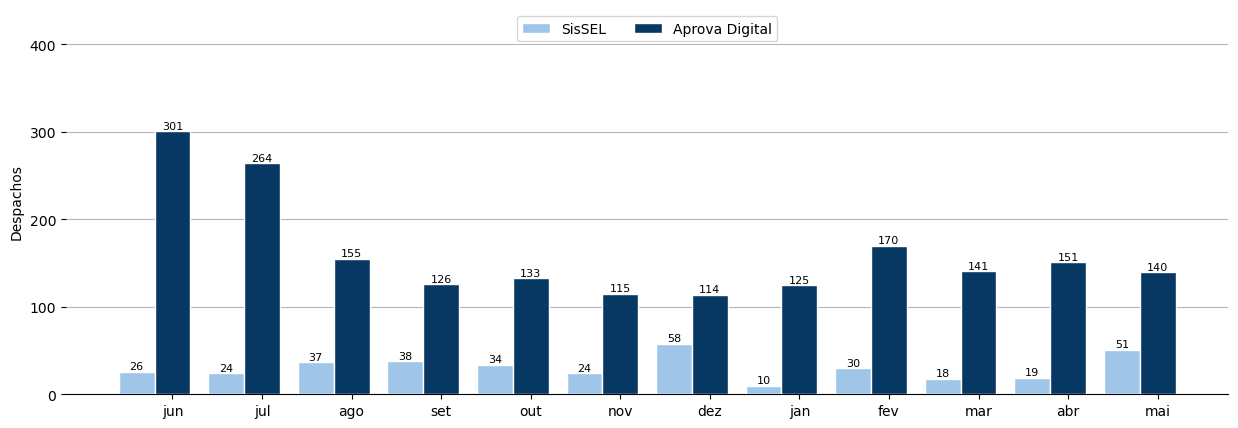

In [145]:
def graph_main_comparativo_comun(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)

    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height() #+ 10
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]
    plt.savefig(f'pdf_img/{coord}_main_comparativo_comun.png', dpi=300)

dados = resid_param['block_placement'].get('bloco_main_comparativo_comun').get('data')
if dados:
    main_comparativo_comun = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo_comun('resid', main_comparativo_comun)

##### Gráfico main comuniqueses

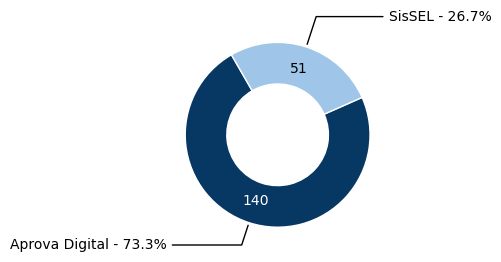

In [147]:
def graph_main_comun(coord, dados):
    
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_main_comun.png', dpi=300)
    
dados = resid_param['block_placement'].get('bloco_main_comuniqueses').get('data')
if dados:
    graph_main_comun('resid', dados)

##### Gráfico main Autuacoes

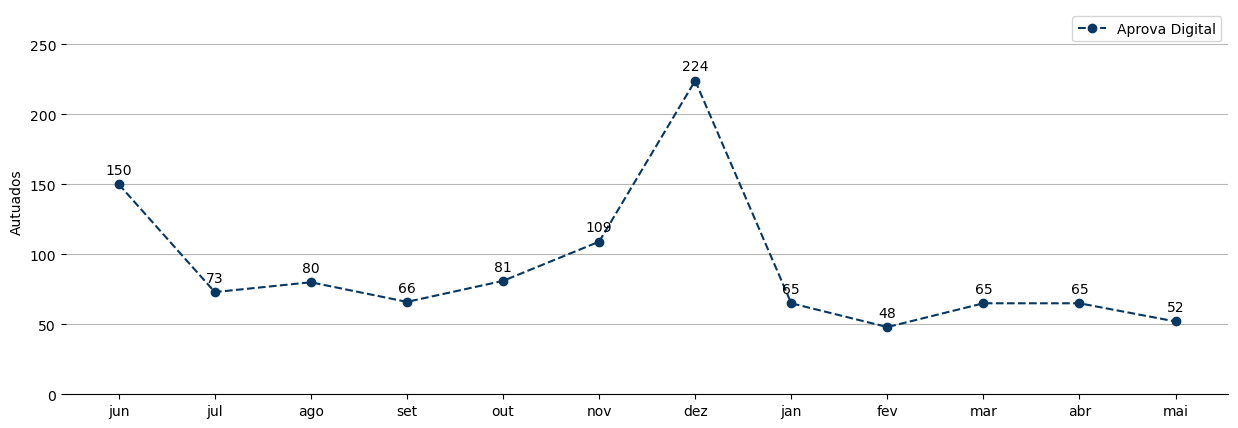

In [149]:
def graph_main_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='--', color='#073763', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 250  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 50))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_main_autuados.png', dpi=300)

main_aut = resid_param['block_placement'].get('bloco_main_autuacoes').get('data').get('Aprova Digital')
if main_aut:
    graph_main_aut('resid', main_aut)

#### Aprova Digital

##### Gráfico ad fontes

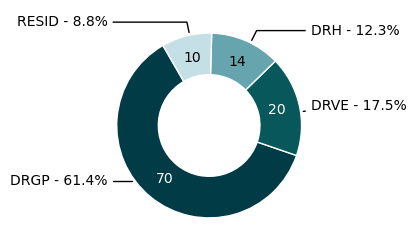

In [152]:

def graph_ad_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    green_pallete = ['#003b46','#07575b','#66a5ad','#c4dfe6', '#d8f3fa']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=green_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2.3 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_ad_fontes.png', dpi=300)
    
ad_fontes = resid_param['block_placement'].get('bloco_ad_fontes').get('data')
if ad_fontes:
    graph_ad_fontes('resid', ad_fontes)

##### Gráfico AD comparativo

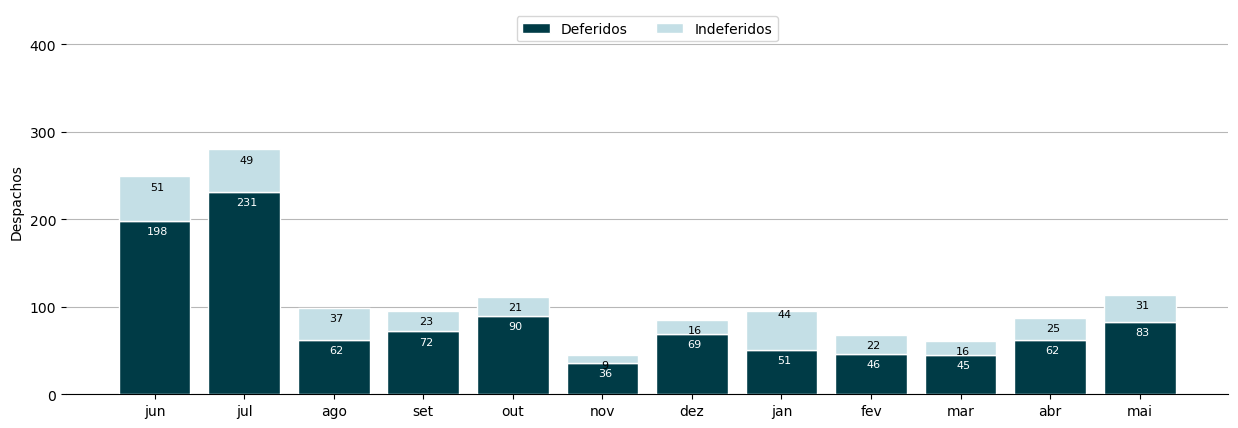

In [154]:
def graph_ad_comparativo(coord, dados):
    green_pallete = ['#c4dfe6', '#003b46']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=green_pallete[1],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=green_pallete[0], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 12
        ajuste_indef = 12
        if i == 7 or i == 12:
            ajuste_indef = 3
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_img/{coord}_ad_comparativo.png', dpi=300)
    

ad_comparativo = resid_param['block_placement'].get('bloco_ad_comparativo').get('data')
if ad_comparativo:
    df_ad_comparativo = pd.DataFrame(ad_comparativo, index=lista_meses)
    graph_ad_comparativo('resid', df_ad_comparativo)

##### Grafico ad comuniqueses

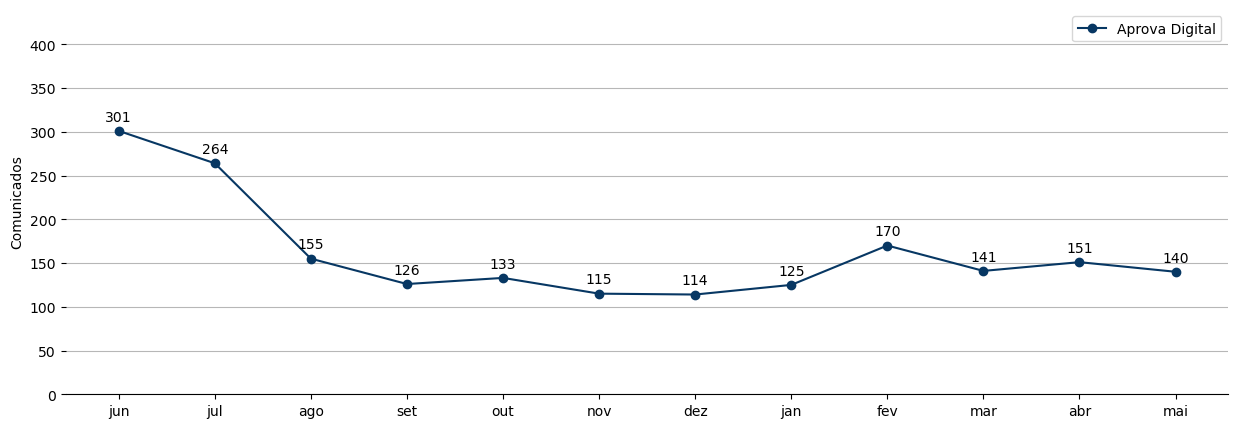

In [156]:
def graph_ad_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#073763', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Comunicados')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 50))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_ad_comun.png', dpi=300)
    
ad_comun = resid_param['block_placement'].get('bloco_ad_comuniqueses').get('data')
if ad_comun:
    graph_ad_comun('resid', ad_comun)

##### Grafico ad Autuados

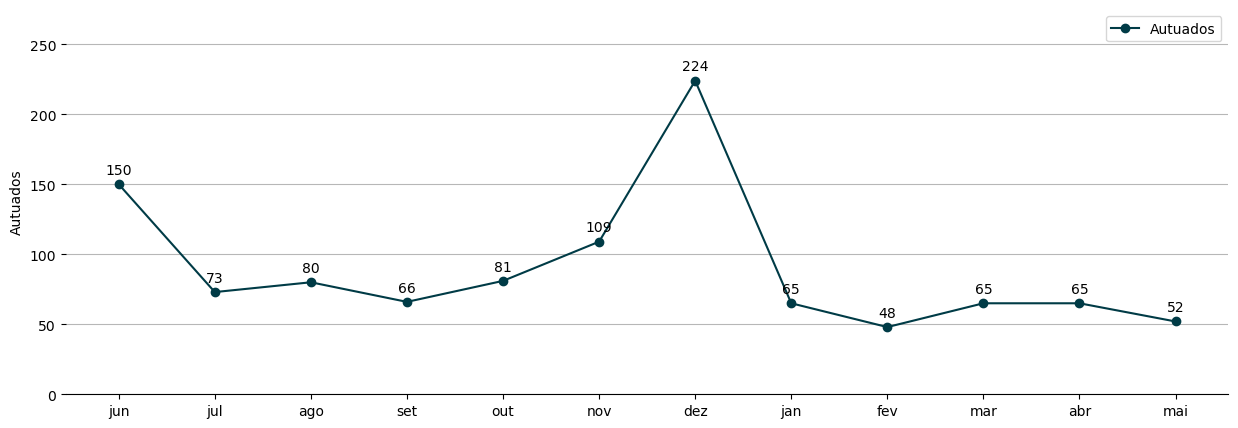

In [158]:
def graph_ad_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4


    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Autuados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 250  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 50))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_ad_autuados.png', dpi=300)

ad_aut = resid_param['block_placement'].get('bloco_ad_autuacoes').get('data')
if ad_aut:
    graph_ad_aut('resid', ad_aut)

#### SisSEL

##### Grafico sissel fontes

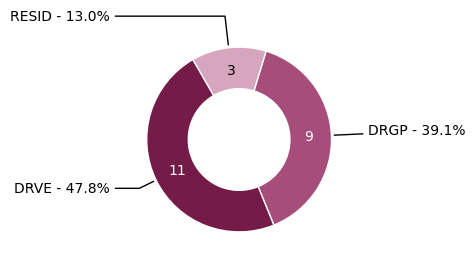

In [161]:
def graph_sissel_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    pink_pallete = ['#741b47','#a64d79', '#d5a6bd', '#c27ba0']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=pink_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_sissel_fontes.png', dpi=300)

dados = resid_param['block_placement'].get('bloco_sissel_fontes').get('data')
if dados:
    graph_sissel_fontes('resid', dados)

##### Grafico sissel comaprativo

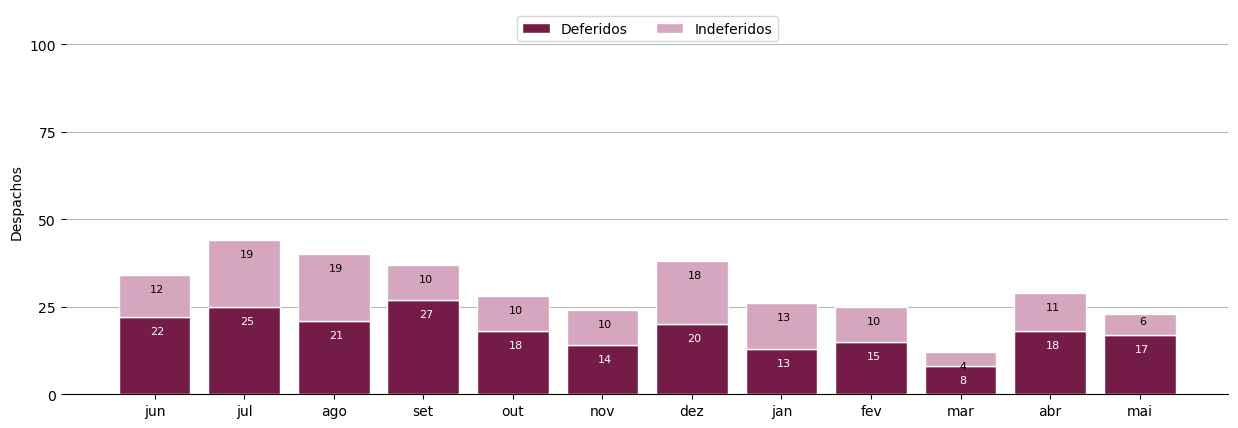

In [163]:
def graph_sissel_comparativo(coord, dados):
    pink_pallete = ['#741b47', '#d5a6bd']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=pink_pallete[0],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=pink_pallete[1], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 4
        ajuste_indef = 4
        if i == 11:
            ajuste_indef = 2
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_img/{coord}_sissel_comparativo.png', dpi=300)

dados = resid_param['block_placement'].get('bloco_sissel_comparativo').get('data')
if dados:
    df_dados = pd.DataFrame(dados, index=lista_meses)
    graph_sissel_comparativo('resid', df_dados)

##### Grafico sissel comuniqueses

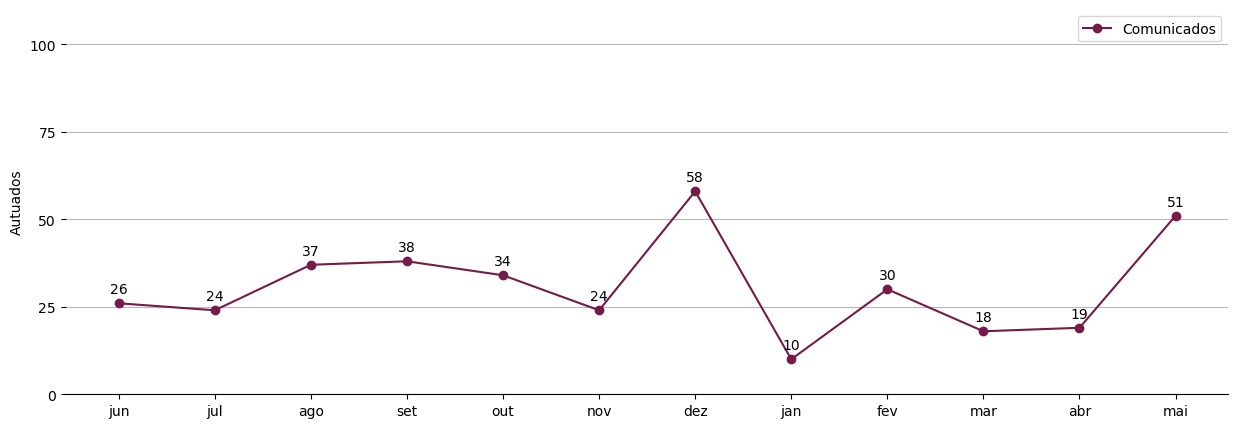

In [165]:
def graph_sissel_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4


    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#741b47', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_sissel_comun.png', dpi=300)
    
dados_com = resid_param['block_placement'].get('bloco_sissel_comuniqueses').get('data')
if dados_com:
    graph_sissel_comun('resid', dados_com)

##### grafico sissel autuados

### SERVIN

#### Geral

##### Grafico main fontes

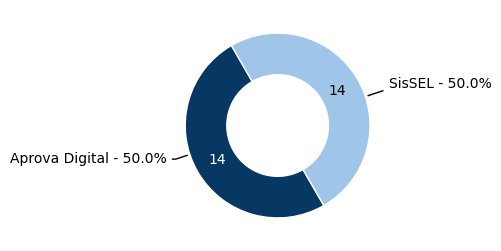

In [170]:
#dados = servin_param['block_placement']['bloco_main_fontes']['data']
def graph_main_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2.3 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_main_fontes.png', dpi=300)

dados = servin_param['block_placement'].get('bloco_main_fontes').get('data')
if dados:
    graph_main_fontes('servin', dados)

##### Grafico main comparativo

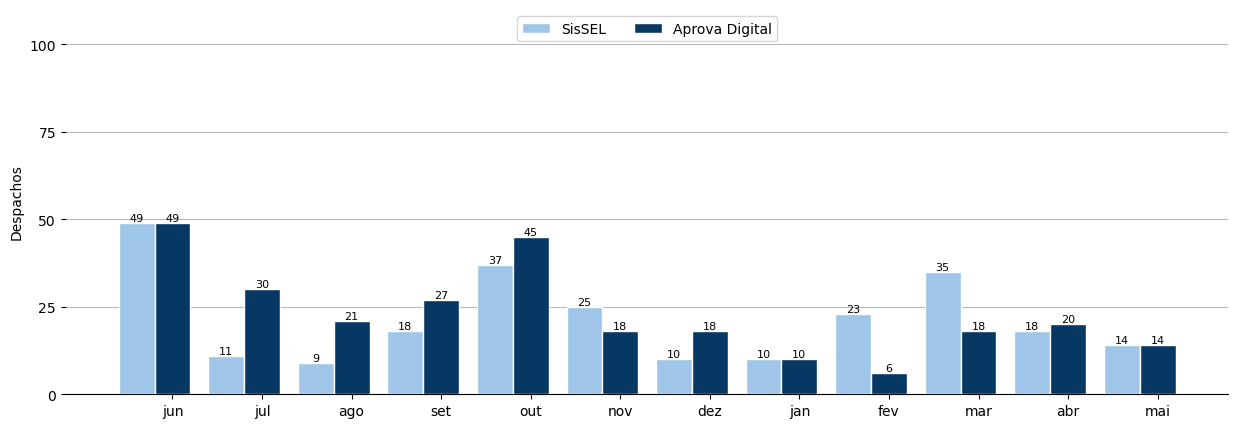

In [172]:
def graph_main_comparativo(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]

    plt.savefig(f'pdf_img/{coord}_main_comparativo.png', dpi=300)

dados = servin_param['block_placement'].get('bloco_main_comparativo').get('data')
if dados:
    main_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo('servin', main_comparativo)

##### Grafico main comparativo comuniqueses

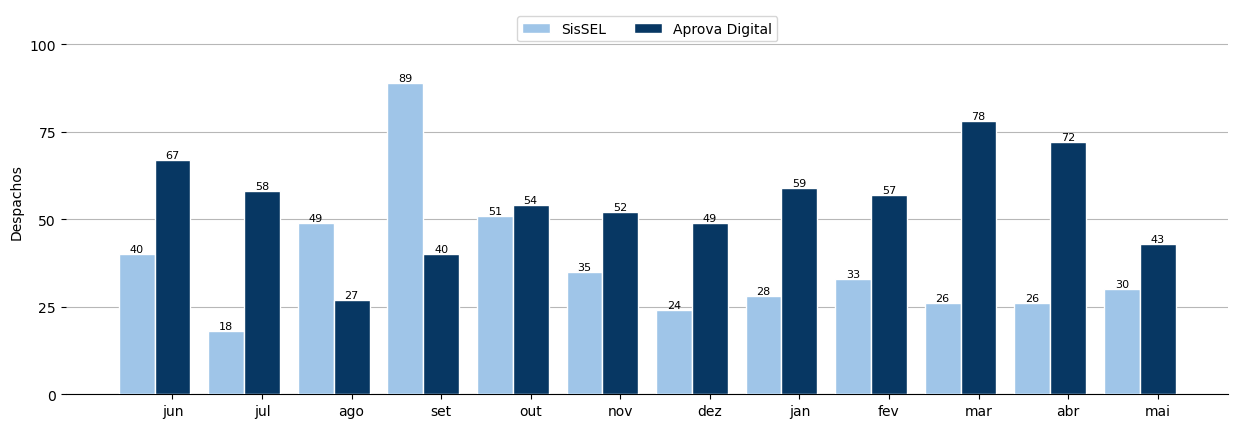

In [174]:
def graph_main_comparativo_comun(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)

    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height() #+ 10
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]
    plt.savefig(f'pdf_img/{coord}_main_comparativo_comun.png', dpi=300)

dados = servin_param['block_placement'].get('bloco_main_comparativo_comun').get('data')
if dados:
    main_comparativo_comun = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo_comun('servin', main_comparativo_comun)

##### Gráfico main comuniqueses

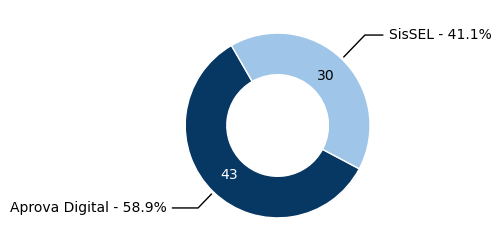

In [176]:
def graph_main_comun(coord, dados):
    
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_main_comun.png', dpi=300)
    
dados = servin_param['block_placement'].get('bloco_main_comuniqueses').get('data')
if dados:
    graph_main_comun('servin', dados)

##### Gráfico main Autuacoes

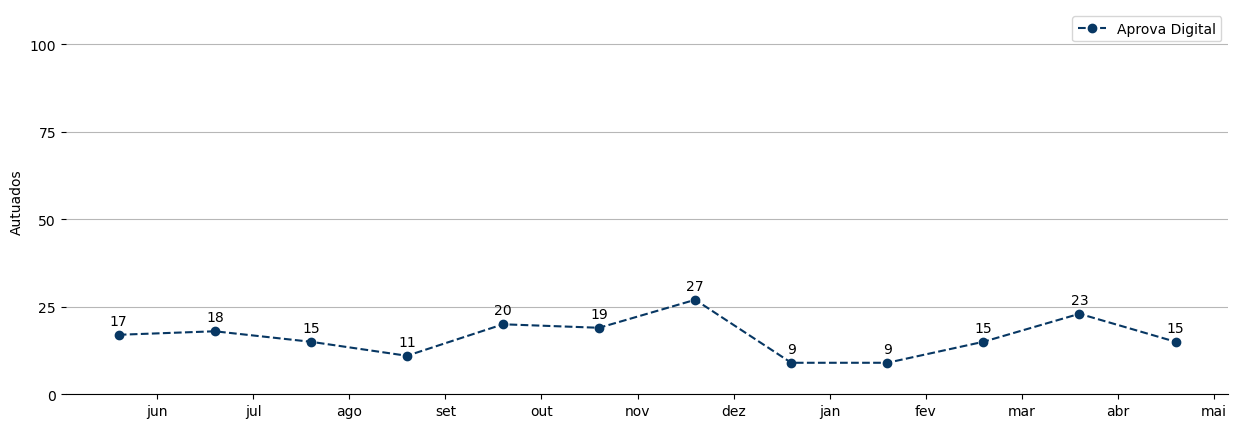

In [178]:
def graph_main_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='--', color='#073763', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_main_autuados.png', dpi=300)

main_aut = servin_param['block_placement'].get('bloco_main_autuacoes').get('data').get('Aprova Digital')
if main_aut:
    graph_main_aut('servin', main_aut)

#### Aprova Digital

##### Gráfico ad fontes

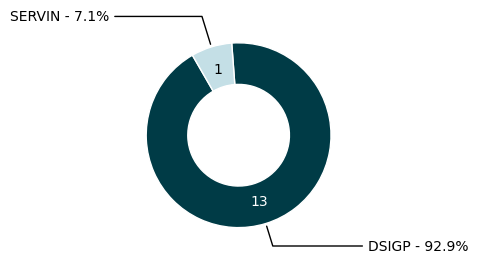

In [181]:
def graph_ad_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    green_pallete = ['#003b46', '#c4dfe6', '#66a5ad', '#07575b']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=green_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wbww')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_ad_fontes.png', dpi=300)
    
ad_fontes = servin_param['block_placement'].get('bloco_ad_fontes').get('data')
if ad_fontes:
    graph_ad_fontes('servin', ad_fontes)

##### Gráfico AD comparativo

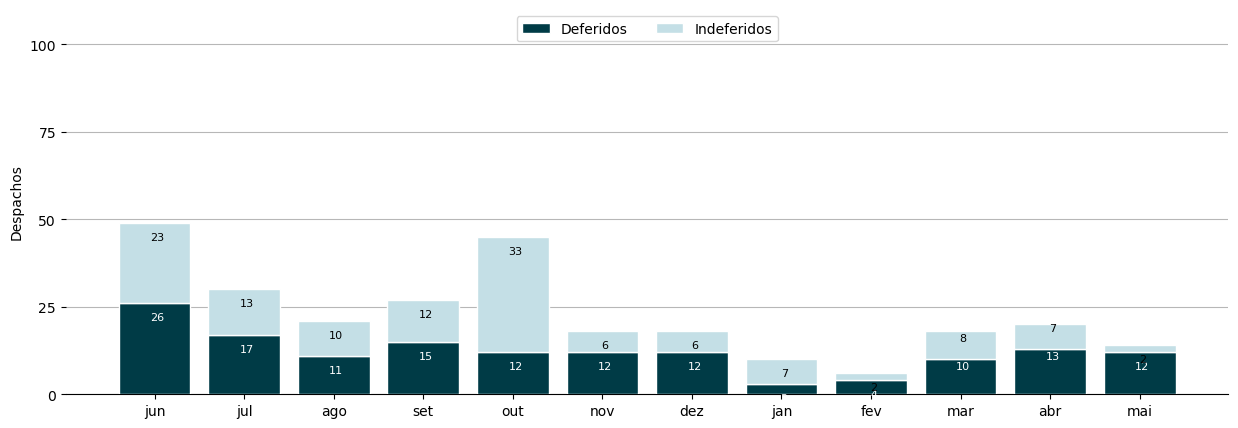

In [183]:
def graph_ad_comparativo(coord, dados):
    green_pallete = ['#c4dfe6', '#003b46']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=green_pallete[1],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=green_pallete[0], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 4
        ajuste_indef = 4
        if i == 9:
            ajuste_indef = 2
            ajuste_def = 2
        if i == 10:
            ajuste_indef = 1
            ajuste_def = 2
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_img/{coord}_ad_comparativo.png', dpi=300)
    
dados = servin_param['block_placement'].get('bloco_ad_comparativo').get('data')
if dados:
    ad_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_ad_comparativo('servin', ad_comparativo)

##### Grafico ad comuniqueses

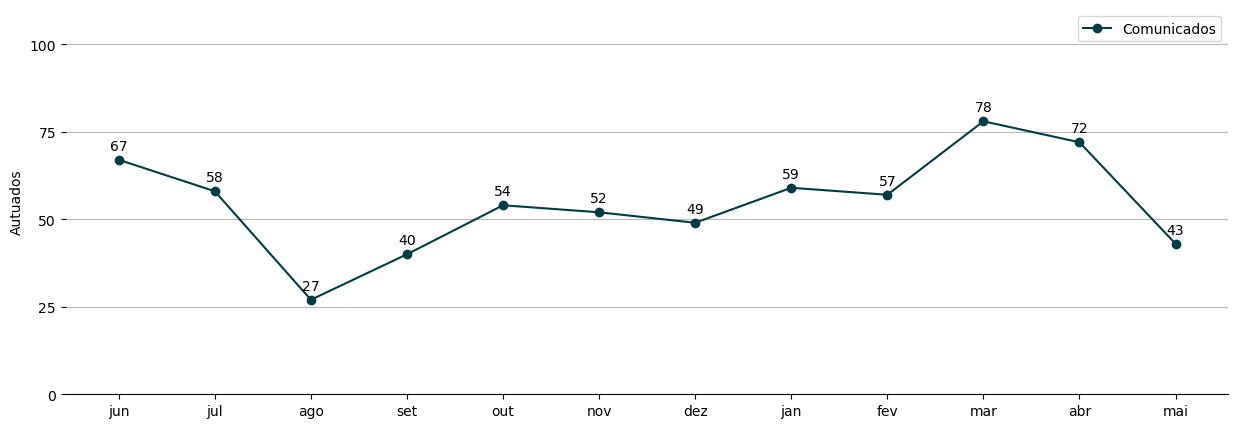

In [185]:
def graph_ad_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_ad_comun.png', dpi=300)
    
ad_comun = servin_param['block_placement'].get('bloco_ad_comuniqueses').get('data')
if ad_comun:
    graph_ad_comun('servin', ad_comun)

##### Grafico ad Autuados

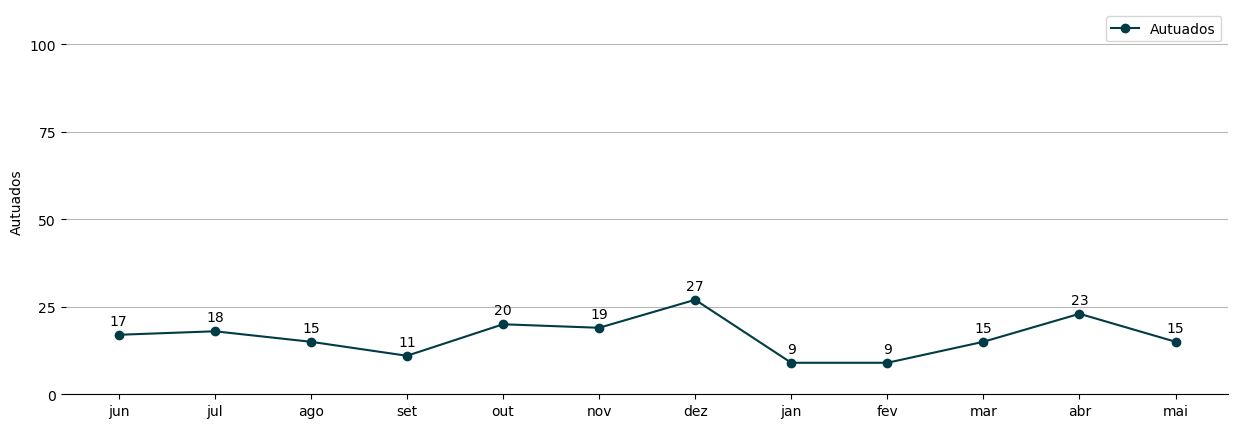

In [187]:
def graph_ad_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Autuados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_ad_autuados.png', dpi=300)

ad_aut = servin_param['block_placement'].get('bloco_ad_autuacoes').get('data')
if ad_aut:
    graph_ad_aut('servin', ad_aut)

#### SisSEL

##### Grafico sissel fontes

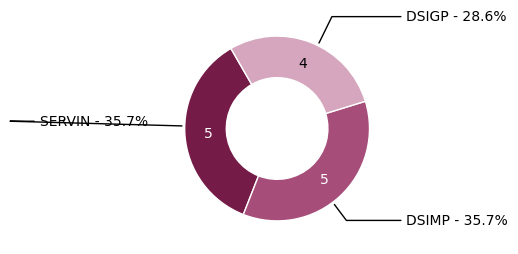

In [190]:
def graph_sissel_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    pink_pallete = ['#741b47', '#a64d79', '#d5a6bd', '#c27ba0']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=pink_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2.2 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_sissel_fontes.png', dpi=300)

dados = servin_param['block_placement'].get('bloco_sissel_fontes').get('data')
if dados:
    graph_sissel_fontes('servin', dados)

##### Grafico sissel comaprativo

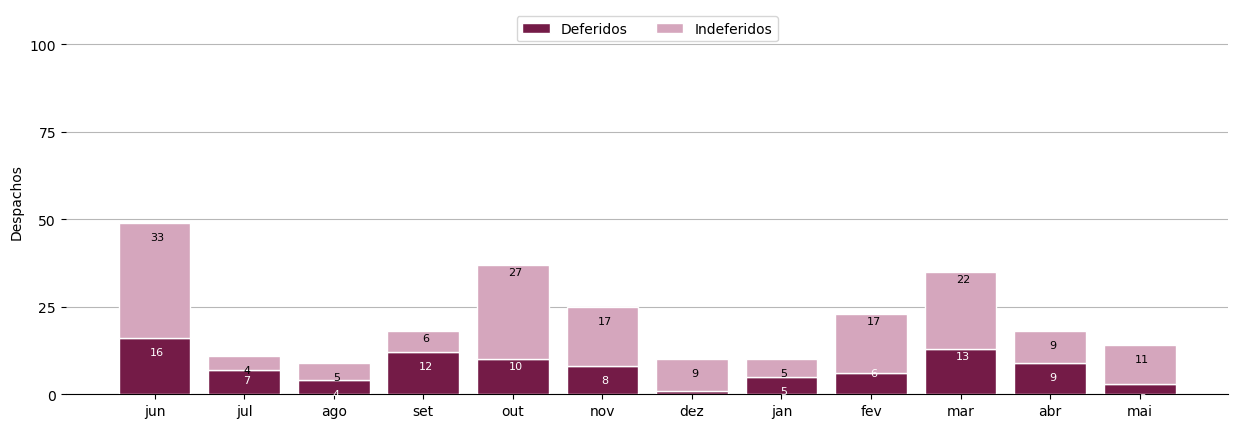

In [192]:
def graph_sissel_comparativo(coord, dados):
    pink_pallete = ['#741b47', '#d5a6bd']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=pink_pallete[0],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=pink_pallete[1], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 4
        ajuste_indef = 4
        if i == 1:
            ajuste_def = 3
        if i == 3:
            ajuste_indef = 2
        if i == 4:
            ajuste_def = 2
            ajuste_indef = 2
        if i == 8:
            ajuste_indef = 2
            ajuste_def = 0
        if i == 9:
            ajuste_indef = 2
            ajuste_def = 2
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_img/{coord}_sissel_comparativo.png', dpi=300)

dados = servin_param['block_placement'].get('bloco_sissel_comparativo').get('data')
if dados:
    df_dados = pd.DataFrame(dados, index=lista_meses)
    graph_sissel_comparativo('servin', df_dados)

##### Grafico sissel comuniqueses

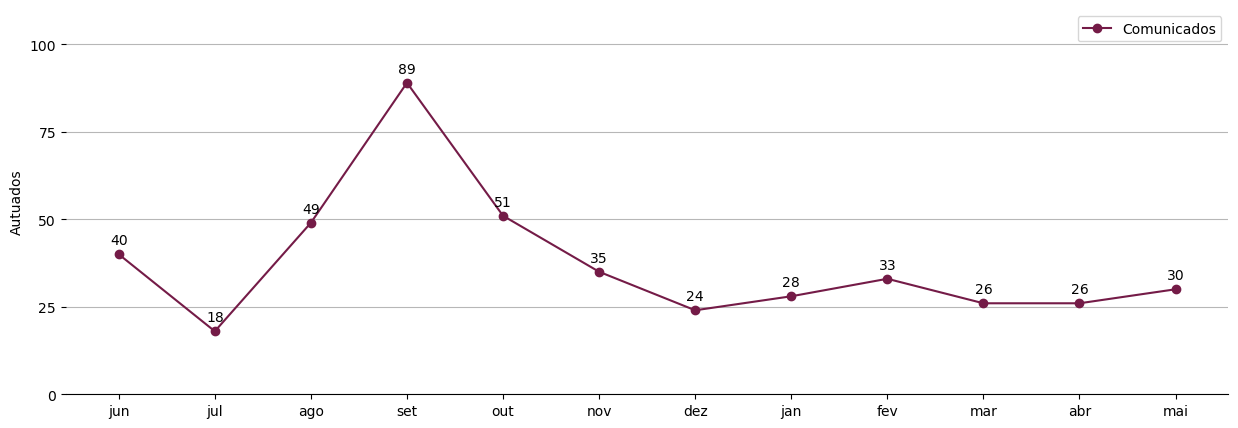

In [194]:
def graph_sissel_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#741b47', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_sissel_comun.png', dpi=300)
    
dados_com = servin_param['block_placement'].get('bloco_sissel_comuniqueses').get('data')
if dados_com:
    graph_sissel_comun('servin', dados_com)

##### grafico sissel autuados

### COMIN

#### Geral

##### Grafico main fontes

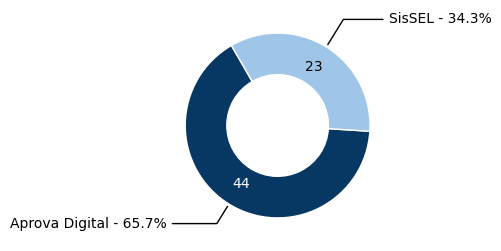

In [199]:
def graph_main_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_main_fontes.png', dpi=300)

dados = comin_param['block_placement'].get('bloco_main_fontes').get('data')
if dados:
    graph_main_fontes('comin', dados)

##### Grafico main comparativo

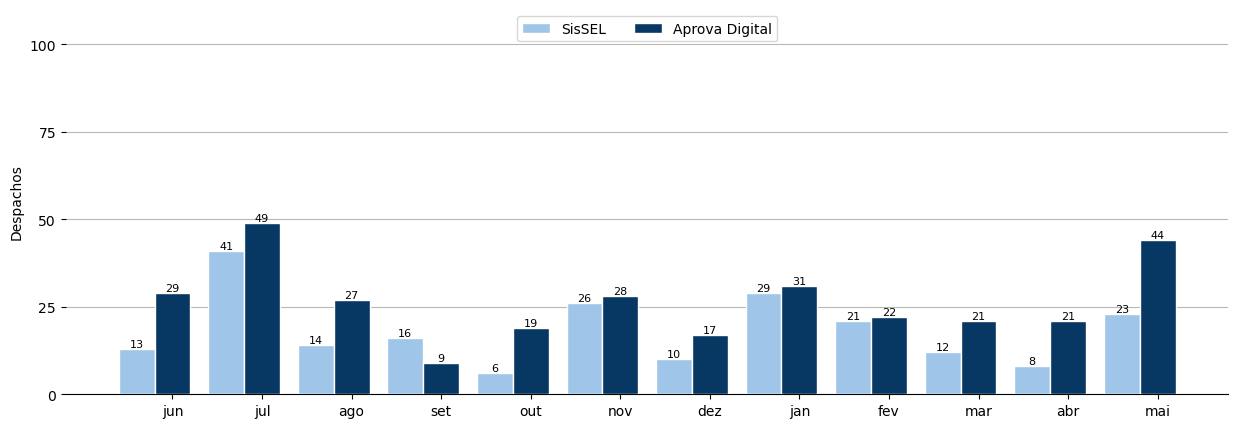

In [201]:
def graph_main_comparativo(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]

    plt.savefig(f'pdf_img/{coord}_main_comparativo.png', dpi=300)

dados = comin_param['block_placement'].get('bloco_main_comparativo').get('data')
if dados:
    main_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo('comin', main_comparativo)

##### Grafico main comparativo comuniqueses

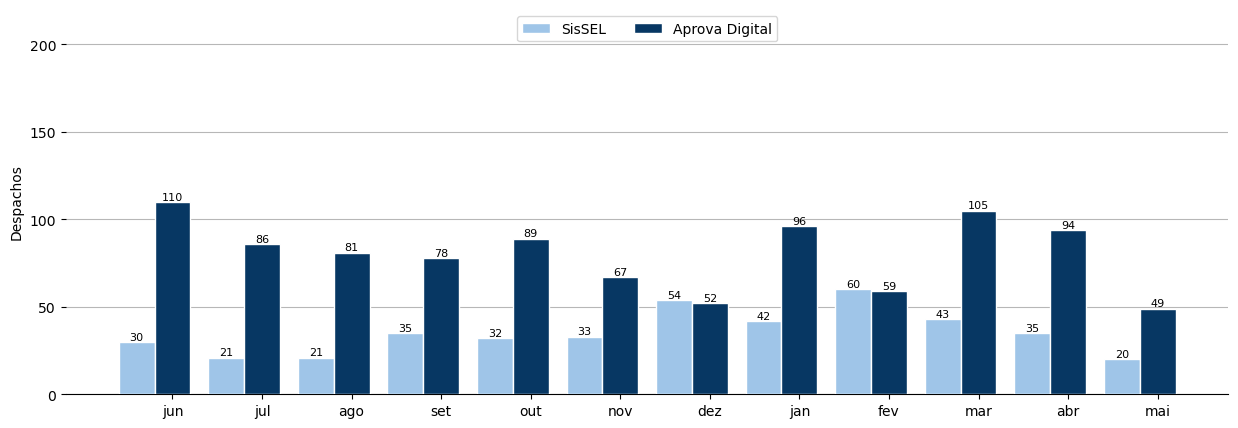

In [203]:
def graph_main_comparativo_comun(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)

    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height() #+ 10
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 200  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 50))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]
    plt.savefig(f'pdf_img/{coord}_main_comparativo_comun.png', dpi=300)

dados = comin_param['block_placement'].get('bloco_main_comparativo_comun').get('data')
if dados:
    main_comparativo_comun = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo_comun('comin', main_comparativo_comun)

##### Gráfico main comuniqueses

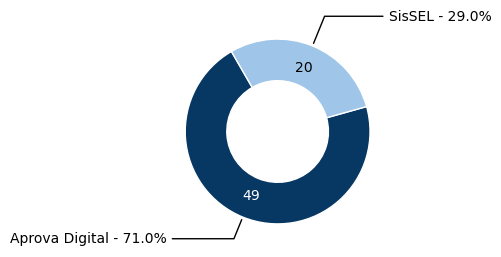

In [205]:
def graph_main_comun(coord, dados):
    
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_main_comun.png', dpi=300)
    
dados = comin_param['block_placement'].get('bloco_main_comuniqueses').get('data')
if dados:
    graph_main_comun('comin', dados)

##### Gráfico main Autuacoes

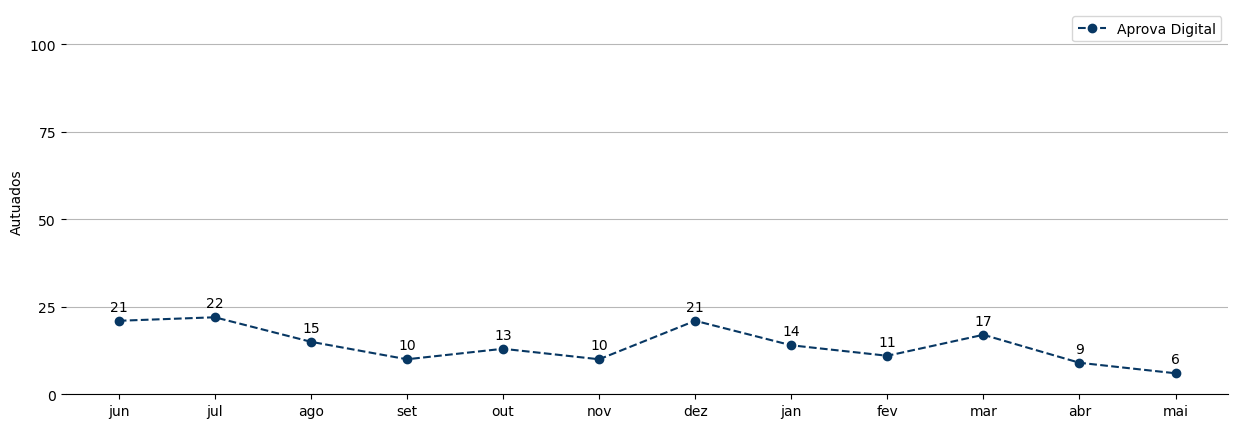

In [207]:
def graph_main_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='--', color='#073763', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_main_autuados.png', dpi=300)

main_aut = comin_param['block_placement'].get('bloco_main_autuacoes').get('data').get('Aprova Digital')
if main_aut:
    graph_main_aut('comin', main_aut)

#### Aprova Digital

##### Gráfico ad fontes

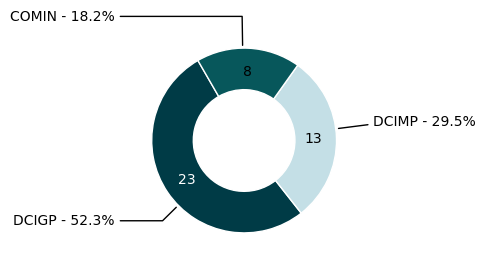

In [210]:
def graph_ad_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    green_pallete = ['#003b46','#c4dfe6','#07575b','#66a5ad',]

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=green_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wbbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/1.8 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_ad_fontes.png', dpi=300)
    
ad_fontes = comin_param['block_placement'].get('bloco_ad_fontes').get('data')
if ad_fontes:
    graph_ad_fontes('comin', ad_fontes)

##### Gráfico AD comparativo

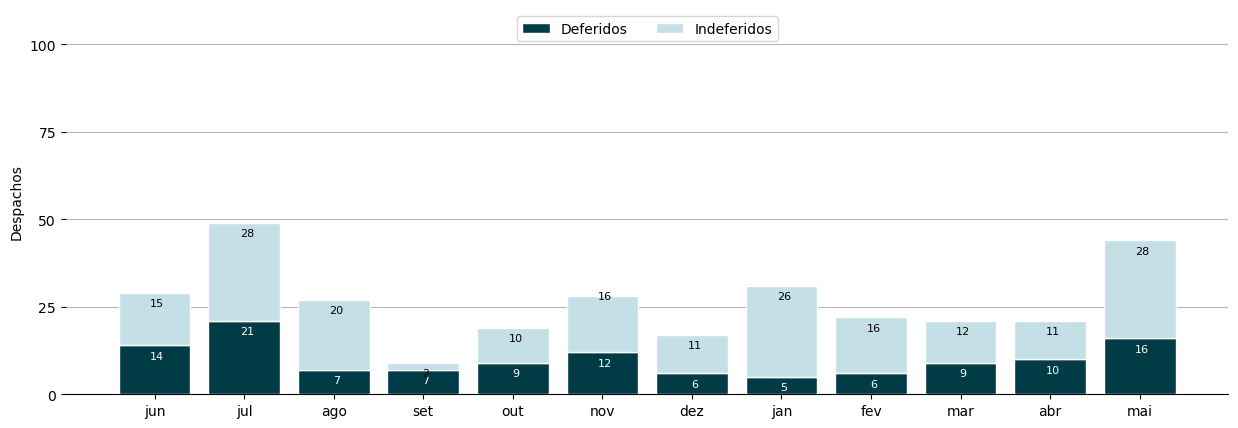

In [212]:
def graph_ad_comparativo(coord, dados):
    green_pallete = ['#c4dfe6', '#003b46']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=green_pallete[1],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=green_pallete[0], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 3
        ajuste_indef = 3
        if i == 5:
            ajuste_indef = 0
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_img/{coord}_ad_comparativo.png', dpi=300)
    
dados = comin_param['block_placement'].get('bloco_ad_comparativo').get('data')
if dados:
    ad_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_ad_comparativo('comin', ad_comparativo)

##### Grafico ad comuniqueses

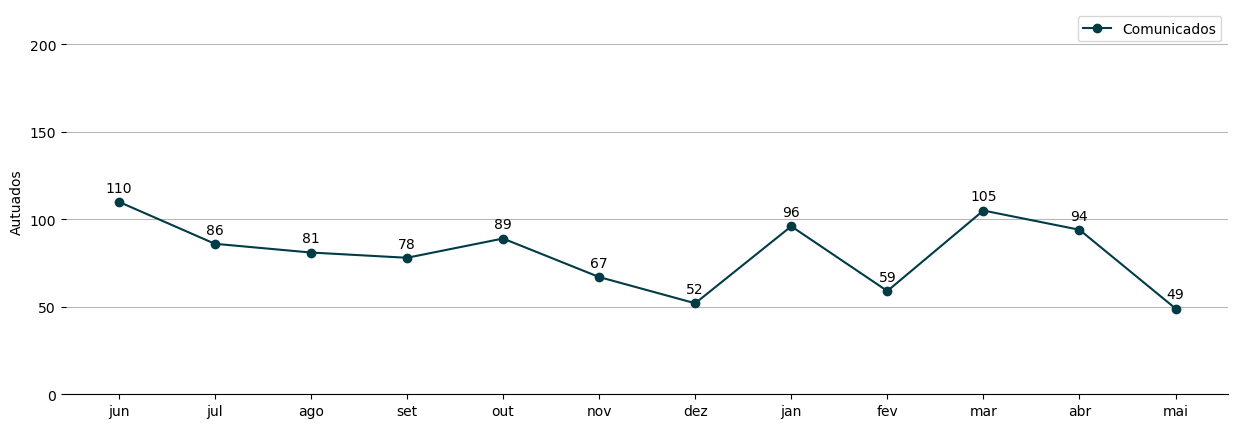

In [214]:
def graph_ad_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 200  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 50))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_ad_comun.png', dpi=300)
    
ad_comun = comin_param['block_placement'].get('bloco_ad_comuniqueses').get('data')
if ad_comun:
    graph_ad_comun('comin', ad_comun)

##### Grafico ad Autuados

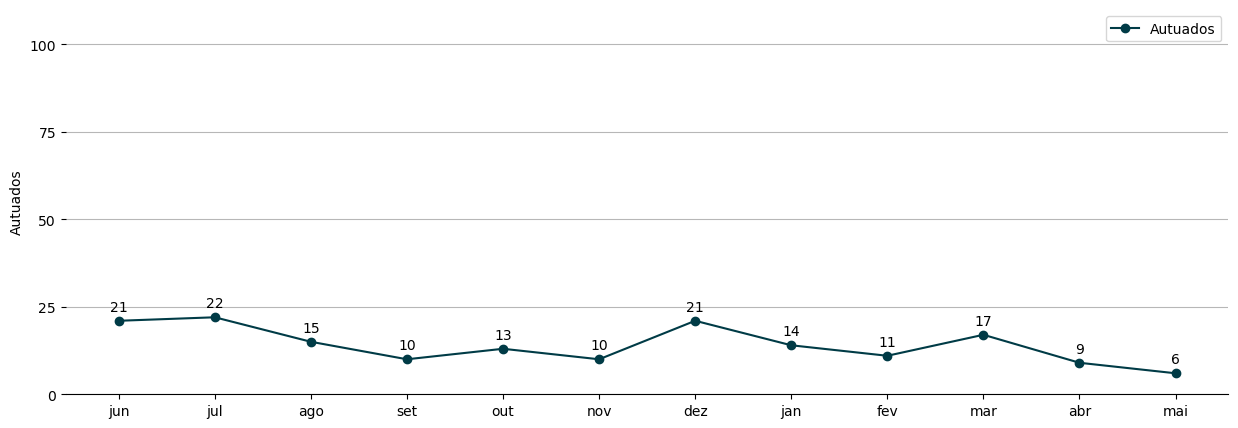

In [216]:
def graph_ad_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Autuados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_ad_autuados.png', dpi=300)

ad_aut = comin_param['block_placement'].get('bloco_ad_autuacoes').get('data')
if ad_aut:
    graph_ad_aut('comin', ad_aut)

#### SisSEL

##### Grafico sissel fontes

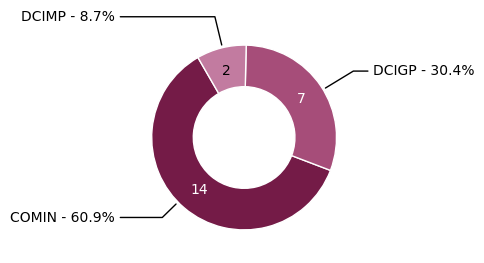

In [219]:
def graph_sissel_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    pink_pallete = ['#741b47','#a64d79','#c27ba0','#d5a6bd']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=pink_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2.1 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_sissel_fontes.png', dpi=300)

dados = comin_param['block_placement'].get('bloco_sissel_fontes').get('data')
if dados:
    graph_sissel_fontes('comin', dados)

##### Grafico sissel comaprativo

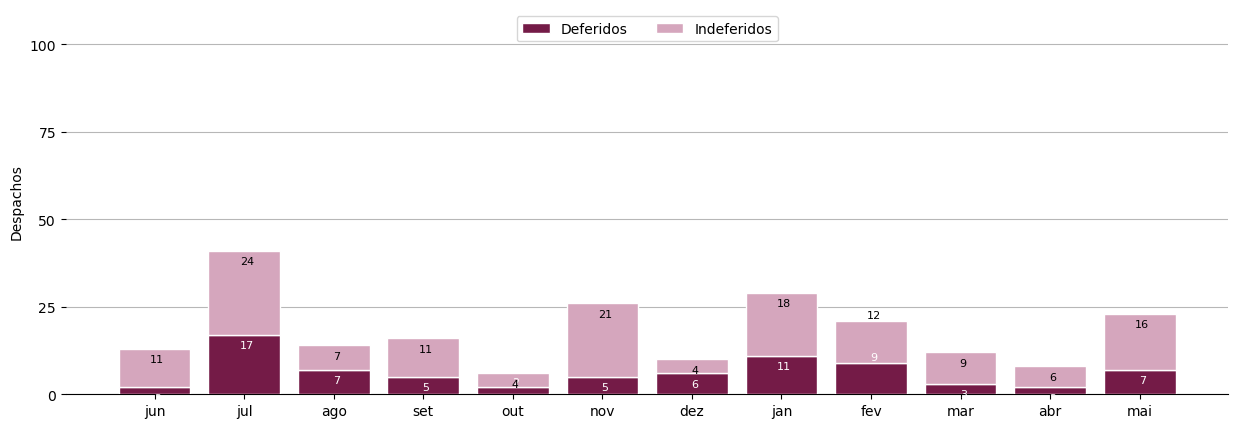

In [221]:
def graph_sissel_comparativo(coord, dados):
    pink_pallete = ['#741b47', '#d5a6bd']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=pink_pallete[0],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=pink_pallete[1], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 3
        ajuste_indef = 3
        if i == 4 or i == 8:
            ajuste_def = -1.5
        if i == 8:
            ajuste_indef = -1.5
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_img/{coord}_sissel_comparativo.png', dpi=300)


dados = comin_param['block_placement'].get('bloco_sissel_comparativo').get('data')
if dados:
    df_dados = pd.DataFrame(dados, index=lista_meses)
    graph_sissel_comparativo('comin', df_dados)

##### Grafico sissel comuniqueses

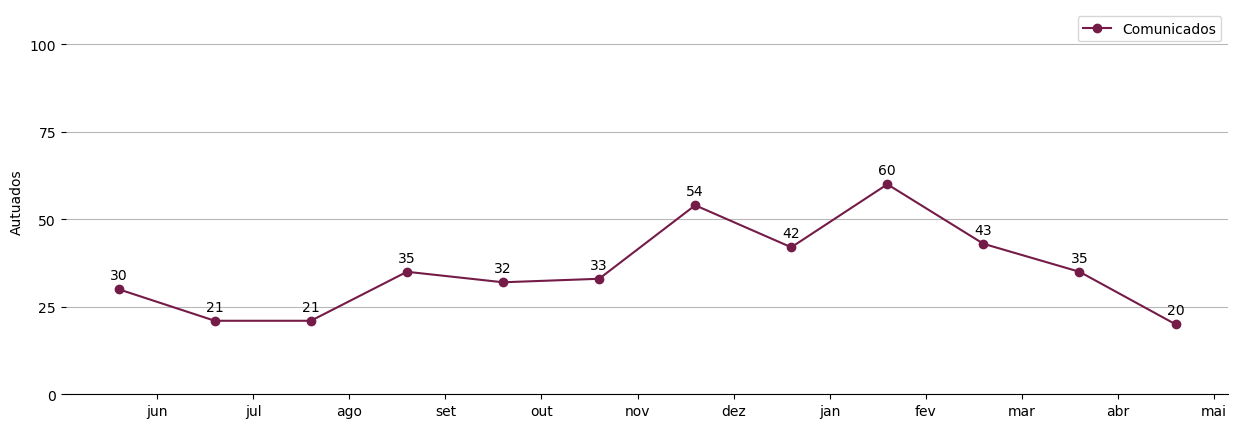

In [223]:
def graph_sissel_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#741b47', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_sissel_comun.png', dpi=300)
    
dados_com = comin_param['block_placement'].get('bloco_sissel_comuniqueses').get('data')
if dados_com:
    graph_sissel_comun('comin', dados_com)

##### grafico sissel autuados

### PARHIS

#### Geral

##### Grafico main fontes

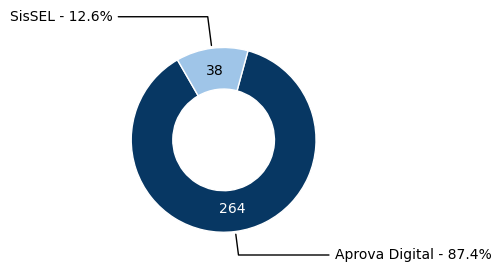

In [228]:
def graph_main_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_main_fontes.png', dpi=300)

dados = parhis_param['block_placement'].get('bloco_main_fontes').get('data')
if dados:
    graph_main_fontes('parhis', dados)

##### Grafico main comparativo

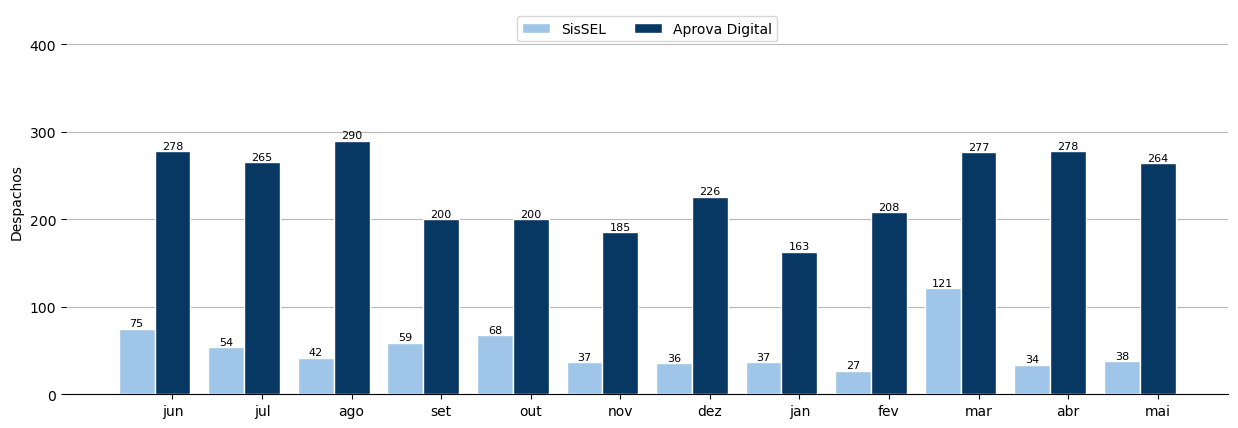

In [230]:
def graph_main_comparativo(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]

    plt.savefig(f'pdf_img/{coord}_main_comparativo.png', dpi=300)

dados = parhis_param['block_placement'].get('bloco_main_comparativo').get('data')
if dados:
    main_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo('parhis', main_comparativo)

##### Grafico main comparativo comuniqueses

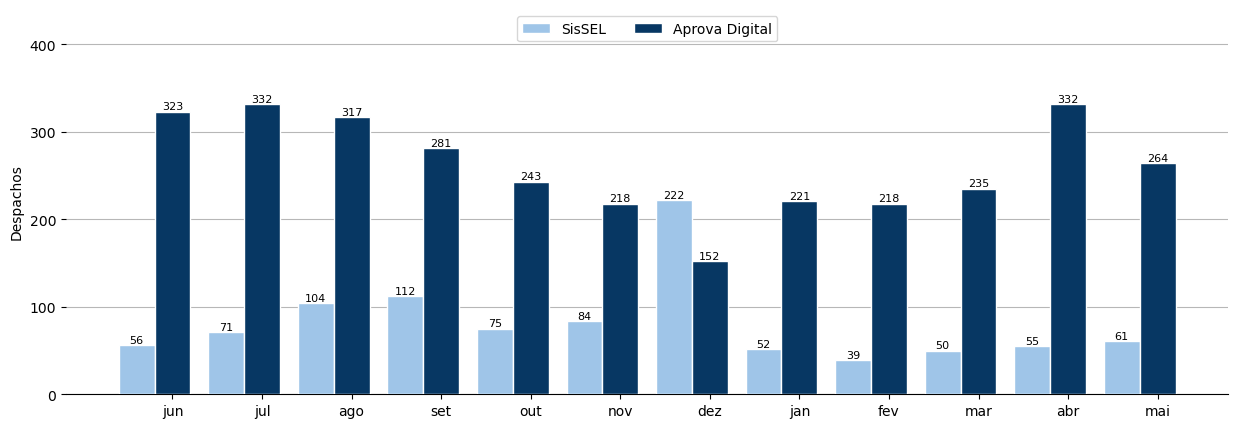

In [232]:
def graph_main_comparativo_comun(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)

    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height() #+ 10
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]
    plt.savefig(f'pdf_img/{coord}_main_comparativo_comun.png', dpi=300)

dados = parhis_param['block_placement'].get('bloco_main_comparativo_comun').get('data')
if dados:
    main_comparativo_comun = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo_comun('parhis', main_comparativo_comun)

##### Gráfico main comuniqueses

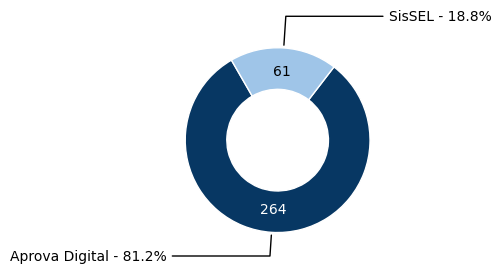

In [234]:
def graph_main_comun(coord, dados):
    
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_main_comun.png', dpi=300)
    
dados = parhis_param['block_placement'].get('bloco_main_comuniqueses').get('data')
if dados:
    graph_main_comun('parhis', dados)

##### Gráfico main Autuacoes

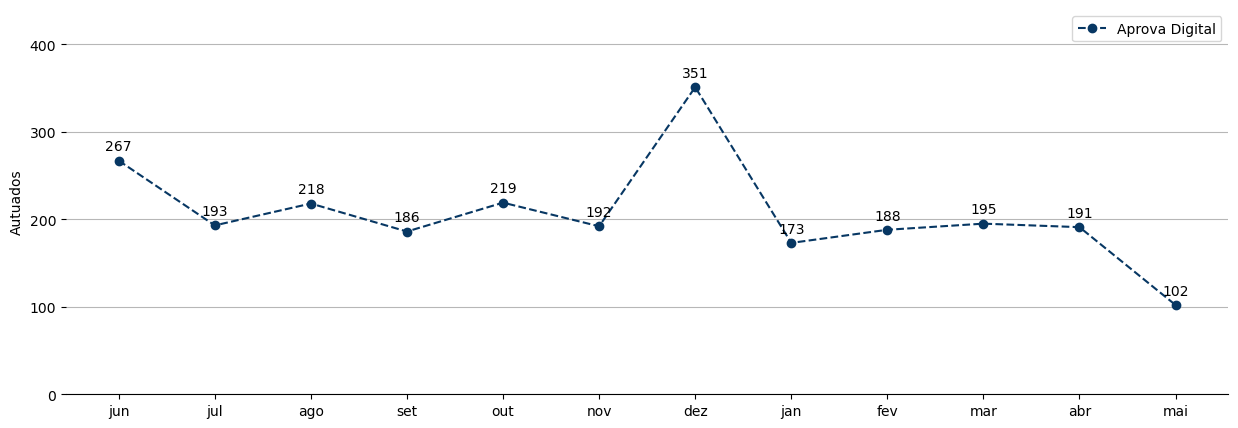

In [236]:
def graph_main_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='--', color='#073763', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_main_autuados.png', dpi=300)

main_aut = parhis_param['block_placement'].get('bloco_main_autuacoes').get('data').get('Aprova Digital')
if main_aut:
    graph_main_aut('parhis', main_aut)

#### Aprova Digital

##### Gráfico ad fontes

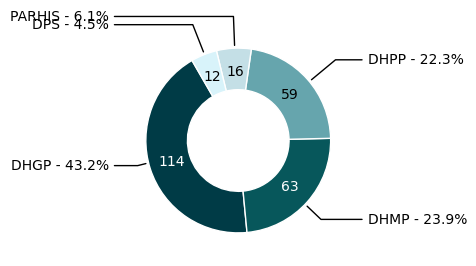

In [239]:
def graph_ad_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    green_pallete = ['#003b46','#07575b','#66a5ad','#c4dfe6', '#d8f3fa']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=green_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2.1 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_ad_fontes.png', dpi=300)
    
ad_fontes = parhis_param['block_placement'].get('bloco_ad_fontes').get('data')
if ad_fontes:
    graph_ad_fontes('parhis', ad_fontes)

##### Gráfico AD comparativo

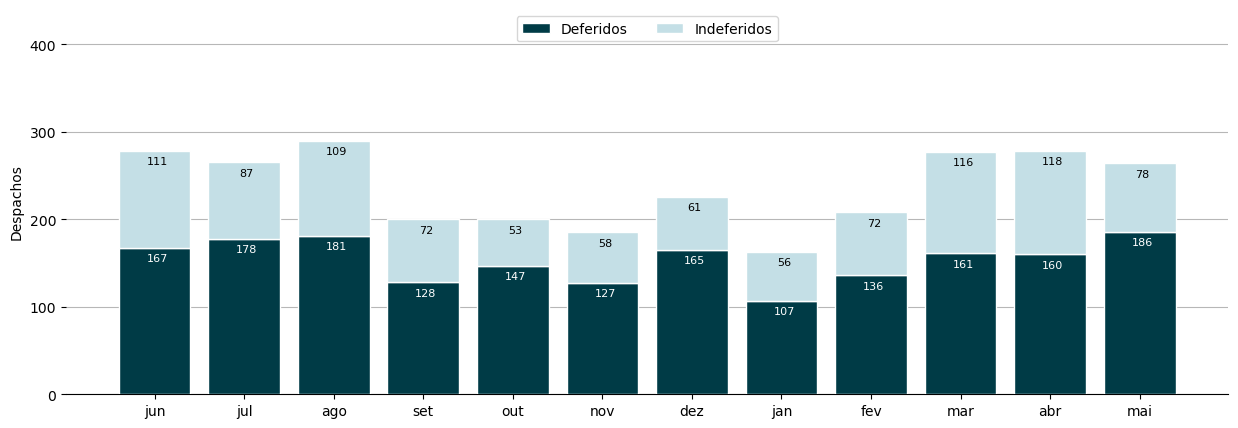

In [241]:
def graph_ad_comparativo(coord, dados):
    green_pallete = ['#c4dfe6', '#003b46']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=green_pallete[1],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=green_pallete[0], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 12
        ajuste_indef = 12
        #if i == 9:
            #ajuste_indef = 0
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_img/{coord}_ad_comparativo.png', dpi=300)
    
dados = parhis_param['block_placement'].get('bloco_ad_comparativo').get('data')
if dados:
    ad_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_ad_comparativo('parhis', ad_comparativo)

##### Grafico ad comuniqueses

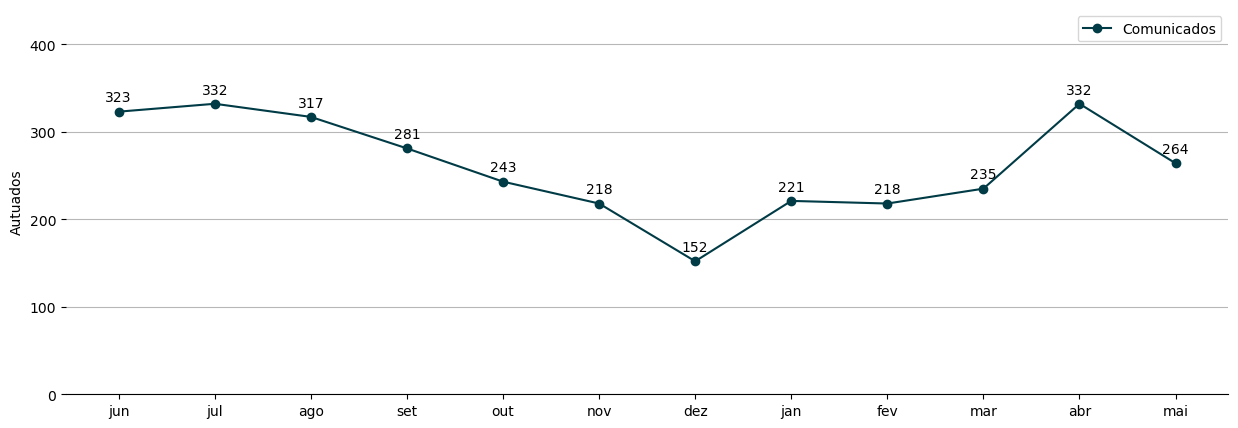

In [243]:
def graph_ad_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_ad_comun.png', dpi=300)
    
ad_comun = parhis_param['block_placement'].get('bloco_ad_comuniqueses').get('data')
if ad_comun:
    graph_ad_comun('parhis', ad_comun)

##### Grafico ad Autuados

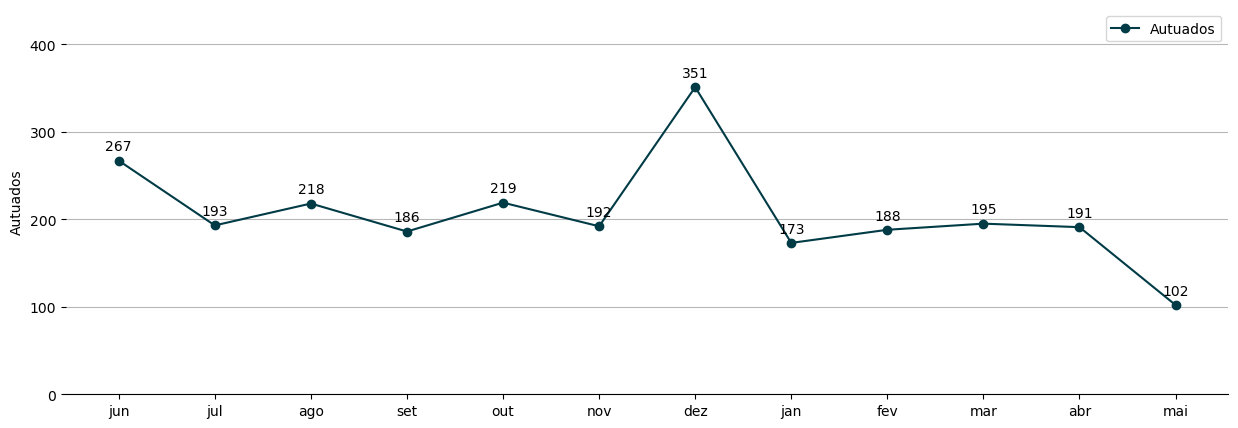

In [245]:
def graph_ad_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Autuados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_ad_autuados.png', dpi=300)

ad_aut = parhis_param['block_placement'].get('bloco_ad_autuacoes').get('data')
if ad_aut:
    graph_ad_aut('parhis', ad_aut)

#### SisSEL

##### Grafico sissel fontes

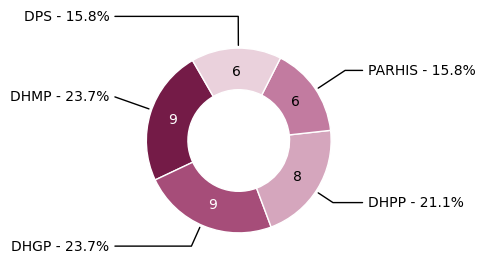

In [248]:
def graph_sissel_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    pink_pallete = ['#741b47', '#a64d79', '#d5a6bd', '#c27ba0', '#ead1dc']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=pink_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2.1 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_sissel_fontes.png', dpi=300)

dados = parhis_param['block_placement'].get('bloco_sissel_fontes').get('data')
if dados:
    graph_sissel_fontes('parhis', dados)

##### Grafico sissel comaprativo

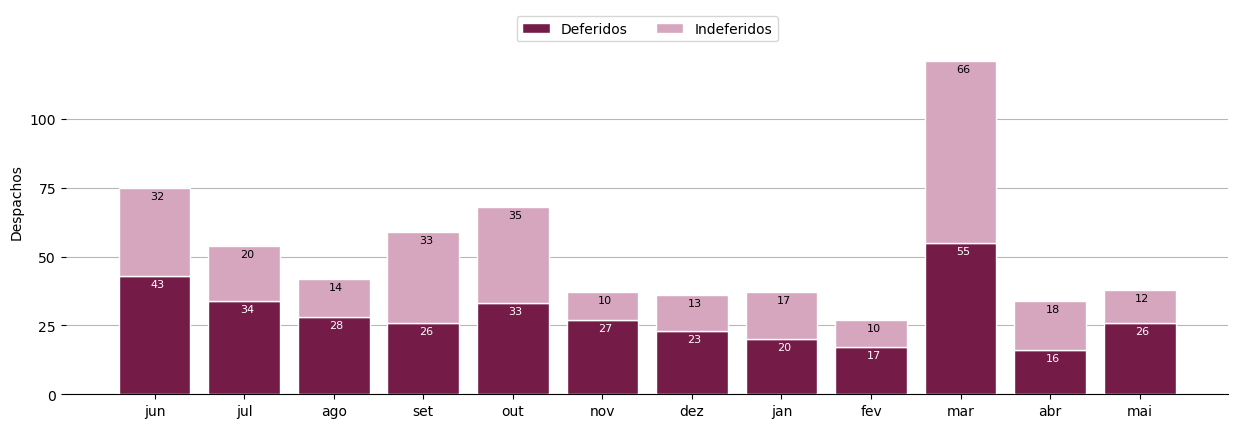

In [250]:
def graph_sissel_comparativo(coord, dados):
    pink_pallete = ['#741b47', '#d5a6bd']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=pink_pallete[0],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=pink_pallete[1], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 3
        ajuste_indef = 3
        #if i == 6 or i == 10:
        #    ajuste_def = -1.5
        #if i == 10:
        #    ajuste_indef = -1.5
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_img/{coord}_sissel_comparativo.png', dpi=300)

dados = parhis_param['block_placement'].get('bloco_sissel_comparativo').get('data')
if dados:
    df_dados = pd.DataFrame(dados, index=lista_meses)
    graph_sissel_comparativo('parhis', df_dados)

##### Grafico sissel comuniqueses

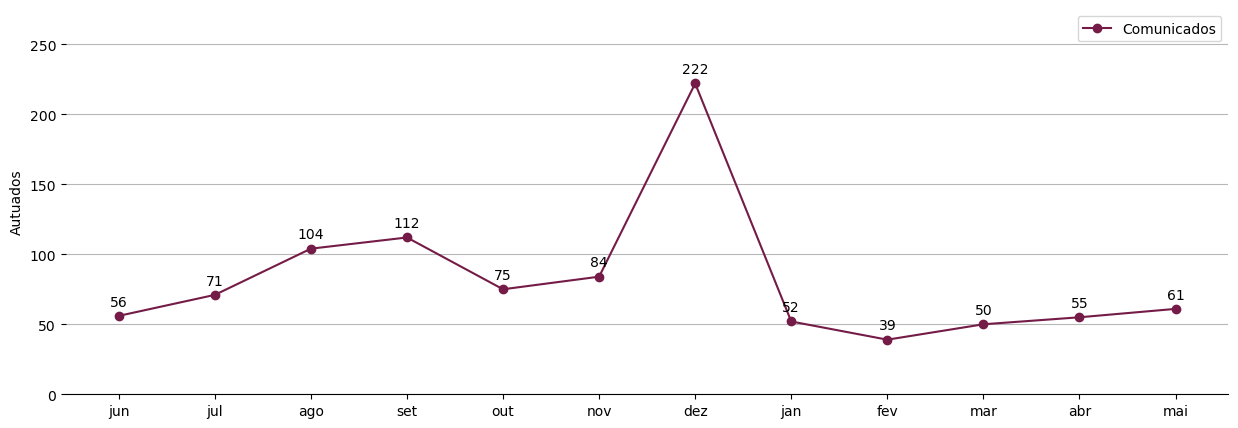

In [252]:
def graph_sissel_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#741b47', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 250  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 50))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_sissel_comun.png', dpi=300)
    
dados_com = parhis_param['block_placement'].get('bloco_sissel_comuniqueses').get('data')
if dados_com:
    graph_sissel_comun('parhis', dados_com)

##### grafico sissel autuados

### CONTRU

#### Geral

##### Grafico main fontes

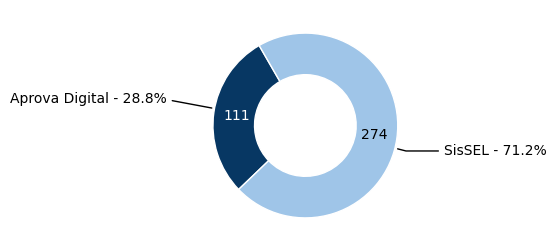

In [257]:
def graph_main_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2.1 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.5*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_main_fontes.png', dpi=300)

dados = contru_param['block_placement'].get('bloco_main_fontes').get('data')
if dados:
    graph_main_fontes('contru', dados)

##### Grafico main comparativo

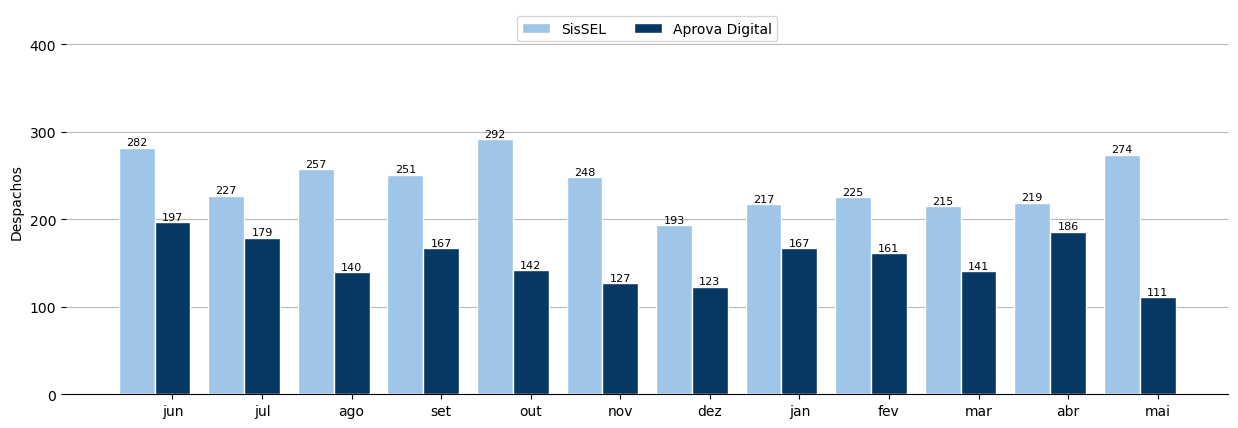

In [259]:
def graph_main_comparativo(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]

    plt.savefig(f'pdf_img/{coord}_main_comparativo.png', dpi=300)

dados = contru_param['block_placement'].get('bloco_main_comparativo').get('data')
if dados:
    main_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo('contru', main_comparativo)

##### Grafico main comparativo comuniqueses

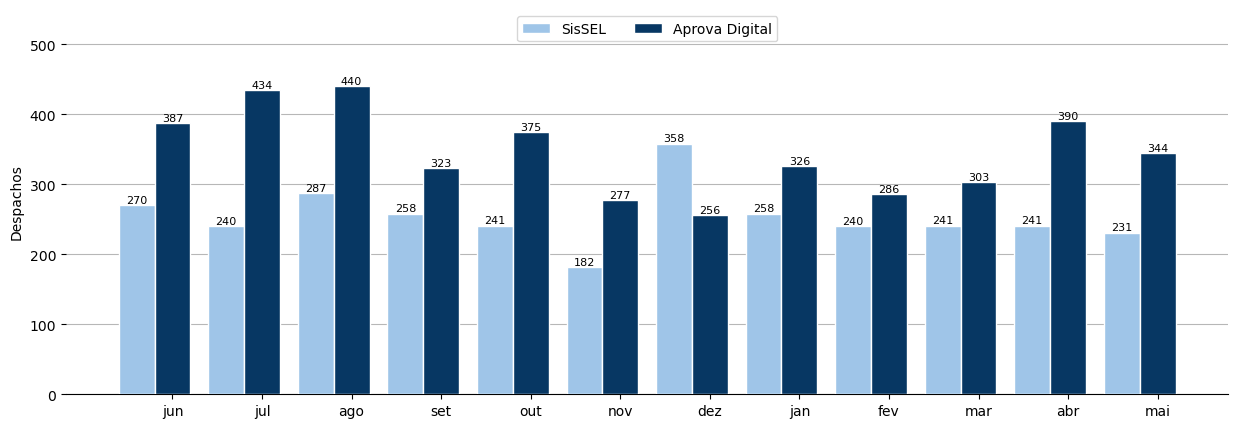

In [261]:
def graph_main_comparativo_comun(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)

    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height() #+ 10
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 500  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]
    plt.savefig(f'pdf_img/{coord}_main_comparativo_comun.png', dpi=300)

dados = contru_param['block_placement'].get('bloco_main_comparativo_comun').get('data')
if dados:
    main_comparativo_comun = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo_comun('contru', main_comparativo_comun)

##### Gráfico main comuniqueses

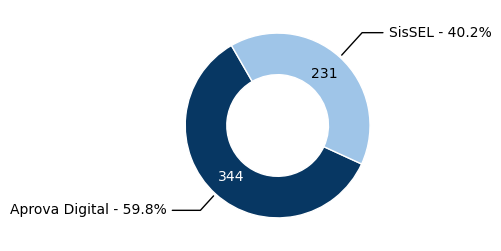

In [263]:
def graph_main_comun(coord, dados):
    
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_main_comun.png', dpi=300)
    
dados = contru_param['block_placement'].get('bloco_main_comuniqueses').get('data')
if dados:
    graph_main_comun('contru', dados)

##### Gráfico main Autuacoes

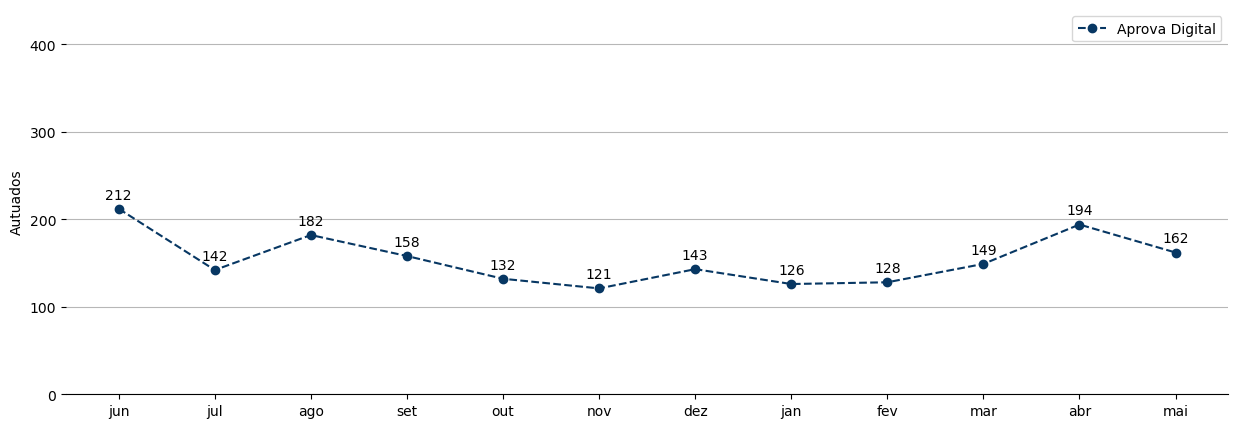

In [265]:
def graph_main_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='--', color='#073763', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_main_autuados.png', dpi=300)

main_aut = contru_param['block_placement'].get('bloco_main_autuacoes').get('data').get('Aprova Digital')
if main_aut:
    graph_main_aut('contru', main_aut)

#### Aprova Digital

##### Gráfico ad fontes

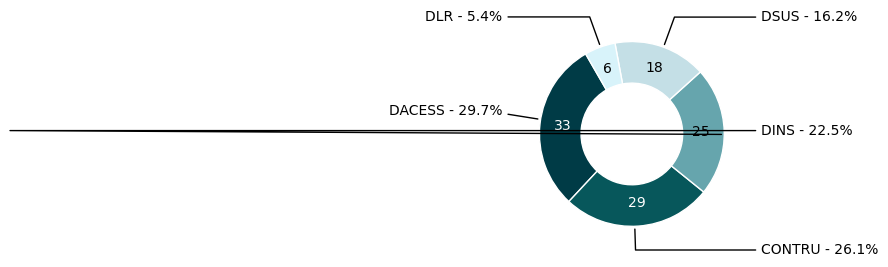

In [268]:
def graph_ad_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    green_pallete = ['#003b46','#07575b','#66a5ad','#c4dfe6', '#d8f3fa']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=green_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2.1 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_ad_fontes.png', dpi=300)
    
ad_fontes = contru_param['block_placement'].get('bloco_ad_fontes').get('data')
if ad_fontes:
    graph_ad_fontes('contru', ad_fontes)

##### Gráfico AD comparativo

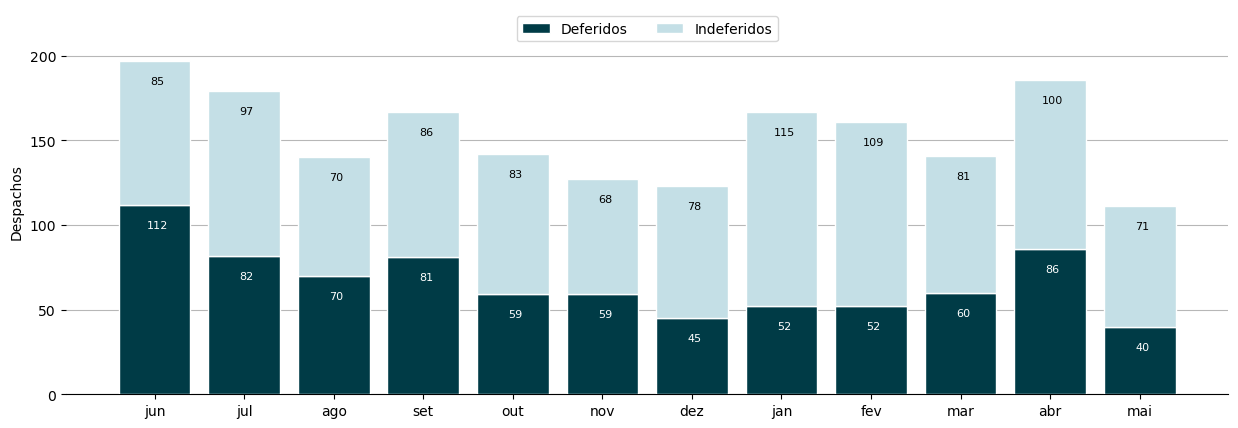

In [270]:
def graph_ad_comparativo(coord, dados):
    green_pallete = ['#c4dfe6', '#003b46']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=green_pallete[1],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=green_pallete[0], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 12
        ajuste_indef = 12
        #if i == 9:
            #ajuste_indef = 0
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 200  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 50))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_img/{coord}_ad_comparativo.png', dpi=300)
    
dados = contru_param['block_placement'].get('bloco_ad_comparativo').get('data')
if dados:
    ad_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_ad_comparativo('contru', ad_comparativo)

##### Grafico ad comuniqueses

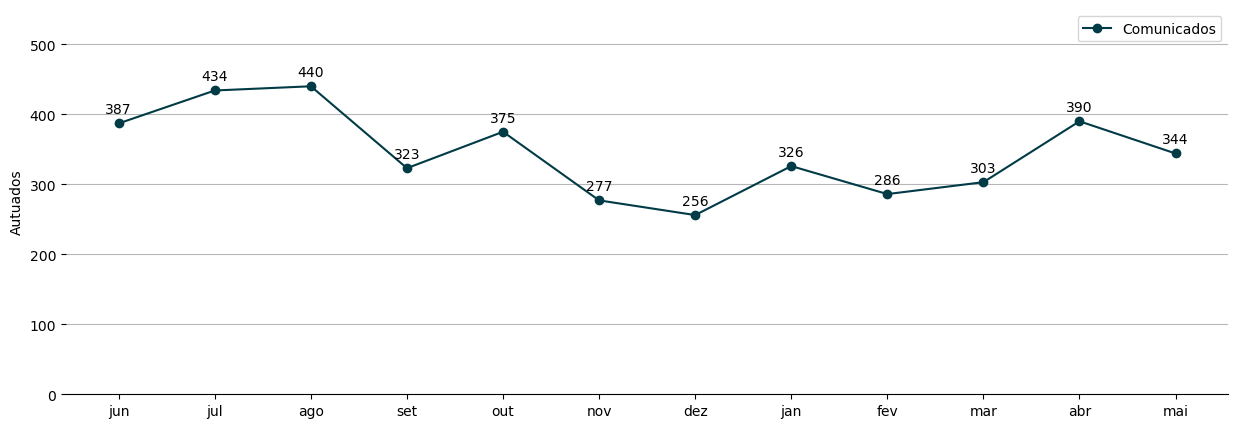

In [272]:
def graph_ad_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 500  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_ad_comun.png', dpi=300)
    
ad_comun = contru_param['block_placement'].get('bloco_ad_comuniqueses').get('data')
if ad_comun:
    graph_ad_comun('contru', ad_comun)

##### Grafico ad Autuados

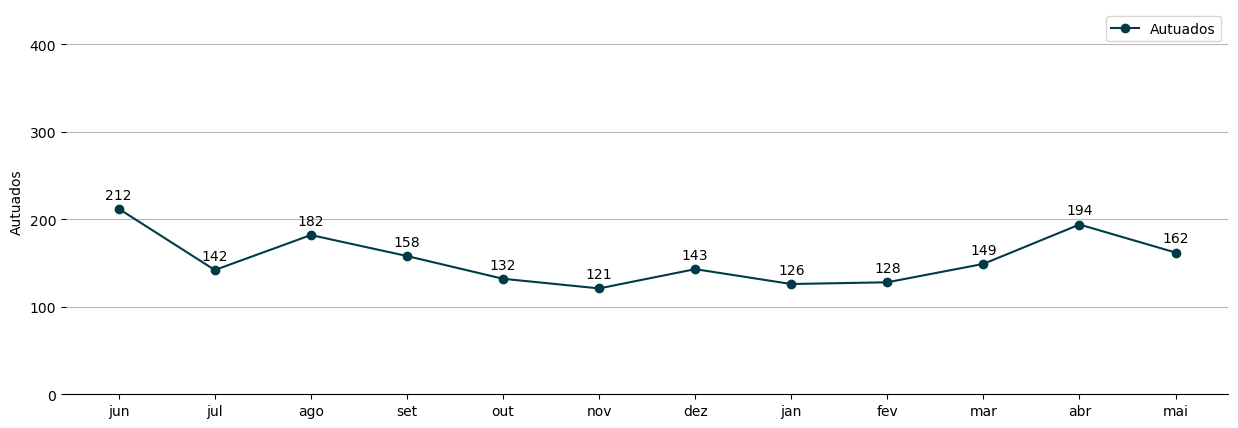

In [274]:
def graph_ad_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Autuados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_ad_autuados.png', dpi=300)

ad_aut = contru_param['block_placement'].get('bloco_ad_autuacoes').get('data')
if ad_aut:
    graph_ad_aut('contru', ad_aut)

#### SisSEL

##### Grafico sissel fontes

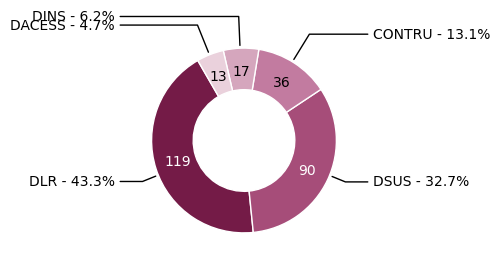

In [277]:
def graph_sissel_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    pink_pallete = ['#741b47','#a64d79','#c27ba0','#d5a6bd', '#ead1dc']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=pink_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/1.9 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_sissel_fontes.png', dpi=300)

dados = contru_param['block_placement'].get('bloco_sissel_fontes').get('data')
if dados:
    graph_sissel_fontes('contru', dados)

##### Grafico sissel comaprativo

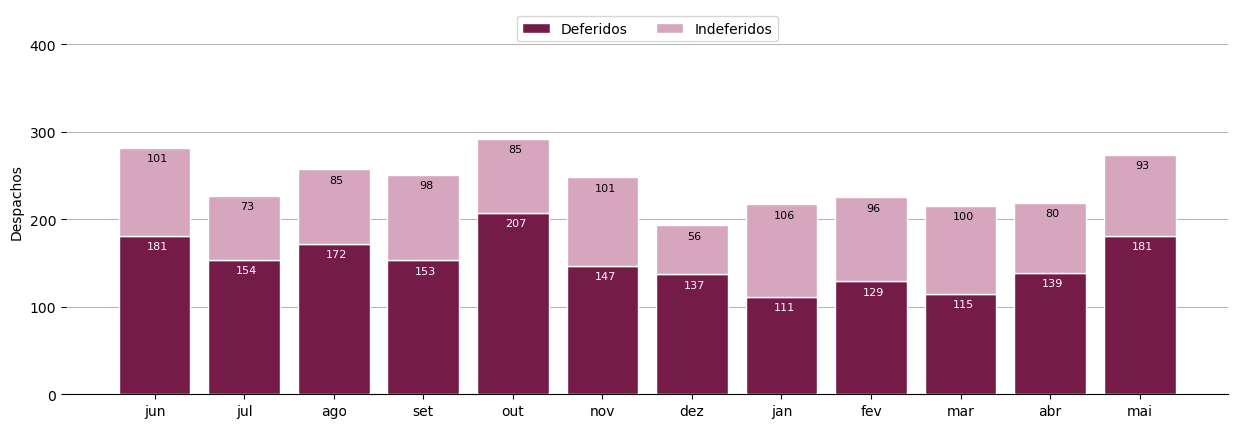

In [279]:
def graph_sissel_comparativo(coord, dados):
    pink_pallete = ['#741b47', '#d5a6bd']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=pink_pallete[0],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=pink_pallete[1], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 12
        ajuste_indef = 12
        #if i == 6 or i == 10:
        #    ajuste_def = -1.5
        #if i == 10:
        #    ajuste_indef = -1.5
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_img/{coord}_sissel_comparativo.png', dpi=300)

dados = contru_param['block_placement'].get('bloco_sissel_comparativo').get('data')
if dados:
    df_dados = pd.DataFrame(dados, index=lista_meses)
    graph_sissel_comparativo('contru', df_dados)

##### Grafico sissel comuniqueses

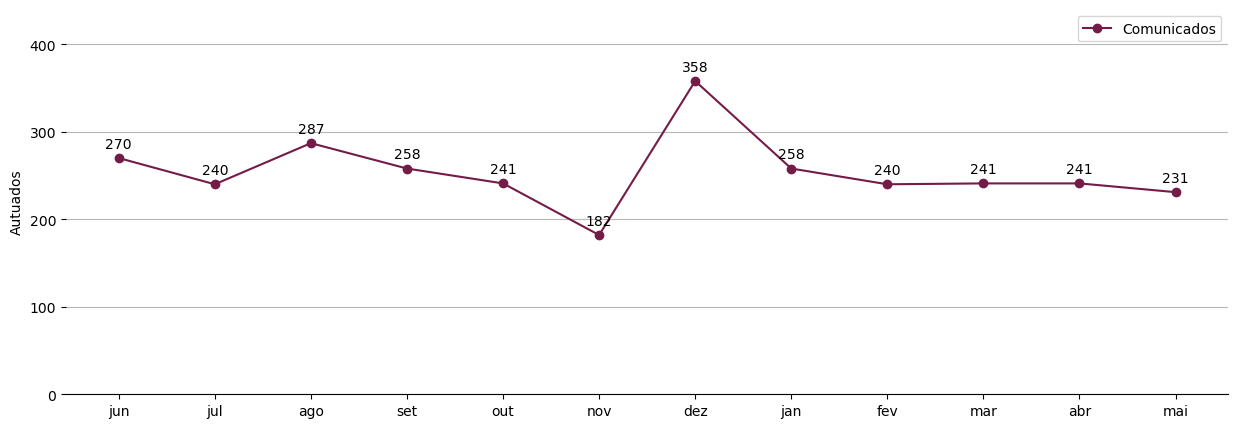

In [281]:
def graph_sissel_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#741b47', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_sissel_comun.png', dpi=300)
    
dados_com = contru_param['block_placement'].get('bloco_sissel_comuniqueses').get('data')
if dados_com:
    graph_sissel_comun('contru', dados_com)

##### grafico sissel autuados

### CAEPP

#### Geral

##### Grafico main fontes

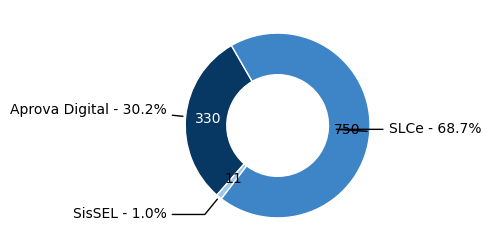

In [286]:
#dados = caepp_param['block_placement']['bloco_main_fontes']['data']
def graph_main_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8', '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_main_fontes.png', dpi=300)

dados = caepp_param['block_placement'].get('bloco_main_fontes').get('data')
if dados:
    graph_main_fontes('caepp', dados)

##### Grafico main comparativo

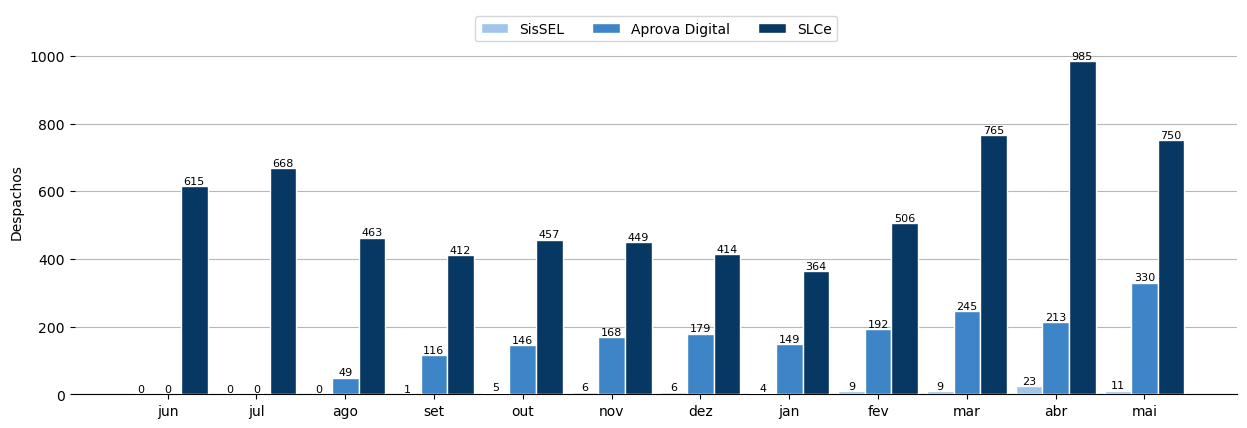

In [288]:
def graph_main_comparativo(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8', '#3d85c6']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.3

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar2 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[2], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)
    bar3 = plt.bar(r3, dados['SLCe'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='SLCe', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')
    
    # Escrevendo valos dentro das barras
    for bar in bar1 + bar2 + bar3 :
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 1000  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 200))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar2, bar3], loc='upper center', ncol=3) # total_line[0]

    plt.savefig(f'pdf_img/{coord}_main_comparativo.png', dpi=300)

dados = caepp_param['block_placement'].get('bloco_main_comparativo').get('data')
if dados:
    main_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo('caepp', main_comparativo)

##### Grafico main comparativo comuniqueses

{'SisSEL': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 8, 3], 'Aprova Digital': [0, 0, 6, 15, 28, 22, 22, 7, 32, 57, 93, 125], 'SLCe': [418, 353, 163, 112, 222, 281, 222, 368, 374, 397, 403, 386], 'Total': [418, 353, 169, 127, 250, 303, 244, 375, 407, 455, 504, 514]}


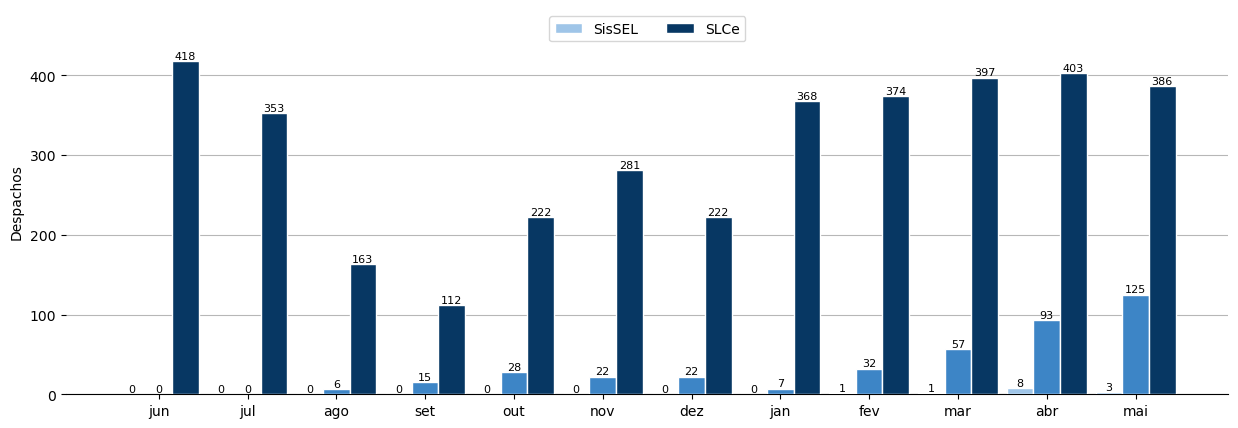

In [290]:
def graph_main_comparativo_comun(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8', '#3d85c6', ]

    categories = list(dados.index)

    # Configurar a largura das barras agrupadas
    bar_width = 0.3

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar2 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[2], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)
    bar3 = plt.bar(r3, dados['SLCe'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='SLCe', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar2 + bar3:
        yval = bar.get_height() #+ 10
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]
    plt.savefig(f'pdf_img/{coord}_main_comparativo_comun.png', dpi=300)

dados = caepp_param['block_placement'].get('bloco_main_comparativo_comun').get('data')
print(dados)
if dados:
    main_comparativo_comun = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo_comun('caepp', main_comparativo_comun)

##### Gráfico main comuniqueses

{'Aprova Digital': 125, 'SisSEL': 3, 'SLCe': 386}

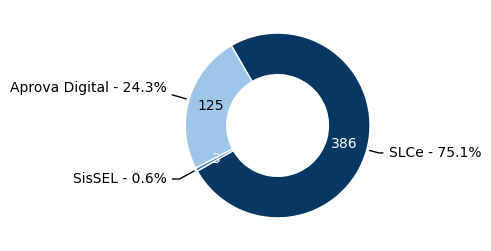

In [292]:
def graph_main_comun(coord, dados):
    
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#9fc5e8', '#3d85c6', '#073763']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('bww')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_main_comun.png', dpi=300)
    
dados = copy.deepcopy(caepp_param['block_placement'].get('bloco_main_comuniqueses').get('data'))
#del dados['SisSEL'] # para meses caso o sisselvenha em branco
if dados:
    graph_main_comun('caepp', dados)

dados

##### Gráfico main Autuacoes

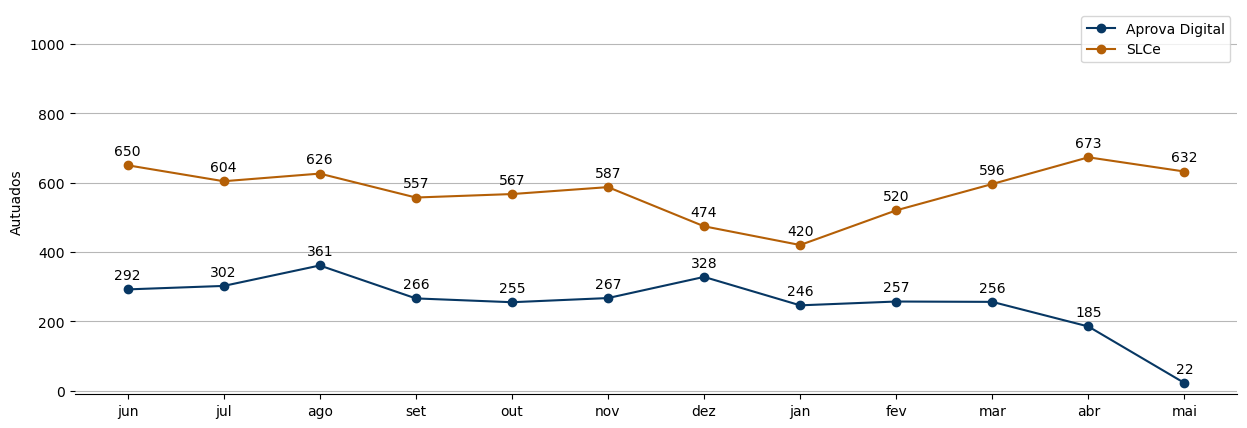

In [294]:
def graph_main_aut(coord, dados_aut):
    dados = dados_aut
    meses = list(dados_aut['Aprova Digital'].keys())
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados['Aprova Digital'].values()), marker='o', linestyle='-', color='#073763', label='Aprova Digital')
    plt.plot(meses, list(dados['SLCe'].values()), marker='o', linestyle='-', color='#b45f06', label='SLCe')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 1000  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 200))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for key, values in dados.items():
        for mes, valor in values.items():
            plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_main_autuados.png', dpi=300)

main_aut = caepp_param['block_placement'].get('bloco_main_autuacoes').get('data')
main_aut
if main_aut:
    graph_main_aut('caepp', main_aut)

#### Aprova Digital

##### Gráfico ad fontes

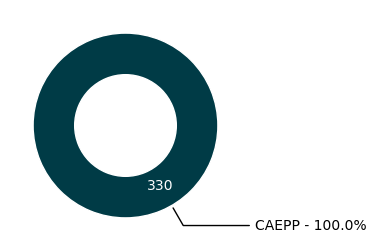

In [297]:

def graph_ad_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    green_pallete = ['#003b46','#07575b','#66a5ad','#c4dfe6',]

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=green_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_ad_fontes.png', dpi=300)
    
ad_fontes = caepp_param['block_placement'].get('bloco_ad_fontes').get('data')
if ad_fontes:
    graph_ad_fontes('caepp', ad_fontes)

##### Gráfico AD comparativo

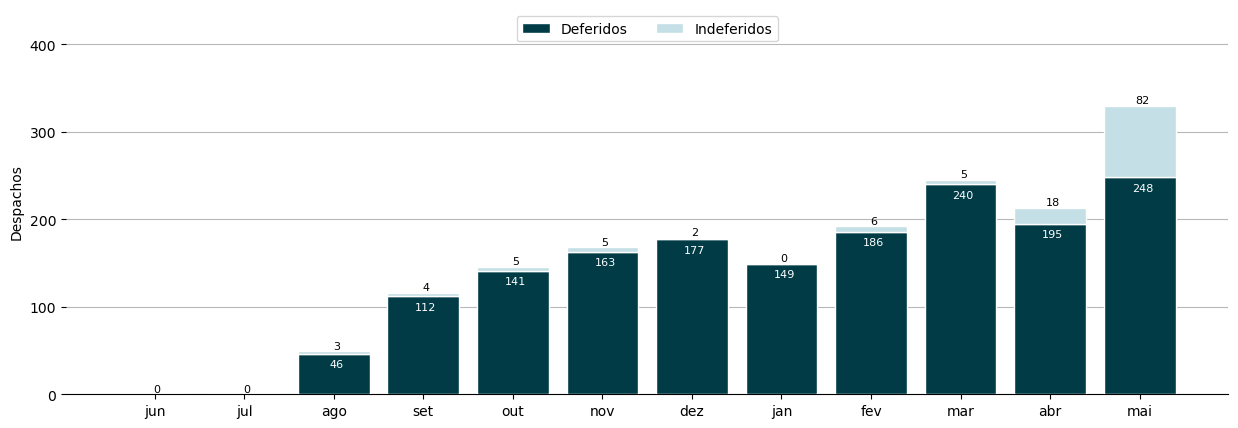

In [299]:
def graph_ad_comparativo(coord, dados):
    green_pallete = ['#c4dfe6', '#003b46']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=green_pallete[1],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=green_pallete[0], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 12
        ajuste_indef = -6
        #if i == 11:
            #ajuste_indef = 4
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_img/{coord}_ad_comparativo.png', dpi=300)
    

ad_comparativo = caepp_param['block_placement'].get('bloco_ad_comparativo').get('data')
if ad_comparativo:
    df_ad_comparativo = pd.DataFrame(ad_comparativo, index=lista_meses)
    graph_ad_comparativo('caepp', df_ad_comparativo)

##### Grafico ad comuniqueses

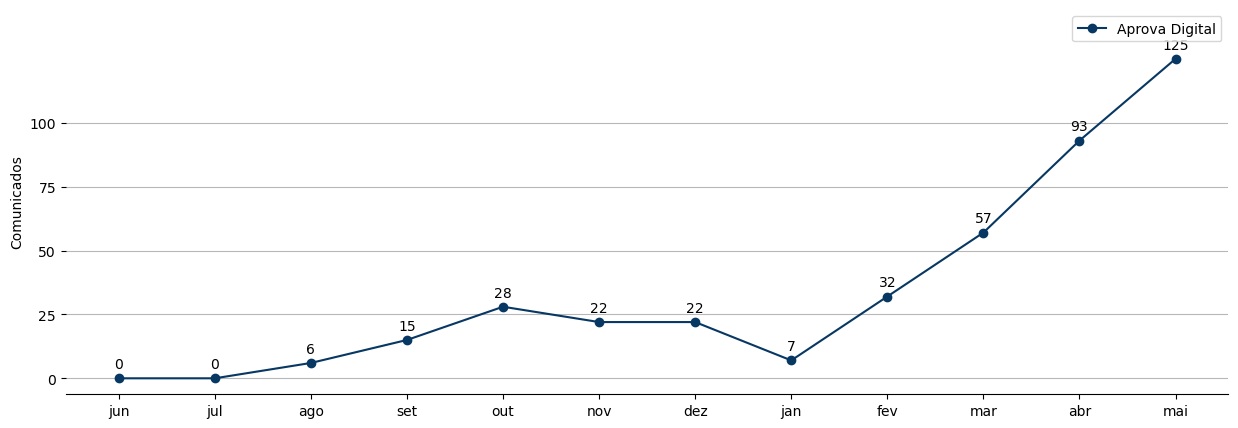

In [301]:
def graph_ad_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#073763', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Comunicados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_ad_comun.png', dpi=300)
    
ad_comun = caepp_param['block_placement'].get('bloco_ad_comuniqueses').get('data')
if ad_comun:
    graph_ad_comun('caepp', ad_comun)

##### Grafico ad Autuados

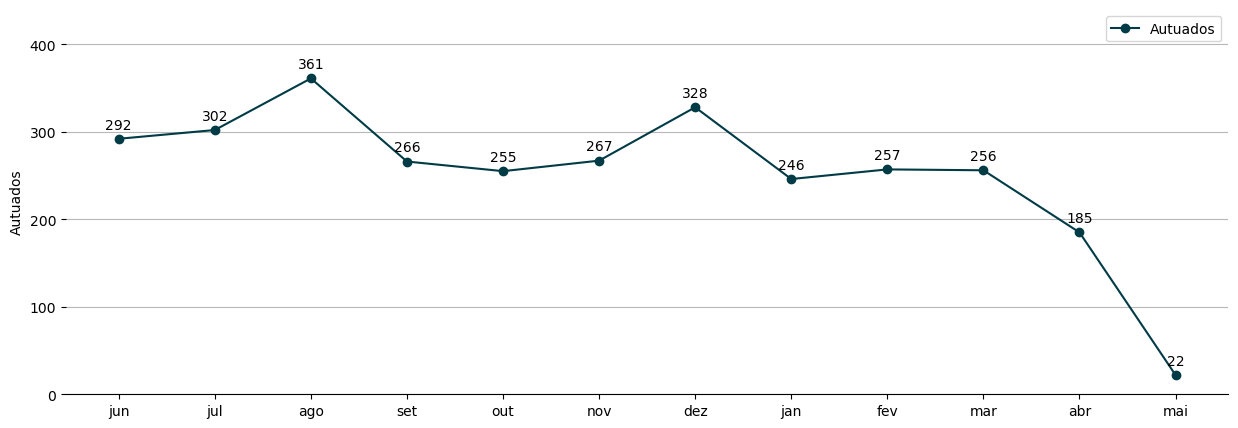

In [303]:
def graph_ad_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4


    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Autuados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_ad_autuados.png', dpi=300)

ad_aut = caepp_param['block_placement'].get('bloco_ad_autuacoes').get('data')
if ad_aut:
    graph_ad_aut('caepp', ad_aut)

#### SisSEL

##### Grafico sissel fontes

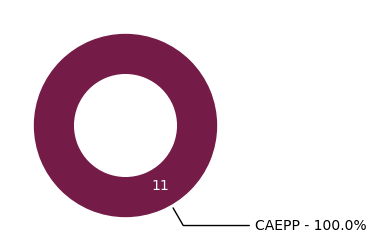

In [306]:
def graph_sissel_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    pink_pallete = ['#741b47','#a64d79','#c27ba0','#d5a6bd']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=pink_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_img/{coord}_sissel_fontes.png', dpi=300)

dados = caepp_param['block_placement'].get('bloco_sissel_fontes').get('data')
if dados:
    graph_sissel_fontes('caepp', dados)

##### Grafico sissel comaprativo

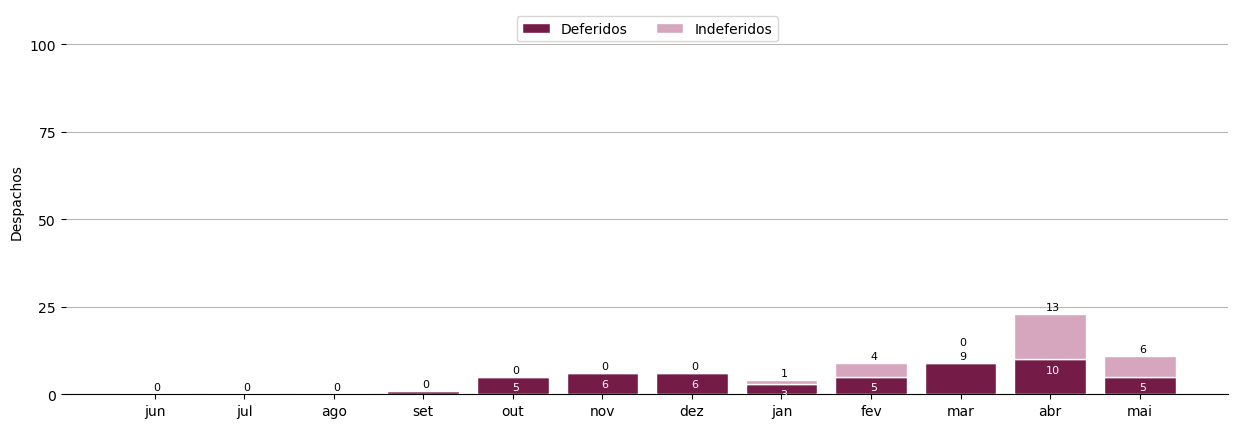

In [308]:
def graph_sissel_comparativo(coord, dados):
    pink_pallete = ['#741b47', '#d5a6bd']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=pink_pallete[0],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=pink_pallete[1], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 3
        ajuste_indef = -2
        color_def = 'white'
        color_indef = 'black'
        if i == 9:
            color_def = 'black'
            ajuste_def = -2
            ajuste_indef = -6
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color=color_def)
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color=color_indef)


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_img/{coord}_sissel_comparativo.png', dpi=300)

dados = caepp_param['block_placement'].get('bloco_sissel_comparativo').get('data')
if dados:
    df_dados = pd.DataFrame(dados, index=lista_meses)
    graph_sissel_comparativo('caepp', df_dados)

##### Grafico sissel comuniqueses

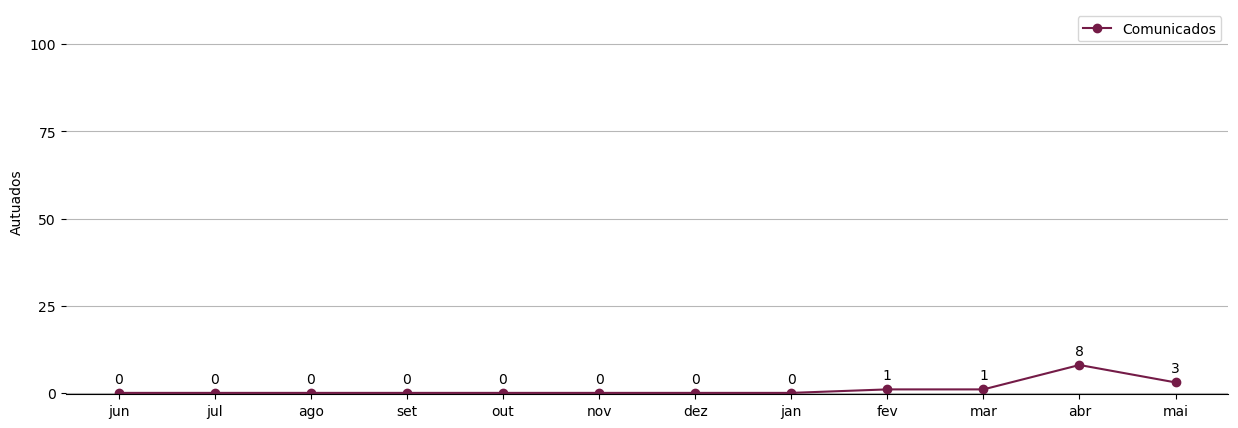

In [310]:
def graph_sissel_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4


    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#741b47', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_sissel_comun.png', dpi=300)
    
dados_com = caepp_param['block_placement'].get('bloco_sissel_comuniqueses').get('data')
if dados_com:
    graph_sissel_comun('caepp', dados_com)

##### grafico sissel autuados

#### SLCe

##### Gráfico slce comparativo

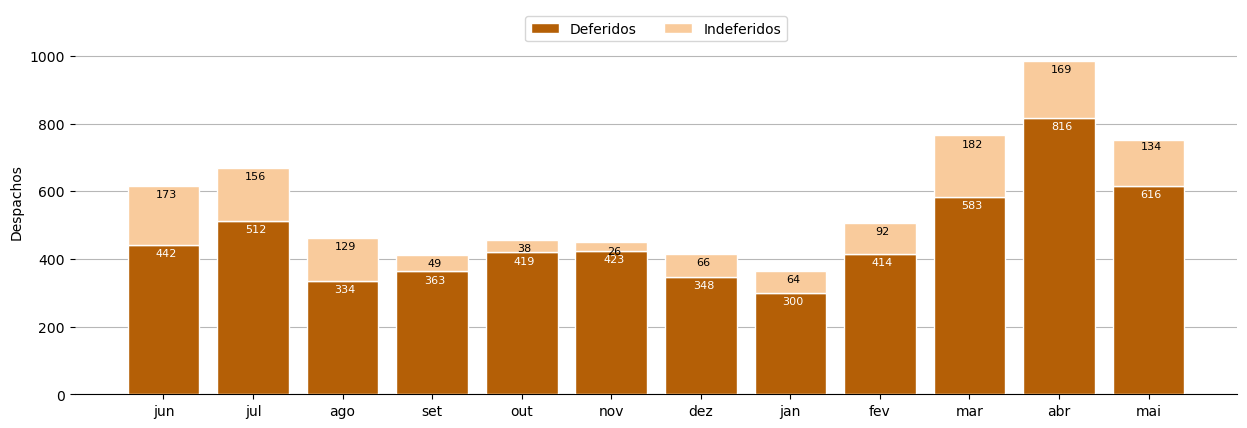

In [314]:
def graph_slce_comparativo(coord, dados):
    green_pallete = ['#b45f06', '#f9cb9c']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=green_pallete[0],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=green_pallete[1], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 25
        ajuste_indef = 25
        if i == 11:
            ajuste_indef = 18
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 1000  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 200))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_img/{coord}_slce_comparativo.png', dpi=300)
    

slce_comparativo = caepp_param['block_placement'].get('bloco_slce_comparativo').get('data')
if slce_comparativo:
    df_slce_comparativo = pd.DataFrame(slce_comparativo, index=lista_meses)
    graph_slce_comparativo('caepp', df_slce_comparativo)

##### Grafico slce comuniqueses

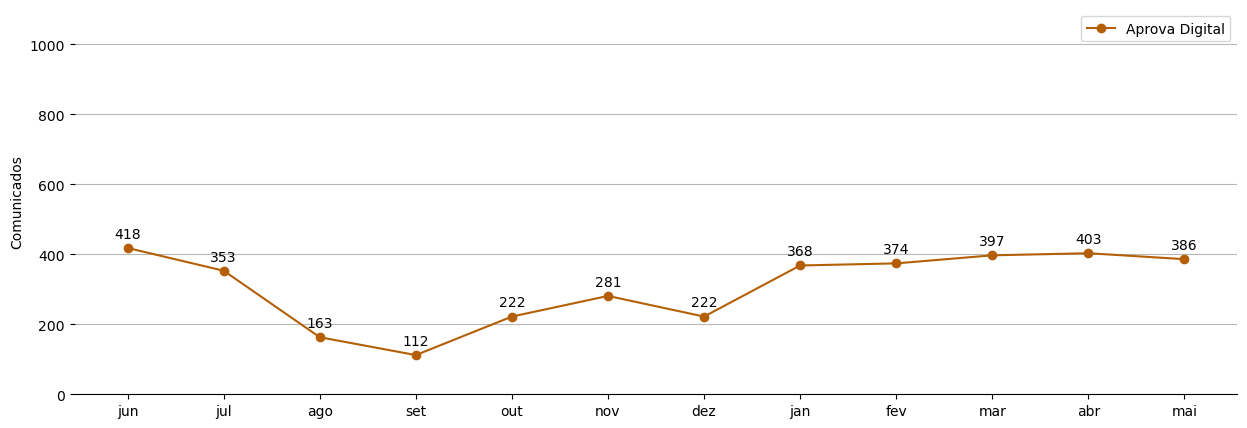

In [316]:
def graph_slce_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#b45f06', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Comunicados')

    # Ajustar margem superior maior
    desired_top_limit = 1000  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 200))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_slce_comun.png', dpi=300)
    
slce_comun = caepp_param['block_placement'].get('bloco_slce_comuniqueses').get('data')
if slce_comun:
    graph_slce_comun('caepp', slce_comun)

##### Grafico slce Autuados

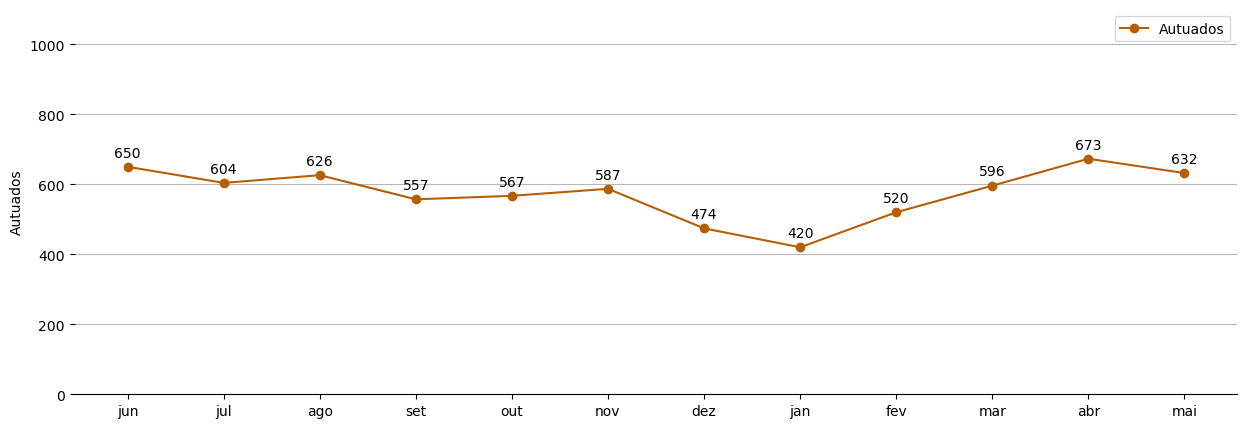

In [318]:
def graph_slce_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4


    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#b45f06', label='Autuados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 1000  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 200))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_slce_autuados.png', dpi=300)

slce_aut = caepp_param['block_placement'].get('bloco_slce_autuacoes').get('data')
if slce_aut:
    graph_slce_aut('caepp', slce_aut)

### Portal

#### Portal do Licenciamento

##### Gráfico portal comparativo

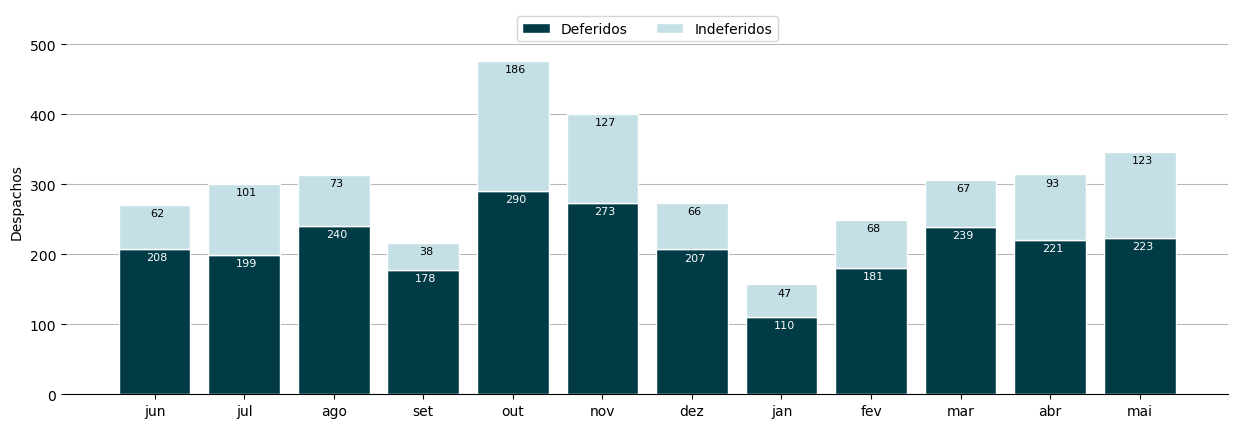

In [322]:
def graph_portal_comparativo(coord, dados):
    green_pallete = ['#c4dfe6', '#003b46']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=green_pallete[1],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=green_pallete[0], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 12
        ajuste_indef = 12
        #if i == 11:
            #ajuste_indef = 4
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 500  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_img/{coord}_portal_comparativo.png', dpi=300)
    

portal_comparativo = gtec_param['block_placement'].get('bloco_portal_comparativo').get('data')
if portal_comparativo:
    df_portal_comparativo = pd.DataFrame(portal_comparativo, index=lista_meses)
    graph_portal_comparativo('gtec', df_portal_comparativo)

##### Grafico ad comuniqueses

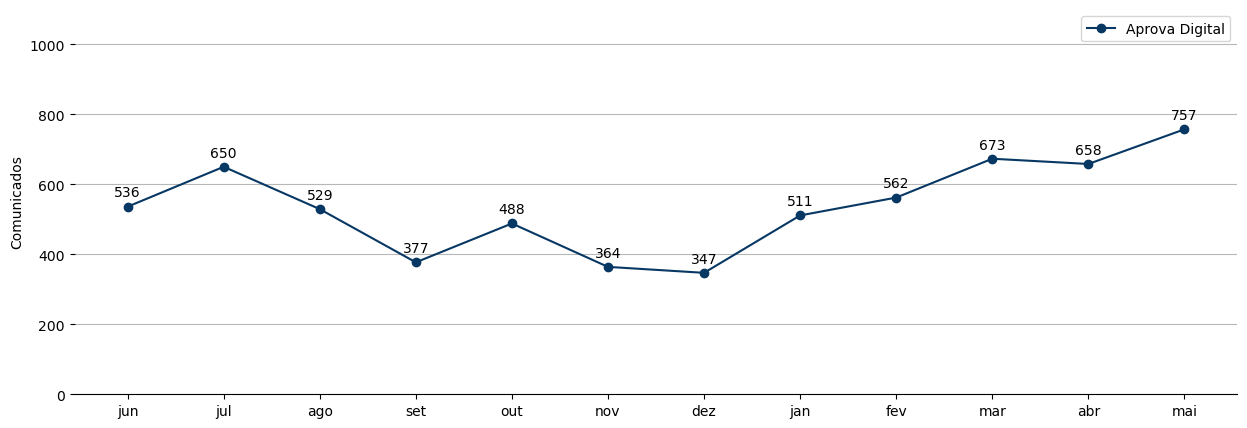

In [324]:
def graph_portal_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#073763', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Comunicados')

    # Ajustar margem superior maior
    desired_top_limit = 1000  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 200))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_portal_comun.png', dpi=300)
    
portal_comun = gtec_param['block_placement'].get('bloco_portal_comuniqueses').get('data')
if portal_comun:
    graph_portal_comun('gtec', portal_comun)

##### Grafico portal Autuados

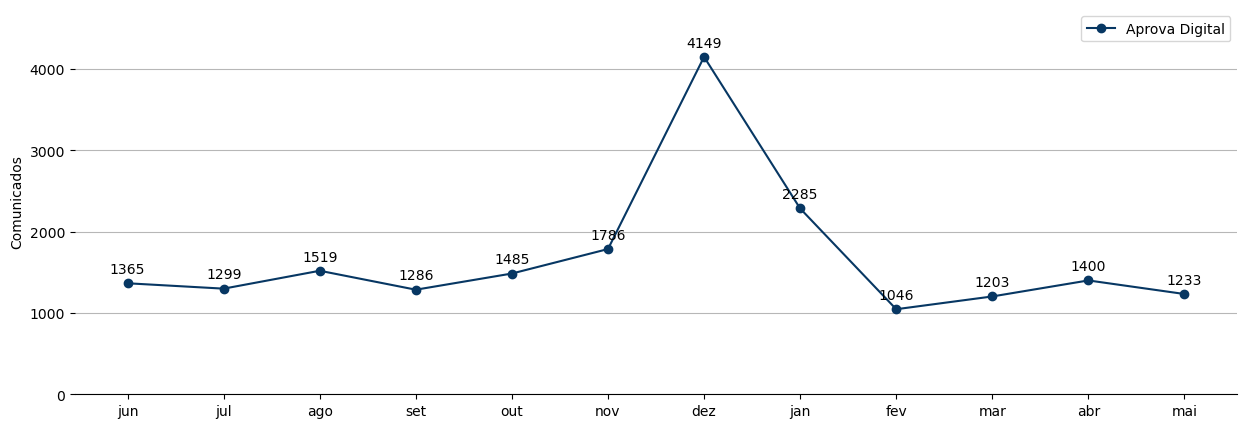

In [326]:
def graph_portal_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#073763', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Comunicados')

    # Ajustar margem superior maior
    desired_top_limit = 4000  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 1000))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_img/{coord}_portal_autuados.png', dpi=300)
    
portal_aut = gtec_param['block_placement'].get('bloco_portal_autuacoes').get('data')
portal_aut
if portal_aut:
    graph_portal_comun('gtec', portal_aut)

## Gerando PDFs


In [328]:
os.system(f'python {os.getcwd()}/pdf_writer.py')
os.listdir('pdf_relatorios')

[]